# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve


# 직접 수집한 엑셀 파일에서 데이터 분석에 활용할 부분 추출 

In [2]:
df = pd.read_csv('0822data.csv', encoding = 'utf-8')

In [3]:
df['시공일자_datetime'] = pd.to_datetime(df['시공일자'])
df['시공일자_년도'] = df['시공일자_datetime'].dt.year

In [4]:
X = df[['전세가율','시공일자_년도','근저당정규화','가압류','소유권이전', '신탁', '임차권등기명령']]
y = df['label']

In [5]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)
#split 함수를 통해 train set과 test set 분할 (test set의 비율 : 0.3)

# LogisticRegression()

##  우선 로지스틱 단일 모델에 별다른 파라미터를 주지 않고, 다양한 성능지표를 확인   
### - 추후에 GridsearchCV 사용 등을 통해 모델 컨트롤 진행

In [6]:
lr = LogisticRegression() # 로지스틱 함수 객체 생성 

In [7]:
lr.fit(X_train,y_train) # fit() 함수를 통한 훈련 
y_pred = lr.predict(X_test) # 훈련을 통해 만들어진 모델에 test 데이터 대입 
print(y_pred)




[0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0]


In [8]:
cm = confusion_matrix(y_test, y_pred) # confusion matrix 생성 
print(cm)

[[48  4]
 [ 9 29]]


In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 다양한 성능지표 확인
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"정확도: {acc}")
print(f"정밀도: {prec}")
print(f"재현율: {rec}")
print(f"F1 Score : {f1}")

정확도: 0.8555555555555555
정밀도: 0.8787878787878788
재현율: 0.7631578947368421
F1 Score : 0.8169014084507042


# ROC curve & AUC SCORE

x 축 (FPR, 1-specificity)  = 실제 전세 사기가 아닌 것 중 전세 사기라고 예측한 정도 

y축 (TPR, recall) = 실제 전세 사기인 것 중 전세 사기라고 예측한 정도 

* data imbalanced 상황에서 ROC curve의 사용은 기만적이고 낙관적인 잘못된 해석을 초래할 수 있다는 점을 유의사항으로 둠.

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.944


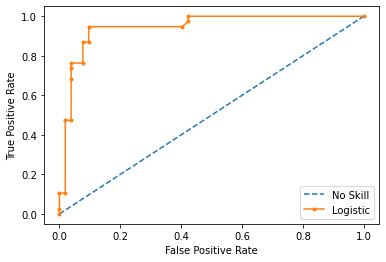

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot



# 모든 예측은 다수 클래스(0:사기 아님)으로 설정 
ns_probs = [0 for _ in range(len(y_test))] 

# 모델 피팅 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# 위에서 피팅한 모델에 test 데이터 예측 (확률로 예측)
lr_probs = model.predict_proba(X_test)

# 1(사기) 클래스에 대한 확률만 추출 
lr_probs = lr_probs[:, 1]

# AUC SCORE 계산 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# 점수 출력 
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

# ROC curve 계산
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# ROC curve 그리기
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill') # No Skill 에 대해서는  ROC 커브는 대시 선 스타일로 작성 
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic') # Logistic Regression 예측에 대한 ROC 커브는 점으로 표시

# 축 설정 
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# 범례 표시
pyplot.legend()

# ROC Curve plot 보이기 
pyplot.show()

# Precision - Recall curve 

precision = 전세 사기라고 예측한 것 중에서 실제 사기 

TPR = recall = 실제 사기인 것 중 사기라고 예측한 정도 

used in class imbalance.

Logistic: f1=0.817 auc=0.900


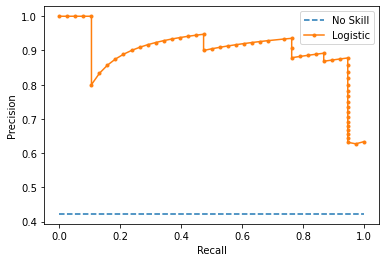

In [11]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

# 모델 피팅 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)


# 위에서 피팅한 모델에 test 데이터 예측 (확률로 예측)
lr_probs = model.predict_proba(X_test)
# 1(사기) 클래스에 대한 확률만 추출 
lr_probs = lr_probs[:, 1]
# # 클래스 값 예측
yhat = model.predict(X_test)


# Logistic Regression 예측 확률에 대한 정밀도-재현율 곡선 계산
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

# Logistic Regression 예측에 대한 F1 스코어와 AUC 계산
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# 점수 출력
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))



# 테스트 세트에서 양성 클래스 (클래스 1)의 비율을 계산하여 "No Skill" 예측의 기준값으로 사용
no_skill = len(y_test[y_test==1]) / len(y_test)
# No Skill 곡선을 대시 선 스타일로 그리기
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

#Logistic Regression 예측에 대한 정밀도-재현율 곡선을 점으로 표시
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

# x축, y축 레이블 설정
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')

# 범례 표시
pyplot.legend()

# 정밀도-재현율 곡선 보여주기  
pyplot.show()

# threshold 직접 설정

### 도메인을 고려했을 때, 실제 사기를 사기라고 판단하는 것이 핵심이다. 
### 따라서, 재현율을 포함한 지표가 주요 지표이며, 재현율 값이 좋지 않다면 다른 성능 지표에 크게 영향을 주지 않는 한 재현율을 높이는 것을 목표로 삼았다. 
### 재현율을 높이기 위해 threshold 값을 default(0.5) 보다 낮게 주어 변화를 관찰할 예정이었으나, 만족하는 성능 지표에 따라 실제 사용은 하지 않았다. 

y_pred = lr.predict_proba(X_test)[:,1]   #. .iloc[:,[0]]

y_pred_series = pd.Series(y_pred)

def PRED(y,threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

Y_pred = PRED(y_pred, 0.5)

Y_pred

# statsmodels 이용해서 통계 결과 확인

* statsmodels은 통계기반이고, sklearn은 머신러닝 기반이기에 불가피하게 statsmodels를 통해 p-value, 회귀 계수등 확인

In [12]:
import statsmodels.api as sm

In [13]:
df_new = df[['전세가율','시공일자_년도','압류','근저당정규화','소유권이전','가압류','신탁', '임차권등기명령','label']]

In [14]:
pred_sm = sm.add_constant(df_new, has_constant = 'add')
pred_sm.head()

C:\Users\kosuk\anaconda3\ANA\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,전세가율,시공일자_년도,압류,근저당정규화,소유권이전,가압류,신탁,임차권등기명령,label
0,1.0,0.966543,2020,0,1.691450,0,0,0,0,1
1,1.0,1.000000,2008,1,1.212121,1,0,0,1,1
2,1.0,0.991549,2020,1,1.625352,0,1,0,0,1
3,1.0,1.355191,2019,1,2.710383,0,0,0,1,1
4,1.0,1.000000,2019,1,9.000000,0,1,0,1,1


In [15]:
feature_columns = list(pred_sm.columns.difference(["label"]))
X = pred_sm[feature_columns]
y = pred_sm['label']

In [16]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

In [17]:
model = sm.Logit(y_train,X_train)
results = model.fit(method = "newton")

results.summary()

Optimization terminated successfully.
         Current function value: 0.149220
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                  208
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.7805
Time:                        15:44:59   Log-Likelihood:                -31.038
converged:                       True   LL-Null:                       -141.38
Covariance Type:            nonrobust   LLR p-value:                 2.751e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -548.1255    125.582     -4.365      0.000    -794.262    -301.989
가압류            1.4752      0.896      1.646      0.100      -0.282       3.232
근저당정규화         3.1242      0.891      3.504      0.000       1.377       4.871
소유권이전          3.5561      1.468      2.423      0.015       0.679       6.433
시공일자_년도        0.2703      0.062      4.349      0.000       0.148       0.392
신탁            -7.4638      2.485     -3.004      0.003     -12.334      -2.593
압류             3.1913      1.160      2.751      0.006       0.917       5.465
임차권등기명령        4.5509      1.048      4.342      0.000       2.496       6.605
전세가율          -1.3550      1.516     -0.894      0.371      -4.326       1.616
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [18]:
results.params

const     -548.125542
가압류          1.475249
근저당정규화       3.124176
소유권이전        3.556132
시공일자_년도      0.270251
신탁          -7.463791
압류           3.191344
임차권등기명령      4.550883
전세가율        -1.354983
dtype: float64

In [19]:
np.exp(results.params)

const      8.955747e-239
가압류         4.372124e+00
근저당정규화      2.274114e+01
소유권이전       3.502746e+01
시공일자_년도     1.310294e+00
신탁          5.734780e-04
압류          2.432109e+01
임차권등기명령     9.471598e+01
전세가율        2.579516e-01
dtype: float64

# SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# 원래 개수 : {0: 173 1: 125}
# 적은 데이터 개수, 약간의 데이터 불균형을 해소하기 위해 -> 오버샘플링 진행 (단, 과적합을 피하기 위해 성능에 영향을 거의 주지 않는 개수에 한하여 진행)

smote = SMOTE(sampling_strategy={0: 180, 1: 150},random_state=1) 
X, y = smote.fit_resample(X, y)

In [22]:
# feature들과 label dataframe을 합침 
df = pd.concat([X, y], axis=1)
df








,const,가압류,근저당정규화,소유권이전,시공일자_년도,신탁,압류,임차권등기명령,전세가율,label
0,1.0,0,1.691450,0,2020,0,0,0,0.966543,1
1,1.0,0,1.212121,1,2008,0,1,1,1.000000,1
2,1.0,1,1.625352,0,2020,0,1,0,0.991549,1
3,1.0,0,2.710383,0,2019,0,1,1,1.355191,1
4,1.0,1,9.000000,0,2019,0,1,1,1.000000,1
...,...,...,...,...,...,...,...,...,...,...
325,1.0,0,1.000000,0,2018,0,1,1,1.000000,1
326,1.0,0,10.009922,0,2017,0,1,0,1.175589,1
327,1.0,1,0.989417,0,2019,0,1,1,0.989417,1
328,1.0,0,1.533800,0,2017,0,0,0,0.529674,1


## 오버샘플링 후 성능지표 확인 

In [23]:
X = df[['전세가율','시공일자_년도','근저당정규화','신탁','압류','가압류','임차권등기명령']]
y = df['label']




X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

cm = confusion_matrix(y_test, y_pred)
cm

acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"정확도: {acc}")
print(f"정밀도: {prec}")
print(f"재현율: {rec}")
print(f"F1 Score : {f1}")

정확도: 0.8888888888888888
정밀도: 0.9473684210526315
재현율: 0.8
F1 Score : 0.8674698795180723


## 다중공선성 확인

In [24]:
X.corr() # 상관계수 확인 

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령
전세가율,1.000000,0.317061,0.235953,0.081216,0.363427,0.354012,0.458753
시공일자_년도,0.317061,1.000000,0.255606,0.072314,0.445662,0.338752,0.412268
근저당정규화,0.235953,0.255606,1.000000,-0.007257,0.296669,0.265059,0.218531
신탁,0.081216,0.072314,-0.007257,1.000000,0.155695,0.028868,0.013662
압류,0.363427,0.445662,0.296669,0.155695,1.000000,0.621639,0.478141
가압류,0.354012,0.338752,0.265059,0.028868,0.621639,1.000000,0.483660
임차권등기명령,0.458753,0.412268,0.218531,0.013662,0.478141,0.483660,1.000000


In [25]:
# 글꼴 파일 설치 필요 

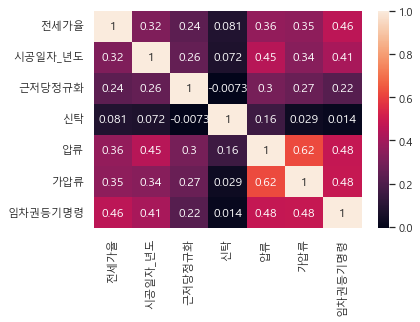

In [26]:
# 위의 상관계수를 시각화 
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

sns.heatmap(X.corr(), annot = True)
plt.show()

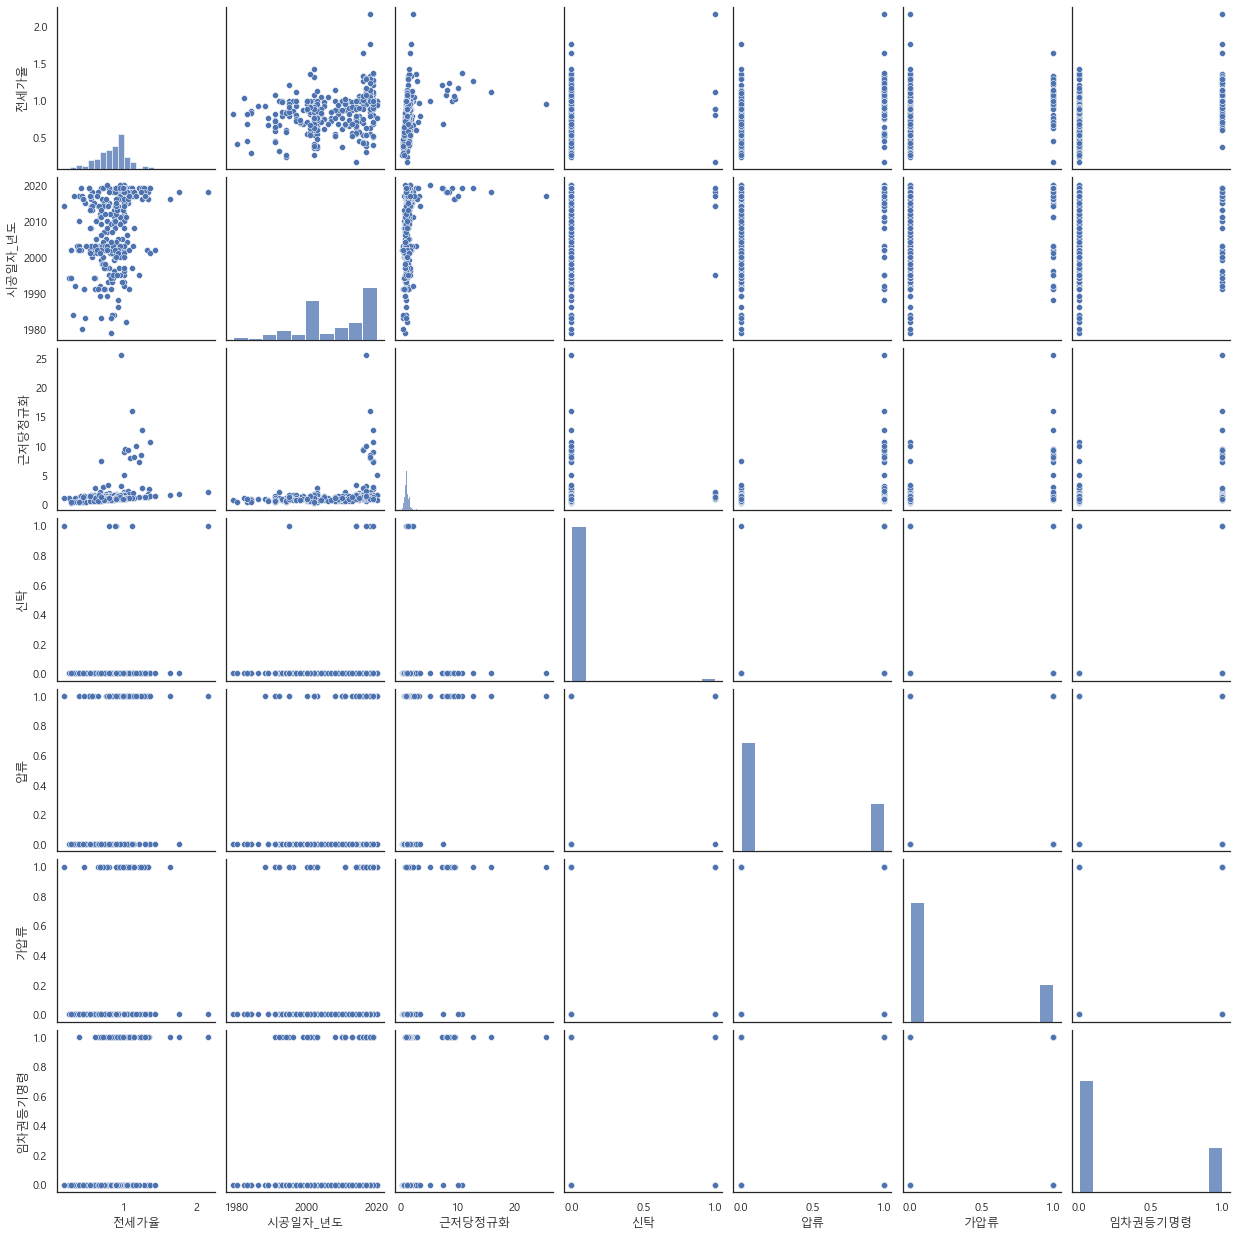

In [27]:
sns.pairplot(X) # pairplot을 통해 변수간의 산점도 확인 
plt.show()

In [28]:
# vif 점수 확인 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


,VIF Factor,features
0,17.875386,전세가율
1,14.692437,시공일자_년도
2,1.675790,근저당정규화
3,1.061241,신탁
4,2.689489,압류
5,2.367197,가압류
6,2.192125,임차권등기명령


### vif score는 10이상이면 다중공선성이 있다고 해석한다. 
### 다중공선성이 있다는 것은 회귀의 기본 가정을 위배하기 때문에 해결해줘야 하는 문제이다. 
### 우리는 추후에 GridSearchCV에 Regularization 을 통해 이를 해결한다. 

# 교차검증


In [29]:

kf = KFold(n_splits = 5, shuffle = True, random_state = 1) # 5 -fold cross validation을 진행  
n_iter = 0 # iteration 초기화

# 각 Iteration에서 학습 데이터와 검증 데이터의 label 분포를 작성 

for train_index, test_index in kf.split(X):
    n_iter +=1
    label_train = df['label'].iloc[train_index]
    label_test = df['label'].iloc[test_index]
    
    print('교차검증 : {} 번째'.format(n_iter))
    print('학습 데이터의 레이블 분포 :\n', label_train.value_counts())
    print('\n')
    print('검증 데이터의 레이블 분포 :\n', label_test.value_counts())
    print('\n')
    print('\n')

교차검증 : 1 번째
학습 데이터의 레이블 분포 :
 0    146
1    118
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    34
1    32
Name: label, dtype: int64




교차검증 : 2 번째
학습 데이터의 레이블 분포 :
 0    141
1    123
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    39
1    27
Name: label, dtype: int64




교차검증 : 3 번째
학습 데이터의 레이블 분포 :
 0    149
1    115
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 1    35
0    31
Name: label, dtype: int64




교차검증 : 4 번째
학습 데이터의 레이블 분포 :
 0    142
1    122
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    38
1    28
Name: label, dtype: int64




교차검증 : 5 번째
학습 데이터의 레이블 분포 :
 0    142
1    122
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    38
1    28
Name: label, dtype: int64






# stratifiedKfold

* stratifiedKfold 하게되면 각 iteration 마다 label이 균등하게 배분되어 학습하고 검증하기 때문에 보다 공정한 상황에서의 결과라고 해석할 수 있다. 특히, 특정 레이블 값이 특이하게 많거나 적어서 값의 분포가 치우치는 상황에 활용된다. 
* 우리의 경우 데이터 수집과 smote를 통해 data imbalance를 어느정도 해결하였지만, 약간의 imbalance가 남아있어 stratifiedKfold를 사용하여 조금이나마 더 보완하고자 한다.    

In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True ) # 5 -StratifiedKfold를 진행  

cnt_iter = 0 # iteration 횟수 초기화 

# 각 Iteration에서 학습 데이터와 검증 데이터의 label 분포를 작성 
for train_index, test_index in skf.split(X,y):
    cnt_iter += 1
    label_train = df['label'].iloc[train_index]
    label_test = df['label'].iloc[test_index]
    print('교차검증 : {} 번째'.format(cnt_iter))

    print('학습 데이터의 레이블 분포 :\n', label_train.value_counts())
    print('\n')
    print('검증 데이터의 레이블 분포 :\n', label_test.value_counts())
    print('\n')
    print('\n')

교차검증 : 1 번째
학습 데이터의 레이블 분포 :
 0    144
1    120
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    36
1    30
Name: label, dtype: int64




교차검증 : 2 번째
학습 데이터의 레이블 분포 :
 0    144
1    120
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    36
1    30
Name: label, dtype: int64




교차검증 : 3 번째
학습 데이터의 레이블 분포 :
 0    144
1    120
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    36
1    30
Name: label, dtype: int64




교차검증 : 4 번째
학습 데이터의 레이블 분포 :
 0    144
1    120
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    36
1    30
Name: label, dtype: int64




교차검증 : 5 번째
학습 데이터의 레이블 분포 :
 0    144
1    120
Name: label, dtype: int64


검증 데이터의 레이블 분포 :
 0    36
1    30
Name: label, dtype: int64






# GridsearchCV

* GridsearchCV를 통해 직접 파라미터 후보를 설정하고 최적의 파라미터를 찾아 성능을 높인다. 
* 단순히 성능을 높이는 것을 넘어, l2 regularization 등을 주어 이전에 발생한 vif 문제등을 해결한다.

### LogisticRegression - GridsearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# 로지스틱 객체 생성 
lreg = LogisticRegression()

# 파라미터 후보
param_lreg = {'C': [0.001, 0.01, 0.1, 1, 10, 30, 50, 100],
              'penalty' :['l1','l2']
              }

# StratifiedKFold 
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True  )  

# iteration 마다 다른 지표를 관찰하면서 파라미터를 결정 및 점수 확인   
scores = ['roc_auc','recall', 'f1']






for score in scores:
    grid_search = GridSearchCV(estimator = lreg, param_grid = param_lreg, scoring = '%s' % score, cv=skf, refit='roc_auc') # roc 점수를 기준 삼아 모델을 refit
    grid_search.fit(X_train, y_train) # train 데이터로 피팅 
    print('Lreg 파라미터:' , grid_search.best_params_) # 각 iteration에서 최적의 파라미터 출력 
    print('Lreg 최고점수: {:.4f}'.format(grid_search.best_score_)) # 각 iteration에서 가장 높은 점수 기록

y_pred = grid_search.predict(X_test) # test 데이터로 예측 
print("\n")
# 성능 지표 확인 
print(f"실제값과 예측값 정확도 auc: {roc_auc_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 recall: {recall_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 f1: {f1_score(y_test, y_pred)}")


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Lreg 파라미터: {'C': 0.1, 'penalty': 'l2'}
Lreg 최고점수: 0.9435


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Lreg 파라미터: {'C': 1, 'penalty': 'l2'}
Lreg 최고점수: 0.8286


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

Lreg 파라미터: {'C': 1, 'penalty': 'l2'}
Lreg 최고점수: 0.8566


실제값과 예측값 정확도 auc: 0.8814814814814815
실제값과 예측값 정확도 recall: 0.8
실제값과 예측값 정확도 f1: 0.8674698795180723


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

# K-Nearest Neighbor1
- minmaxscaler 를 이용하여 scaling 진행 
- minmaxscaler의 경우 우리의 domain에 맞지 않은 특성을 가지며, 성능 지표에서도 다시 증명됨 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# knn 객체 생성 
knn = KNeighborsClassifier()

# knn에서 설정 가능한 파라미터 파악 
estimator = knn
estimator.get_params().keys()  

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [35]:
# scaling
# knn은 거리에 기반한 classifier이기에 사전적으로 scaling 작업 수행 

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성 
scaler = MinMaxScaler()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN 객체 생성 
knn = KNeighborsClassifier()


# 파라미터 후보
knears_params = {"n_neighbors": list(range(1,20,1)),
                 "weights": ["uniform", "distance"],
                 "metric" : ['euclidean', 'manhattan', 'minkowski'],
                 "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}


skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True  )

# 위의 GridsearchCV 과정과 동일 
scores = ['roc_auc','recall', 'f1']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

# 미리 생성한 scaling 객체를 통해 scaling 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for score in scores:
    grid_search = GridSearchCV(estimator = knn, param_grid = knears_params, scoring = '%s' % score, cv=skf, refit='roc_auc')
    grid_search.fit(X_train_scaled, y_train)
    print('KNN 파라미터:' , grid_search.best_params_)
    print('KNN 최고점수: {:.4f}'.format(grid_search.best_score_)) #최고 점수 ex) recall 최고점수 , f1최고점수

y_pred = grid_search.predict(X_test)
print("\n")
print(f"실제값과 예측값 정확도 auc score: {roc_auc_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 recall: {recall_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 f1: {f1_score(y_test, y_pred)}")


KNN 파라미터: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
KNN 최고점수: 0.9612
KNN 파라미터: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
KNN 최고점수: 0.9143
KNN 파라미터: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
KNN 최고점수: 0.9033


실제값과 예측값 정확도 auc score: 0.874074074074074
실제값과 예측값 정확도 recall: 0.8222222222222222
실제값과 예측값 정확도 f1: 0.8604651162790697


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# K-Nearest Neighbor2
- robust 스케일링
- 이상치의 영향을 최소화 할 수 있기에 우리 domain에 적절하다고 판단하여 사용 

In [37]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn2 = KNeighborsClassifier()

# 파라미터 후보
knears_params = {"n_neighbors": list(range(1,20,1)),
                 "weights": ["uniform", "distance"],
                 "metric" : ['euclidean', 'manhattan', 'minkowski'],
                 "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}


skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True  )
scores = ['recall', 'f1']


X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



for score in scores:
    grid_search = GridSearchCV(estimator = knn2, param_grid = knears_params, scoring = '%s_macro' % score, cv=skf, refit='roc_auc')
    grid_search.fit(X_train_scaled, y_train)
    print('KNN 파라미터:' , grid_search.best_params_)
    print('KNN 예측 정확도: {:.4f}'.format(grid_search.best_score_)) #최고 점수 ex) recall 최고점수 , f1최고점수

y_pred = grid_search.predict(X_test)
print("\n")
print(f"실제값과 예측값 정확도 auc score: {roc_auc_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 recall: {recall_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 f1: {f1_score(y_test, y_pred)}")

KNN 파라미터: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN 예측 정확도: 0.9287
KNN 파라미터: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
KNN 예측 정확도: 0.9300


실제값과 예측값 정확도 auc score: 0.874074074074074
실제값과 예측값 정확도 recall: 0.8222222222222222
실제값과 예측값 정확도 f1: 0.8604651162790697


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# SVC

* C: 오차허용을 조절하는 매개변수, 작은 c값은 오차허용을 늘림. 하지만 C값이 너무 크면 모델이 복잡
* break_ties: bool(TRUE, FALSE로 끝, default =FALSE)
* gamma ('scale', 'auto', float): 커널함수에 영향을 주는 매개변수, 데이터 포인트의 영향 범위를 조절함.
* shrinking(bool, default = True): 서포트 벡터 개수를 줄이는 최적화 기법

In [39]:
from sklearn.svm import SVC

In [40]:
# 파라미터 확인 

svc = SVC()
estimator = svc
estimator.get_params().keys()   

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#객체 생성 
# decision_function_shape: default = ovr(일대다) <-> ovo (일대일) 
# probability(bool, default = False) : return을 predict_proba로 클래스 확률 예측 

svc = SVC(decision_function_shape = 'ovo',probability=True)


# 파라미터 후보
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 30, 50, 100],
              'break_ties': [True, False],
              'gamma': ['scale', 'auto'],
              'shrinking' : [True, False]}


skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True  )
# 그리드 서치 진행
scores = ['recall', 'f1']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

for score in scores:
    grid_search = GridSearchCV(estimator = svc, param_grid = svc_params, scoring = '%s_macro' % score, cv=skf, refit='roc_auc')
    grid_search.fit(X_train, y_train)
    print('SVC 파라미터:' , grid_search.best_params_)
    print('SVC 최고점수: {:.4f}'.format(grid_search.best_score_)) #최고 점수 ex) recall 최고점수 , f1최고점수

y_pred = grid_search.predict(X_test)
print("\n")
print(f"실제값과 예측값 정확도 auc score: {roc_auc_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 recall: {recall_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 f1: {f1_score(y_test, y_pred)}")

C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\svm\_base.py", line 780, in predict
    raise ValueError(
ValueError: break_tie

SVC 파라미터: {'C': 10, 'break_ties': False, 'gamma': 'auto', 'shrinking': True}
SVC 최고점수: 0.8797


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\svm\_base.py", line 780, in predict
    raise ValueError(
ValueError: break_tie

SVC 파라미터: {'C': 10, 'break_ties': False, 'gamma': 'auto', 'shrinking': True}
SVC 최고점수: 0.8816


실제값과 예측값 정확도 auc score: 0.8962962962962964
실제값과 예측값 정확도 recall: 0.8666666666666667
실제값과 예측값 정확도 f1: 0.8863636363636364


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.35292302 0.35292302
 0.35292302 0.35292302        nan        nan        nan        nan
 0.35292302 0.35292302 0.35292302 0.35292302        nan        nan
        nan        nan 0.35292302 0.35292302 0.80665201 0.80665201
        nan        nan        nan        nan 0.35292302 0.35292302
 0.85911263 0.85911263        nan        nan        nan        nan
 0.35292302 0.35292302 0.8816293  0.8816293         nan        nan
        nan        nan 0.35292302 0.35292302 0.87200053 0.87200053
        nan        nan        nan        nan 0.35292302 0.35292302
 0.86291045 0.86291045        nan        nan        nan        nan
 0.83454019 0.83454019 0.88144955 0.88144955]
  warnings.warn(


# DecisionTreeClassifier

* ccp_alpha (default=0): 최소비용 복잡도 가지치기
* criterion : 분할 기준 => gini, entropy
* max_features: 각 분할에서의 최대 특성의 수, 'auto', 'sqrt', 'log2' or None
* min_impurity_decrease: 불순도가 감소하는 최소 양, 불순도 감소가 이 값보다 큰 경우에만 분할 수행
* splitter : best - 최선의 분할, random - 무작위분할

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree = DecisionTreeClassifier()
estimator = tree
estimator.get_params().keys()   #파라미터 알 수 있음

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 객체 생성 
tree = DecisionTreeClassifier()


# 파라미터 후보

tree_params = {'ccp_alpha': [0, 1],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'min_impurity_decrease' : [0, 0.05, 0.1, 0.15],
               'splitter' : ['random', 'best']}



skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True  )

# 그리드 서치 진행
scores = ['recall', 'f1']

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3 , random_state = 1, stratify = y)

for score in scores:
    grid_search = GridSearchCV(estimator = tree, param_grid = tree_params, scoring = '%s_macro' % score, cv=skf, refit='roc_auc')
    grid_search.fit(X_train, y_train)
    print('decisiontree 파라미터:' , grid_search.best_params_)
    print('decisiontree 예측 정확도: {:.4f}'.format(grid_search.best_score_)) #최고 점수 ex) recall 최고점수 , f1최고점수

y_pred = grid_search.predict(X_test)
print("\n")
print(f"실제값과 예측값 정확도 auc score: {roc_auc_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 recall: {recall_score(y_test, y_pred)}")
print(f"실제값과 예측값 정확도 f1: {f1_score(y_test, y_pred)}")

decisiontree 파라미터: {'ccp_alpha': 0, 'criterion': 'gini', 'max_features': None, 'min_impurity_decrease': 0, 'splitter': 'best'}
decisiontree 예측 정확도: 0.8970
decisiontree 파라미터: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_features': None, 'min_impurity_decrease': 0, 'splitter': 'best'}
decisiontree 예측 정확도: 0.9045


실제값과 예측값 정확도 auc score: 0.911111111111111
실제값과 예측값 정확도 recall: 0.9333333333333333
실제값과 예측값 정확도 f1: 0.9032258064516129


# 보팅 - 소프트보팅
* 다양한 Classifier를 결합하여 하나의 classifier에 overfitting 되지 않도록 하였으며, 성능 또한 단일 모델을 사용했을 때보다 주요 지표로 삼은 것들에서 값이 우수하여 사용하였음    

In [45]:
from sklearn.ensemble import VotingClassifier

In [46]:
# 앞 서, GridsearchCV 로 만든 개별 모델들을 소프트 보팅으로 결합 및 객체 생성 
svot_clf = VotingClassifier (estimators = [('LR', lreg),('KNN', knn2), ('svc',svc),('dt' ,tree)], voting = 'soft')

# 모델 피팅 
svot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('svc',
                              SVC(decision_function_shape='ovo',
                                  probability=True)),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [47]:
# 여러 성능지표 확인 
pred_svot = svot_clf.predict(X_test)
print(roc_auc_score(y_test, pred_svot))
print(f1_score(y_test, pred_svot))
print(recall_score(y_test, pred_svot))
print(accuracy_score(y_test, pred_svot))

0.911111111111111
0.9032258064516129
0.9333333333333333
0.9090909090909091


# 새로운 데이터 만들기 - 아직 거래가 일어나지 않은 새로운 데이터에 대한 예측
## ( with 크롤링 & OCR, Optical Character Recognition) 

##   1. 크롤링 : 네이버 부동산을 통해 전세가율, 시공일자 등 모델링에 사용할  값 가져오기 

In [48]:
# 크롤링을 위한 라이브러리 import 
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager


In [49]:
#매매가와 전세가를 가지고 오기 위한 딕셔너리

item=dict()

# 입력받을 때 출력할 멘트 
query_txt = input('아파트명을 입력해주세요 ex)ㅇㅇ아파트: ')

# 네이버 부동산 url 
url = "https:/land.naver.com"


options = Options() # 옵션 설정 
options.add_argument("--start-maximized") # 창 최대화
options.add_experimental_option('detach', True) # 브라우저 세션을 분리해 백그라운드에서 실행 (브라우저 꺼짐 방지) 

#웹 브라우저 제어
driver = webdriver.Chrome(options = options)

#위에서 지정한 url로 브라우저 열기
driver.get(url)

time.sleep(1)


#검색창을 element 변수로 지정
element = driver.find_element(By.ID, "queryInputHeader")
element.send_keys(query_txt)

# 검색어를 입력한 후 엔터키(\n) 입력을 통해 검색을 실행
element.send_keys("\n")
time.sleep(2)

##########

# 첫 번째 목록 클릭
driver.find_element(By.CSS_SELECTOR, "#ct > div.map_wrap > div.search_panel > div.list_contents > div > div > div:nth-child(2) > div > a").click()
time.sleep(1)


# 전체 거래방식 클릭
driver.find_element(By.CSS_SELECTOR, "#complexOverviewList > div.list_contents > div.list_fixed > div.list_filter > div > div:nth-child(1) > button").click()
time.sleep(1)

item['아파트명'] = driver.find_element(By.CSS_SELECTOR, "#complexTitle").text

# 전체거래방식 중 '전세' 클릭
driver.find_element(By.CSS_SELECTOR, "#complexOverviewList > div.list_contents > div.list_fixed > div.list_filter > div > div:nth-child(1) > div > div > ul > li:nth-child(3) > label").click()
time.sleep(1)
# 전세로 거래방식 조정 후, X표 클릭 후 닫기
driver.find_element(By.CSS_SELECTOR, "#complexOverviewList > div.list_contents > div.list_fixed > div.list_filter > div > div:nth-child(1) > div > button > i").click()

# 매물 누르기
매물_목록_2번째_열 = driver.find_element(By.CSS_SELECTOR, "#articleListArea > div:nth-child(2)")
try:
    # 네이버에서 보기 버튼이 있으면 그 부분 누르기
    네이버에서_보기_버튼 = 매물_목록_2번째_열.find_element(By.CSS_SELECTOR, 'div.label_area > a')
    네이버에서_보기_버튼.click()
except Exception as e:
    # 없으면 그냥 매물 버튼 누르기
    driver.find_element(By.CSS_SELECTOR, "#articleListArea > div:nth-child(2)").click()

time.sleep(2)

#시세/실거래가 클릭
driver.execute_script("arguments[0].click();", driver.find_element(By.CSS_SELECTOR, "#detailTab2"))

#매매 버튼 누르기
driver.find_element(By.ID, "marketPriceTab1").click()

time.sleep(2)

##매매가 가지고 오기
item['매매가(억)'] = driver.find_element(By.CSS_SELECTOR, "#tabpanel1 > div:nth-child(6) > table > tbody > tr.type_emphasis > td:nth-child(3)").text
print("매매가 가져오기 성공")

#전세 버튼 누르기
driver.find_element(By.ID, "marketPriceTab2").click()

time.sleep(2)


item['전세가(억)'] = driver.find_element(By.CSS_SELECTOR, "#tabpanel1 > div:nth-child(6) > table > tbody > tr.type_emphasis > td:nth-child(3)").text
print("전세가 가져오기 성공")

##시공일자 가지고 오기
item['시공일자'] = driver.find_element(By.CSS_SELECTOR, "#summaryInfo > dl > dd:nth-child(6)").text
print("시공일자 가져오기 성공")


time.sleep(1)
driver.quit()

print("끝")

아파트명을 입력해주세요 ex)ㅇㅇ아파트: 서희스타힐스아파트
매매가 가져오기 성공
전세가 가져오기 성공
시공일자 가져오기 성공
끝


In [50]:
# 가져온 값 딕셔너리 형태로 출력 
print(item)

{'아파트명': '삼계서희스타힐스', '매매가(억)': '3억1,250', '전세가(억)': '2억2,000', '시공일자': '2019.09.30'}


In [51]:
# 데이터 프레임으로 변경 
df = pd.DataFrame(item,index = [0] )
df

,아파트명,매매가(억),전세가(억),시공일자
0,삼계서희스타힐스,"3억1,250","2억2,000",2019.09.30


In [52]:
#한글로 얻어진 매매가와 전세가 숫자로 바꾸기

df['전세가(억)'] = df['전세가(억)'].str.replace("억", "").str.replace(",", "").astype(float)
df['매매가(억)'] = df['매매가(억)'].str.replace("억", "").str.replace(",", "").astype(float)

#전세가와 매매가 억원 단위로 표현하기
df['전세가(억)'] = df['전세가(억)']/10000
df['매매가(억)'] = df['매매가(억)']/10000


df.insert(3, '전세가율', df['전세가(억)']/df['매매가(억)'])

In [53]:
# 날짜 데이터 전처리
df['시공일자_datetime'] = pd.to_datetime(df['시공일자'])
df['시공일자_년도'] = df['시공일자_datetime'].dt.year
df

,아파트명,매매가(억),전세가(억),전세가율,시공일자,시공일자_datetime,시공일자_년도
0,삼계서희스타힐스,3.125,2.2,0.704,2019.09.30,2019-09-30,2019


##   2. OCR(Optical Character Recognition) : 등기부등본에서 '압류'등의 키워드 추출과 근저당 금액 추출 

In [54]:
# OCR을 위한 라이브러리 설치 
# ! pip install pdf2image
# ! pip install opencv-python
# ! pip install pytesseract

In [55]:
# 필요한 라이브러리 임포트
import pytesseract
import cv2
import numpy as np
from pdf2image import convert_from_path
import re
import pandas as pd

# Tesseract 실행 경로 지정
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\kosuk\Downloads\tesseract.exe"

# PDF 파일 경로 및 Poppler 실행 경로 지정
pdf_path = '삼계서희스타힐스_108동_1504호.pdf'
poppler_path = r'C:\Users\kosuk\Downloads\Release-23.08.0-0\poppler-23.08.0\Library\bin'



# PDF를 이미지로 변환
images = convert_from_path(pdf_path, poppler_path=poppler_path)

# 검색할 키워드 목록 정의
keywords = ['가압류', '압류', '신탁', '소유권이전', '임차권등기명령', '근저당']

# 키워드와 해당 키워드가 마지막으로 발견된 페이지 번호를 저장할 딕셔너리 초기화
keyword_last_page = {keyword: None for keyword in keywords}
# 키워드와 해당 키워드의 금액을 저장할 딕셔너리 초기화
keyword_amounts = {keyword: None for keyword in keywords}
# 주소와 아파트 이름 초기화
address = None
apartment_name = None

# PDF의 각 페이지에 대해 처리 시작
for page_num, image in enumerate(images, start=1):
    # 이미지를 NumPy 배열로 변환
    image_np = np.array(image, dtype=np.uint8)
    
    # 이미지에서 텍스트 추출
    tessdata_dir_config = '--tessdata-dir "<tesseract_data_path>"'
    text = pytesseract.image_to_string(image_np, lang='kor')

    # 주소 추출을 위한 정규식 패턴 설정
    address_pattern = re.compile(r'(?<=\[집합건물\]\s)(.*?)(?=\s제\d+층)')
    address_match = address_pattern.search(text)
    if address_match:
        address = address_match.group(1).strip()
    
    # 아파트 이름 추출을 위한 정규식 패턴 설정
    apartment_name_pattern = re.compile(r'(?<=층\s)(.*?)(?=\s\d+호)')
    apartment_name_match = apartment_name_pattern.search(text)
    if apartment_name_match:
        apartment_name = apartment_name_match.group(1).strip()
    
    # 각 키워드의 발견 여부 초기화
    keyword_found = {keyword: 0 for keyword in keywords}

    # 키워드 검색 시작
    for keyword in keywords:
        keyword_indices = [m.start() for m in re.finditer(keyword, text)]
        if keyword_indices:
            keyword_last_page[keyword] = page_num
            amount_found = False
            keyword_found[keyword] = 1

            # '근저당' 키워드의 경우 금액 추출 시도
            if keyword == '근저당':
                for index in keyword_indices:
                    lines = text[index:].split('\n')
                    for line in lines:
                        # 금액 추출을 위한 정규식 패턴 설정
                        amount_pattern = re.compile(r'금\s*([0-9,]+)\s*원')
                        match = amount_pattern.search(line)
                        if match:
                            amount = match.group(1)
                            # 추출된 금액을 원하는 형식으로 변환
                            amount = float(amount.replace(',', '')) / 100000000
                            keyword_amounts[keyword] = amount
                            amount_found = True
                            break
                    if amount_found:
                        break

# ...

# PDF에서 추출한 데이터 결과 출력
print("주소:", address)
print("각 키워드 존재 여부 및 금액")
for keyword in keywords:
    last_page = keyword_last_page[keyword]
    amount = keyword_amounts[keyword]
    found = keyword_found[keyword]
    
    if last_page is not None:
        if amount is not None:
            if keyword == '근저당':
                formatted_amount = f"{amount:.3f}"
                print(f" '{keyword}' : {formatted_amount}")
            else:
                print(f" '{keyword}' : {amount}")
        else:
            amount = 0 if keyword == '근저당' else '0'  # '근저당'에는 0, 나머지에는 '0'으로 설정
            print(f" '{keyword}' : {amount}")
    else:
        print(f" '{keyword}' : 0")

# ...

# 등기부 등본 정보 데이터프레임 생성
result_df = pd.DataFrame({
    '가압류': [keyword_found['가압류']],
    '압류': [keyword_found['압류']],
    '신탁': [keyword_found['신탁']],
    '소유권이전': [keyword_found['소유권이전']],
    '임차권등기명령': [keyword_found['임차권등기명령']],
    '근저당': [keyword_amounts['근저당'] if keyword_amounts['근저당'] is not None else 0],  # '근저당'에 값이 없으면 0으로 설정
    '지역': [address]
})

# 필요한 숫자만 남기는 함수
def keep_only_numbers(value):
    if isinstance(value, str):
        return re.sub(r'[^0-9]', '', value)
    return value

# 데이터 프레임의각 열에 대해 숫자만 남기도록 처리
for col in result_df.columns:
    result_df[col] = result_df[col].apply(keep_only_numbers)

주소: 경상남도 김해시 삼계동 1545 삼계서희스타힐스 제108동
각 키워드 존재 여부 및 금액
 '가압류' : 0
 '압류' : 0
 '신탁' : 0
 '소유권이전' : 0
 '임차권등기명령' : 0
 '근저당' : 0


In [56]:
# 앞 서 크롤링 한 데이터와 등본에서 추출한 데이터 결합 
final_df = pd.concat([df, result_df], axis=1)
final_df['근저당정규화'] = (final_df['전세가(억)'] + final_df['근저당']) / final_df['매매가(억)']
final_df = final_df[['전세가율','시공일자_년도','근저당정규화','신탁','압류','가압류','임차권등기명령']]
final_df

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령
0,0.704,2019,0.704,0,0,0,0


In [57]:
# 기존의 X_test 데이터 새로운 매물 데이터와 결합하기 위해 맞춰주기  
X_test  = pd.DataFrame(X_test)
X_test.columns = ['전세가율','시공일자_년도','근저당정규화','신탁','압류','가압류','임차권등기명령']
X_test

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령
151,0.976190,2005,0.976190,0,0,0,0
281,0.841584,2002,0.841584,0,0,0,0
226,0.875000,2008,1.306250,0,0,0,0
94,0.933735,2016,0.998795,0,1,1,1
46,1.026786,2019,1.026786,0,0,1,1
...,...,...,...,...,...,...,...
204,0.786517,2002,0.786517,0,0,0,0
99,0.847518,2018,1.116312,0,1,0,1
256,0.894737,2019,0.894737,0,0,0,0
75,1.000000,2016,1.000000,0,1,1,0


In [58]:
# 기존의 X_test 데이터 새로운 매물 데이터와 결합  
X_test = pd.concat([X_test, final_df], axis = 0, ignore_index=True)
X_test

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령
0,0.976190,2005,0.976190,0,0,0,0
1,0.841584,2002,0.841584,0,0,0,0
2,0.875000,2008,1.306250,0,0,0,0
3,0.933735,2016,0.998795,0,1,1,1
4,1.026786,2019,1.026786,0,0,1,1
...,...,...,...,...,...,...,...
95,0.847518,2018,1.116312,0,1,0,1
96,0.894737,2019,0.894737,0,0,0,0
97,1.000000,2016,1.000000,0,1,1,0
98,0.927835,2001,0.927835,0,0,0,0


In [59]:
# test 데이터에 대한 예측(predict_proba() 함수를 통해 '확률값' 으로 표현 , 우리의 목표는 전세사기일 확률이 ~~%이다. 라고 출력하는 것) 
pred_svot = svot_clf.predict_proba(X_test)

print(pred_svot)


[[0.86716437 0.13283563]
 [0.91289019 0.08710981]
 [0.80564315 0.19435685]
 [0.03061483 0.96938517]
 [0.04162643 0.95837357]
 [0.28700199 0.71299801]
 [0.9020025  0.0979975 ]
 [0.9609647  0.0390353 ]
 [0.1564793  0.8435207 ]
 [0.44335266 0.55664734]
 [0.9028933  0.0971067 ]
 [0.01245072 0.98754928]
 [0.03910053 0.96089947]
 [0.4448621  0.5551379 ]
 [0.31146    0.68854   ]
 [0.5484871  0.4515129 ]
 [0.41771182 0.58228818]
 [0.10403585 0.89596415]
 [0.0374347  0.9625653 ]
 [0.02889502 0.97110498]
 [0.43872492 0.56127508]
 [0.25696163 0.74303837]
 [0.05470142 0.94529858]
 [0.85902017 0.14097983]
 [0.30372406 0.69627594]
 [0.95984932 0.04015068]
 [0.92009676 0.07990324]
 [0.9352936  0.0647064 ]
 [0.96884095 0.03115905]
 [0.25927662 0.74072338]
 [0.98531413 0.01468587]
 [0.66070228 0.33929772]
 [0.02579562 0.97420438]
 [0.78611778 0.21388222]
 [0.51976098 0.48023902]
 [0.39909142 0.60090858]
 [0.3597894  0.6402106 ]
 [0.04171849 0.95828151]
 [0.91520818 0.08479182]
 [0.33682227 0.66317773]


In [60]:
# 크롤링과 ocr을 통해 얻어낸 새로운 매물 (마지막 행) 데이터에 대한 예측
last = pred_svot[-1,1]
print(f"사기일 확률은 : {last: .2%} 입니다")

사기일 확률은 :  35.89% 입니다


# 정규화 

In [61]:
# 정규화를 위한 라이브러리 호출 
from sklearn.preprocessing import StandardScaler

In [62]:
# 거리 기반인 클러스터링을 위한 Scaling 작업
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['전세가율','시공일자_년도','근저당정규화','신탁','압류','가압류','임차권등기명령']

# 클러스터링 k 개수 선정 

In [63]:
from sklearn.cluster import KMeans

C:\Users\kosuk\anaconda3\ANA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=9), k=(1, 10))

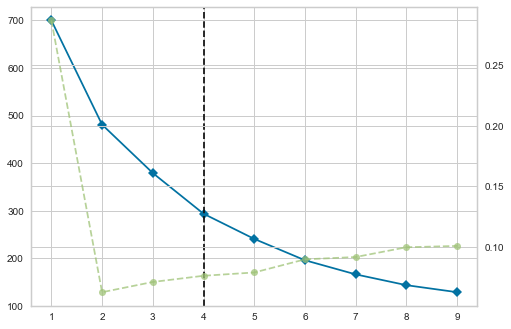

In [64]:
# k 개수를 정하기 위한 Elbow Method 관련 라이브러리 호출  
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10)) # 객체에 k가 1부터 10까지 상황 부여 
visualizer.fit(X_scaled) # 이전에 스케일 한 데이터를 피팅 


## label == 1 (전세 사기) & 사용자로부터 입력받은 새로운 매물에 대해 클러스터링 
### (전세 사기를 클러스터링을 통해 유형화 했을 때 입력 받은 새로운 매물은 어디에 해당할 것인가) 

In [65]:
pred_svot = pd.DataFrame(svot_clf.predict(X_test)) # 소프트 보팅으로 예측한 결과를 dataframe 화 
pred_svot.columns = ['label'] # 예측한 결과에 'label' column 명 부여  
pred_svot  



,label
0,0
1,0
2,0
3,1
4,1
...,...
95,1
96,1
97,1
98,0


In [66]:
# 크롤링, OCR 로 수집한 값들과 그에 대한 라벨링을 하나의 행으로 만들기  ( = 새로운 데이터 라고 지칭하겠습니다.)
X_scaled = X_scaled.merge(pred_svot, how='left', left_index=True, right_index=True)  
pred = X_scaled.iloc[-1]
pred_df = pd.DataFrame(pred)
pred_reshaped = pred_df.T
pred_reshaped

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령,label
99,-0.750335,1.130718,-0.426701,-0.100504,-0.639101,-0.51558,-0.608164,0.0


In [67]:
# scaling 마친 기존의 test 데이터중 label 값이 1( = 사기라고 예측) 과 새로운 데이터를 행 결합 
X_scaled = X_scaled[X_scaled['label'] == 1]
X_scaled_pred = pd.concat([X_scaled,pred_reshaped],axis = 0)
X_scaled_pred

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령,label
3,0.404311,0.815169,-0.244945,-0.100504,1.564697,1.939563,1.644294,1.0
4,0.871983,1.130718,-0.227688,-0.100504,-0.639101,1.939563,1.644294,1.0
5,0.319996,0.815169,-0.210333,-0.100504,-0.639101,-0.515580,-0.608164,1.0
8,-1.673955,1.130718,0.088662,-0.100504,1.564697,-0.515580,-0.608164,1.0
9,0.737359,0.184070,-0.244203,-0.100504,-0.639101,-0.515580,-0.608164,1.0
11,1.954835,1.025535,4.316724,-0.100504,1.564697,1.939563,1.644294,1.0
12,0.737359,1.025535,-0.244203,-0.100504,1.564697,-0.515580,1.644294,1.0
13,0.737359,-1.288493,0.132577,-0.100504,-0.639101,1.939563,1.644294,1.0
14,-2.238927,1.130718,0.018950,-0.100504,-0.639101,-0.515580,-0.608164,1.0
16,-0.861820,0.604803,0.136469,-0.100504,-0.639101,-0.515580,-0.608164,1.0


In [68]:
# k - means 클러스터링 

model = KMeans(n_clusters = 3)  
model.fit(X_scaled_pred)

# 클러스터링 결과를 'cluster' 열에 입력 
X_scaled_pred['cluster'] =model.fit_predict(X_scaled_pred) 
X_scaled_pred['cluster']
X_scaled_pred

,전세가율,시공일자_년도,근저당정규화,신탁,압류,가압류,임차권등기명령,label,cluster
3,0.404311,0.815169,-0.244945,-0.100504,1.564697,1.939563,1.644294,1.0,1
4,0.871983,1.130718,-0.227688,-0.100504,-0.639101,1.939563,1.644294,1.0,1
5,0.319996,0.815169,-0.210333,-0.100504,-0.639101,-0.515580,-0.608164,1.0,0
8,-1.673955,1.130718,0.088662,-0.100504,1.564697,-0.515580,-0.608164,1.0,0
9,0.737359,0.184070,-0.244203,-0.100504,-0.639101,-0.515580,-0.608164,1.0,0
11,1.954835,1.025535,4.316724,-0.100504,1.564697,1.939563,1.644294,1.0,2
12,0.737359,1.025535,-0.244203,-0.100504,1.564697,-0.515580,1.644294,1.0,1
13,0.737359,-1.288493,0.132577,-0.100504,-0.639101,1.939563,1.644294,1.0,1
14,-2.238927,1.130718,0.018950,-0.100504,-0.639101,-0.515580,-0.608164,1.0,0
16,-0.861820,0.604803,0.136469,-0.100504,-0.639101,-0.515580,-0.608164,1.0,0


C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosuk\anaconda3\ANA\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Gl

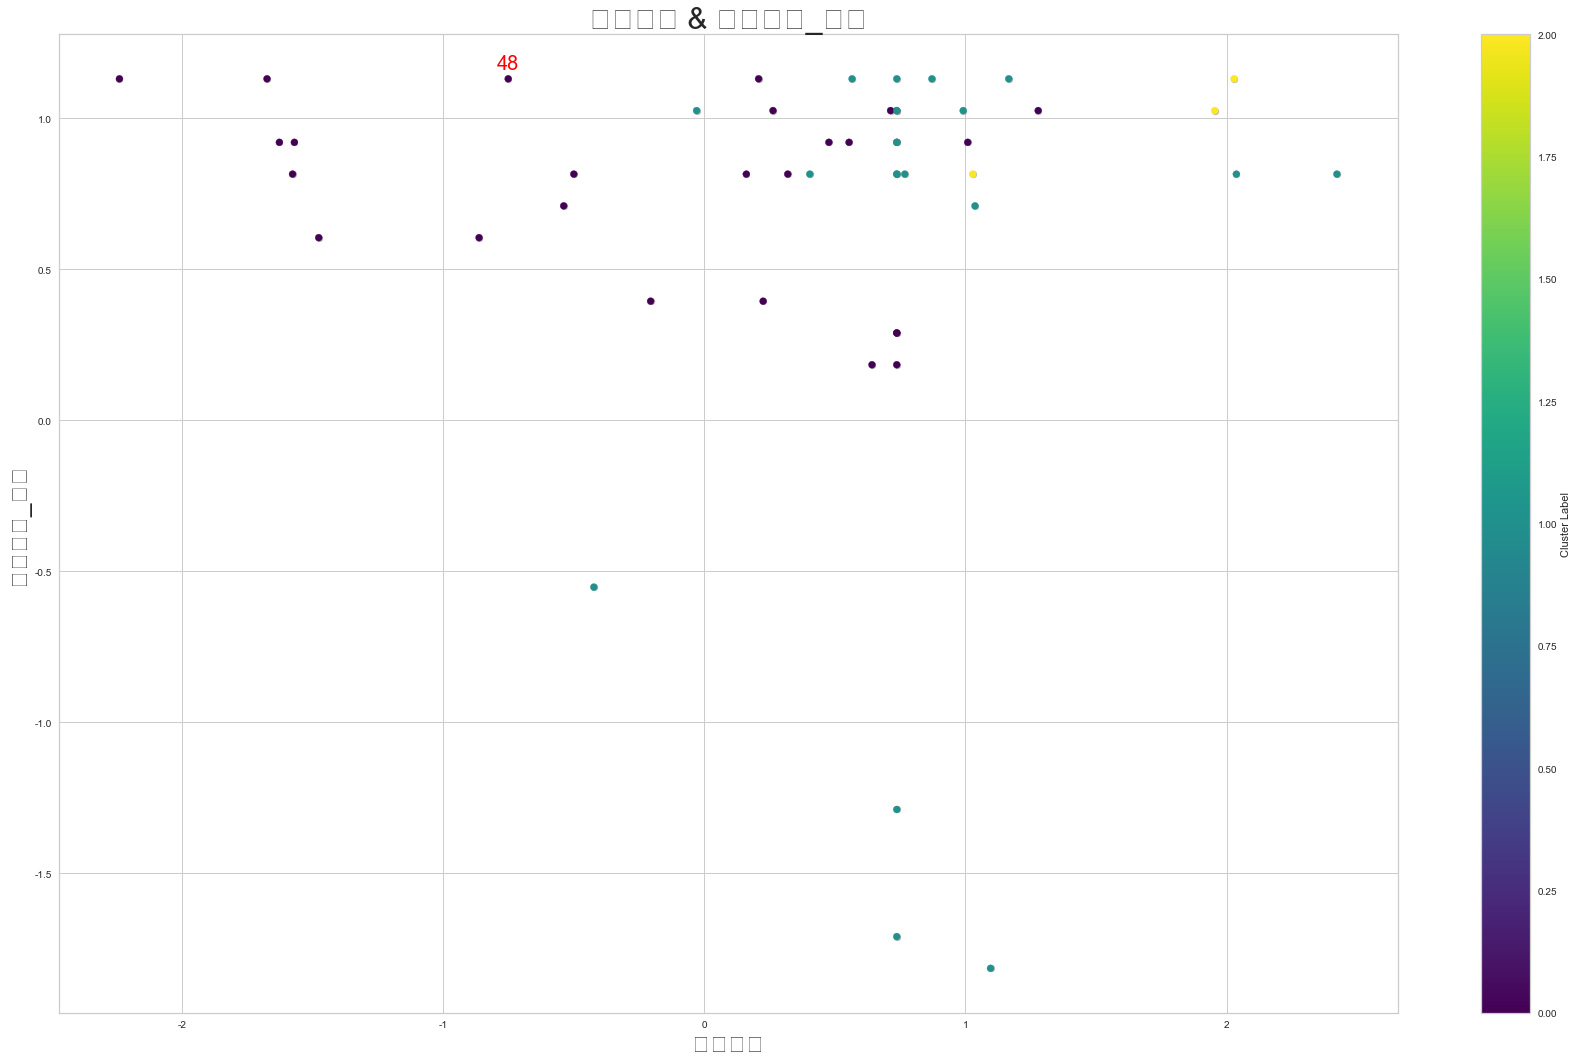

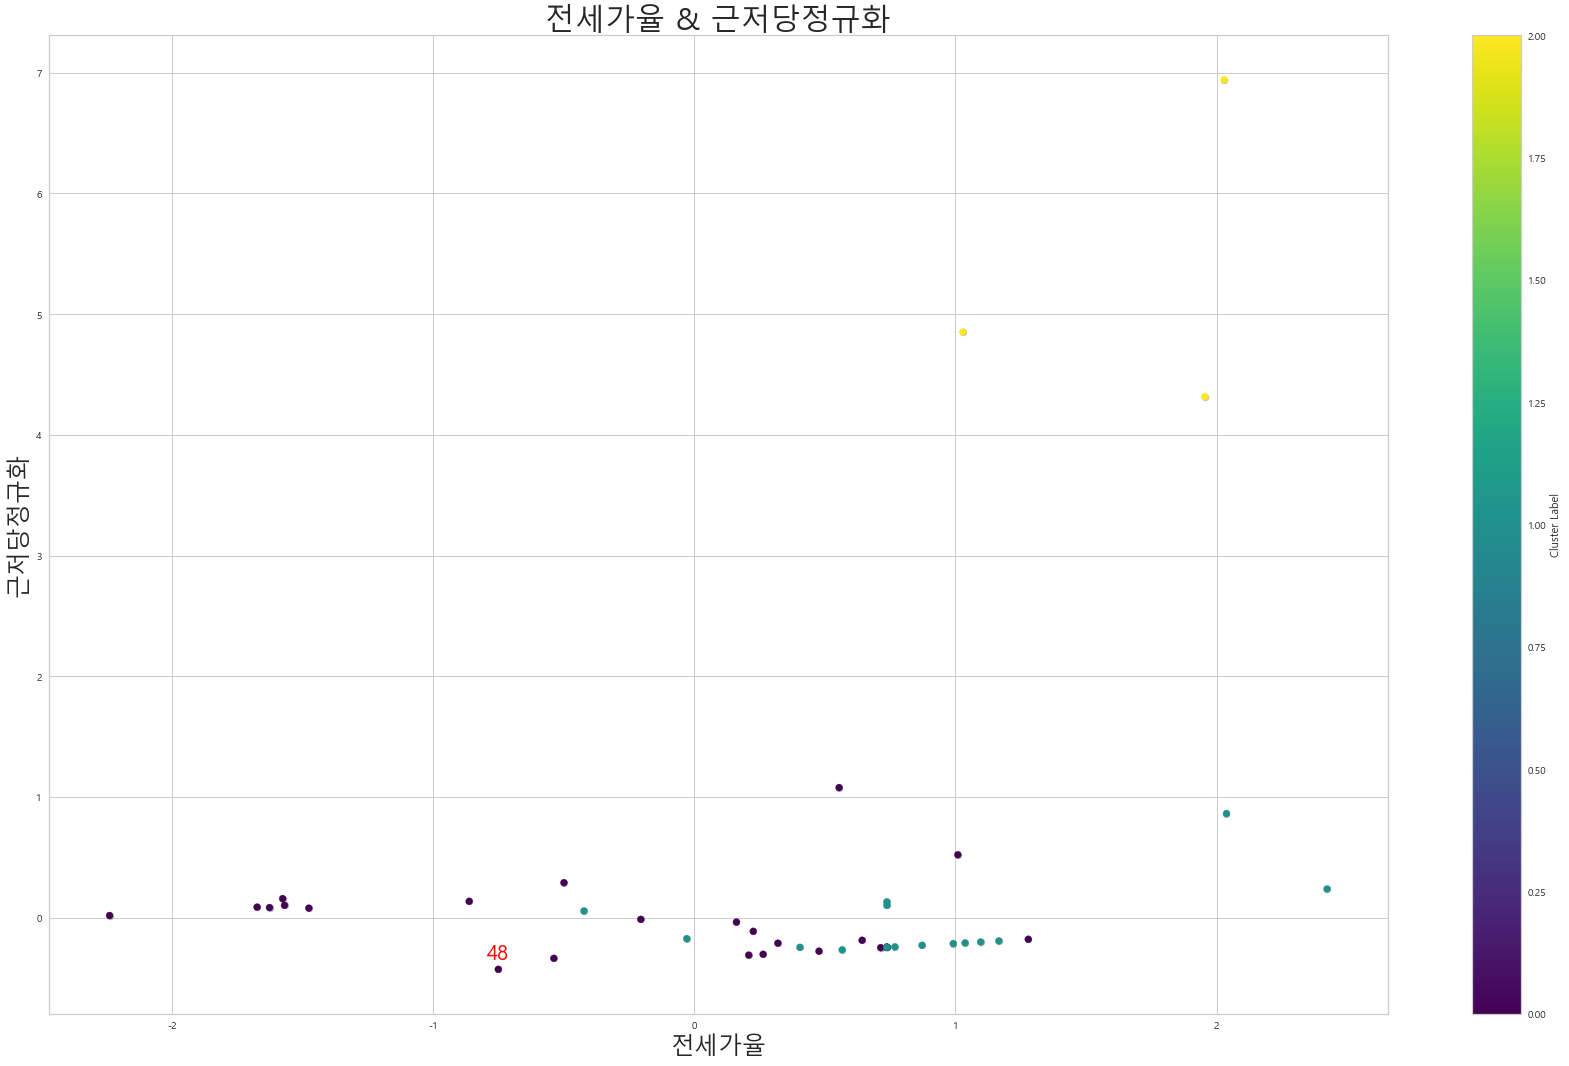

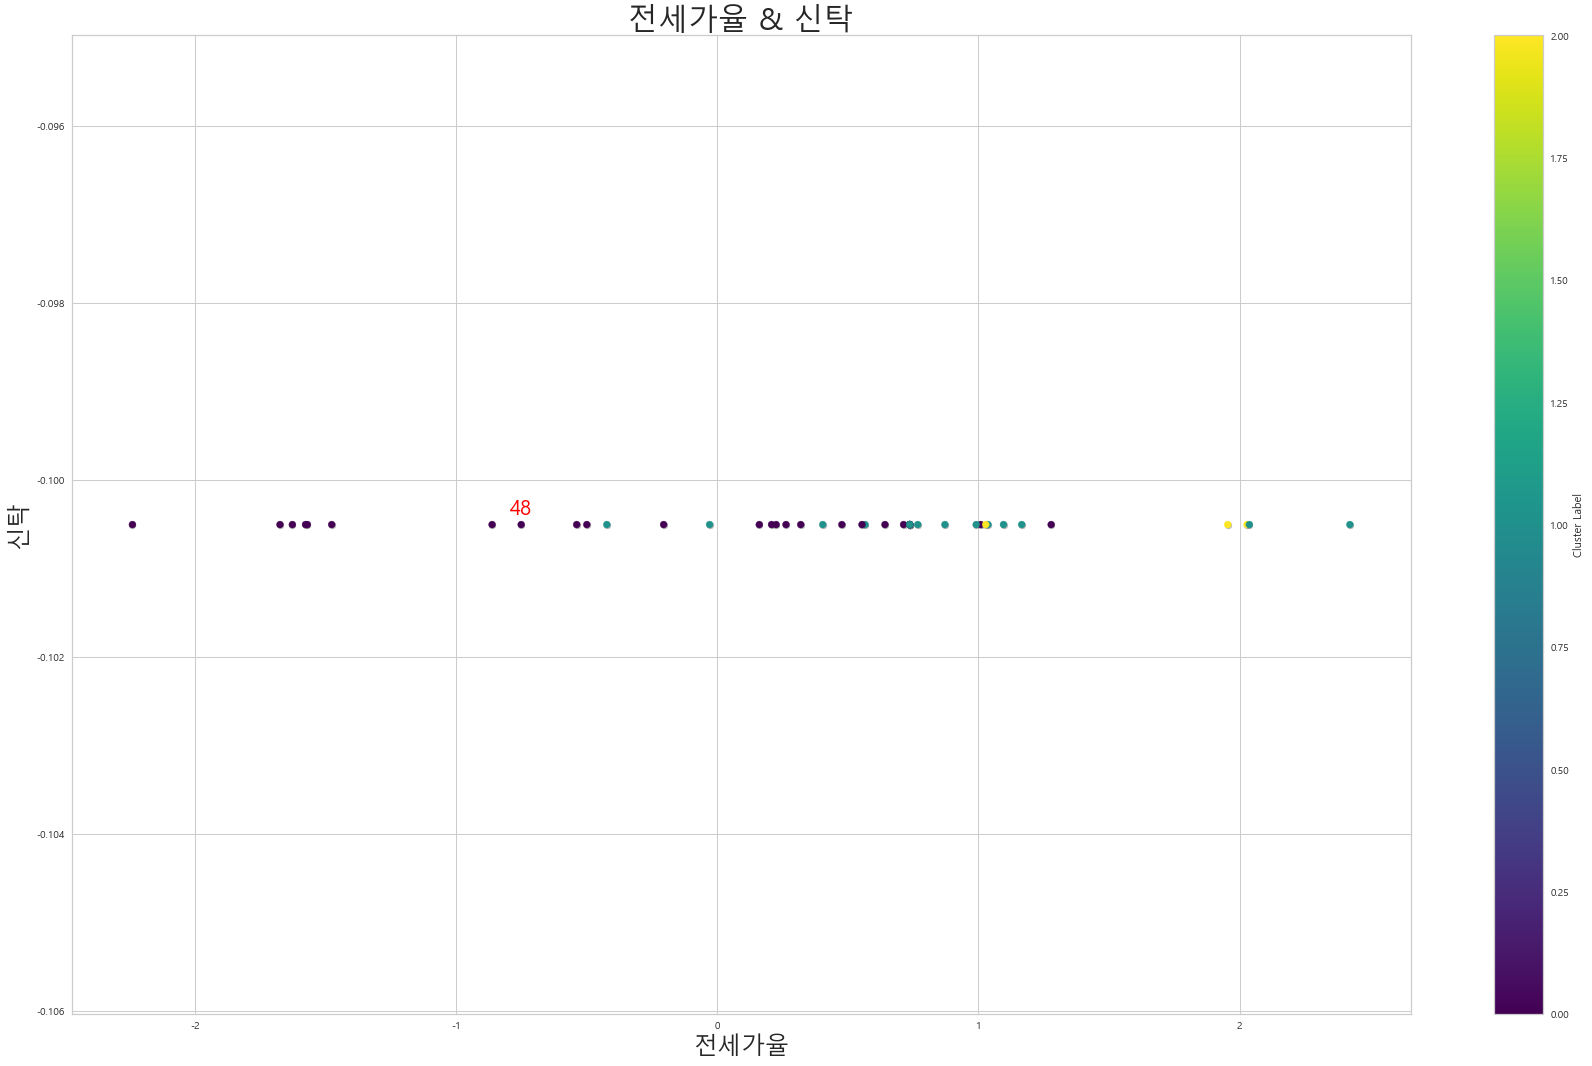

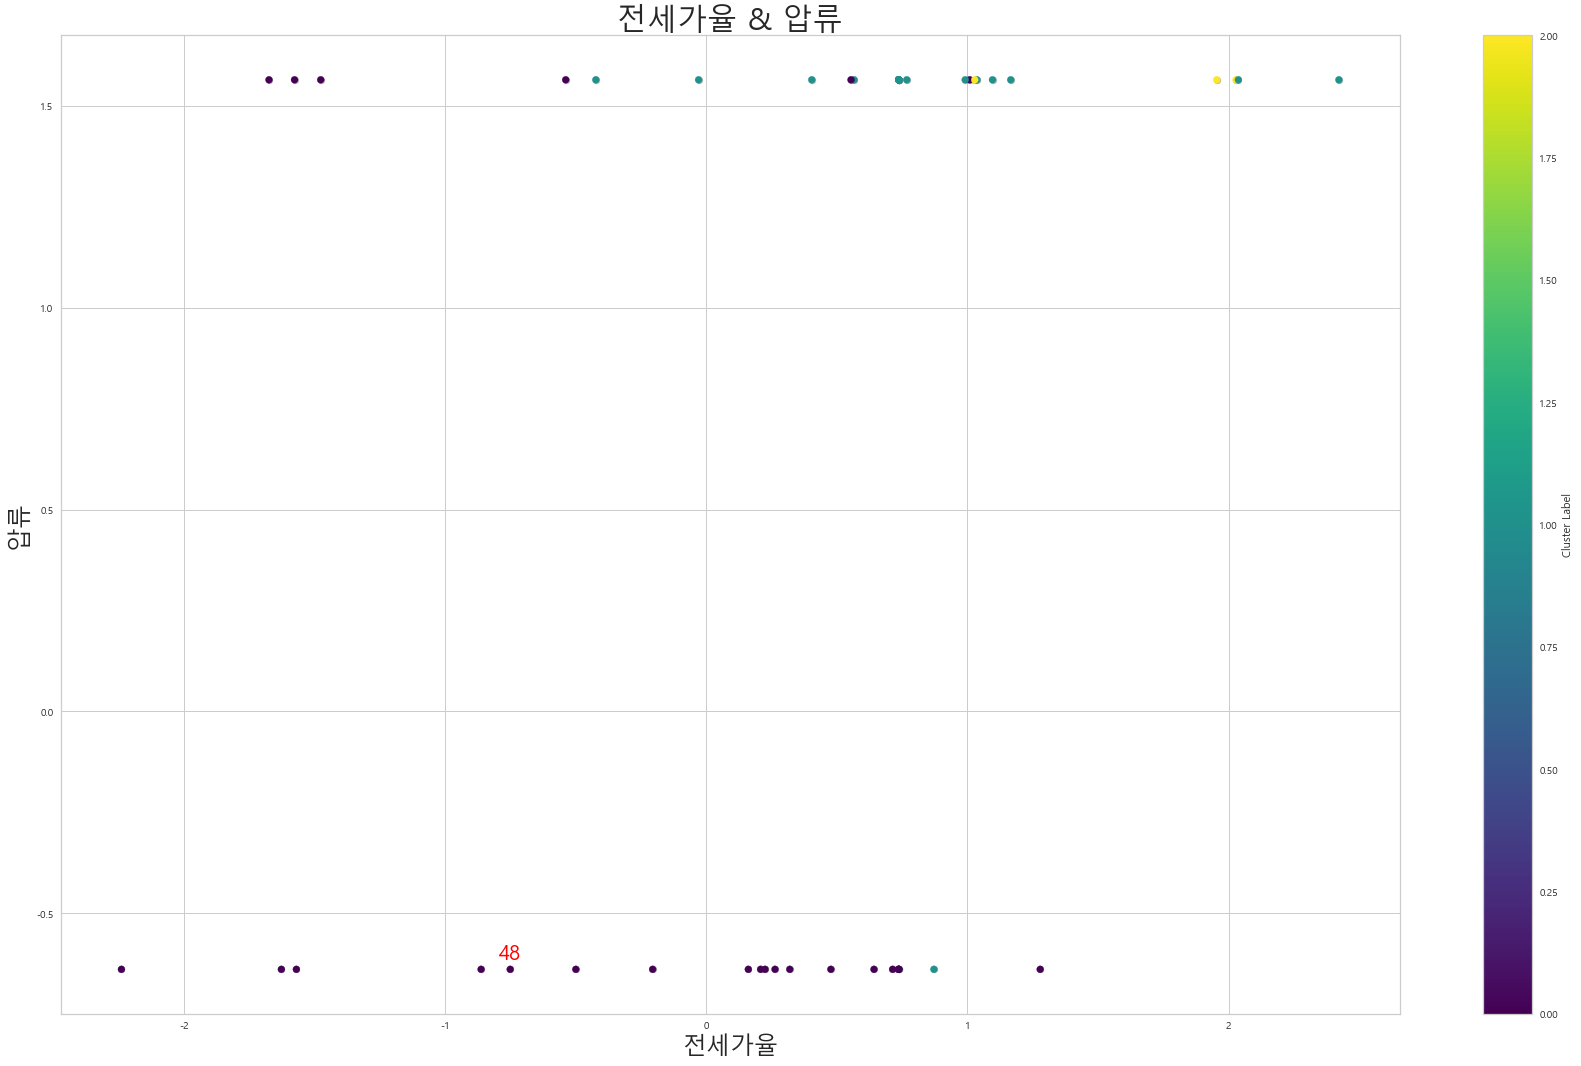

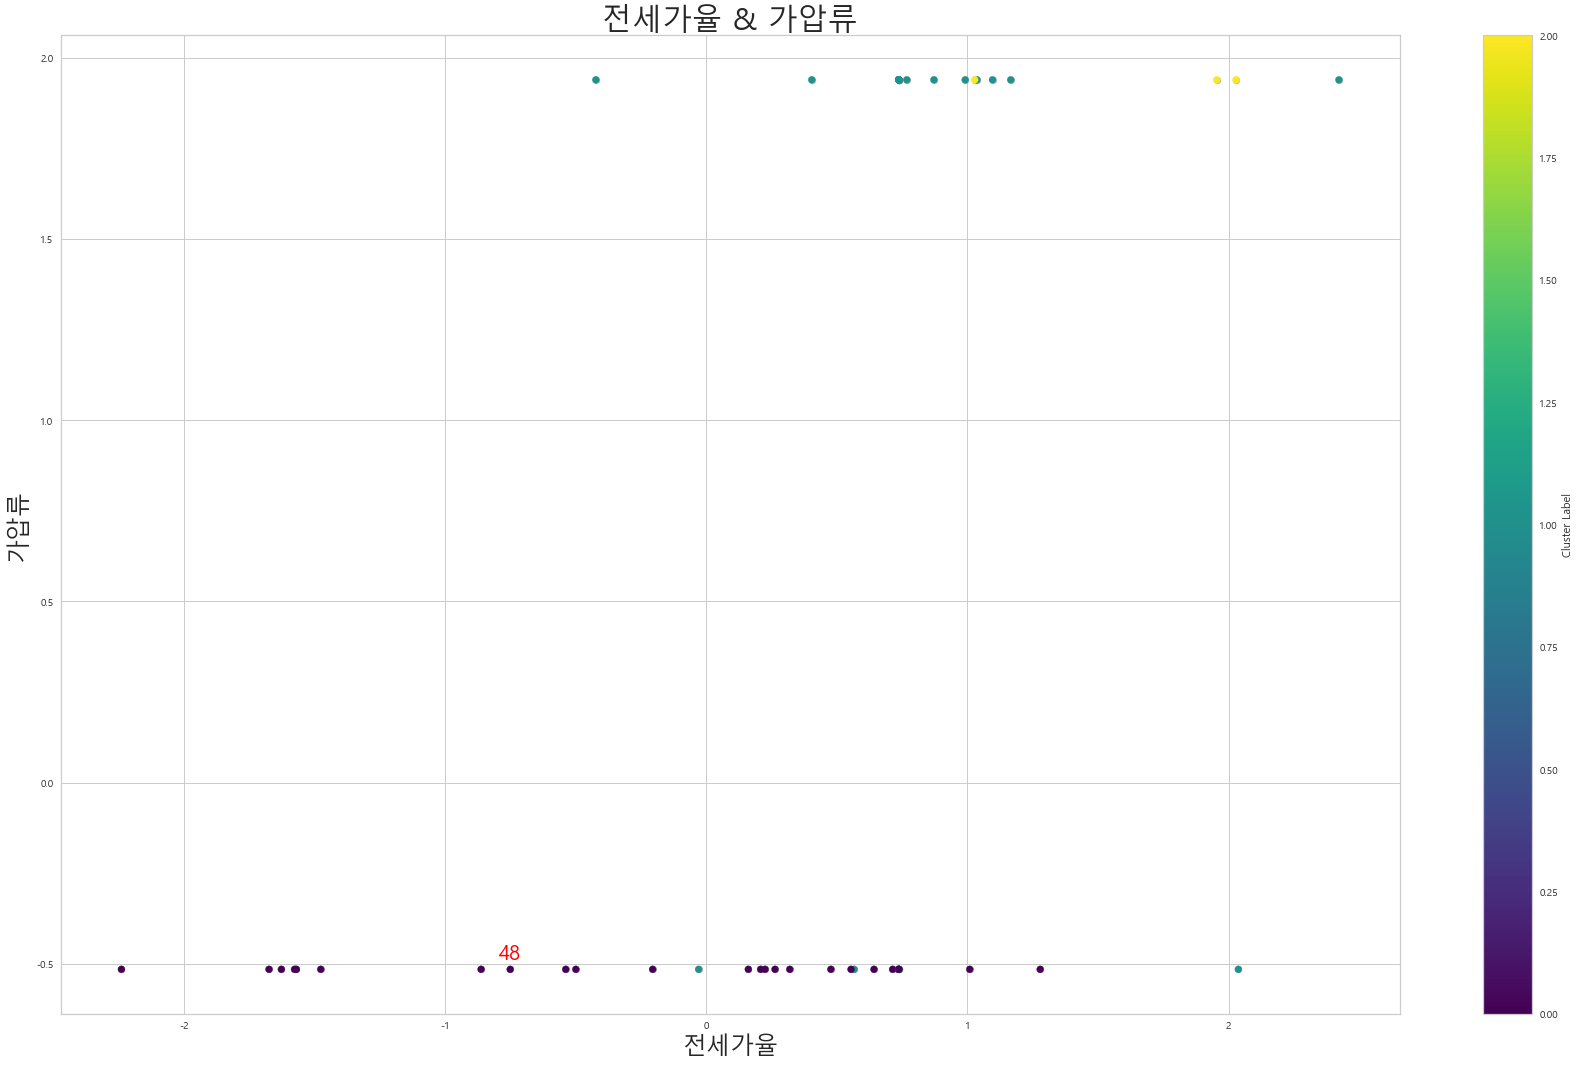

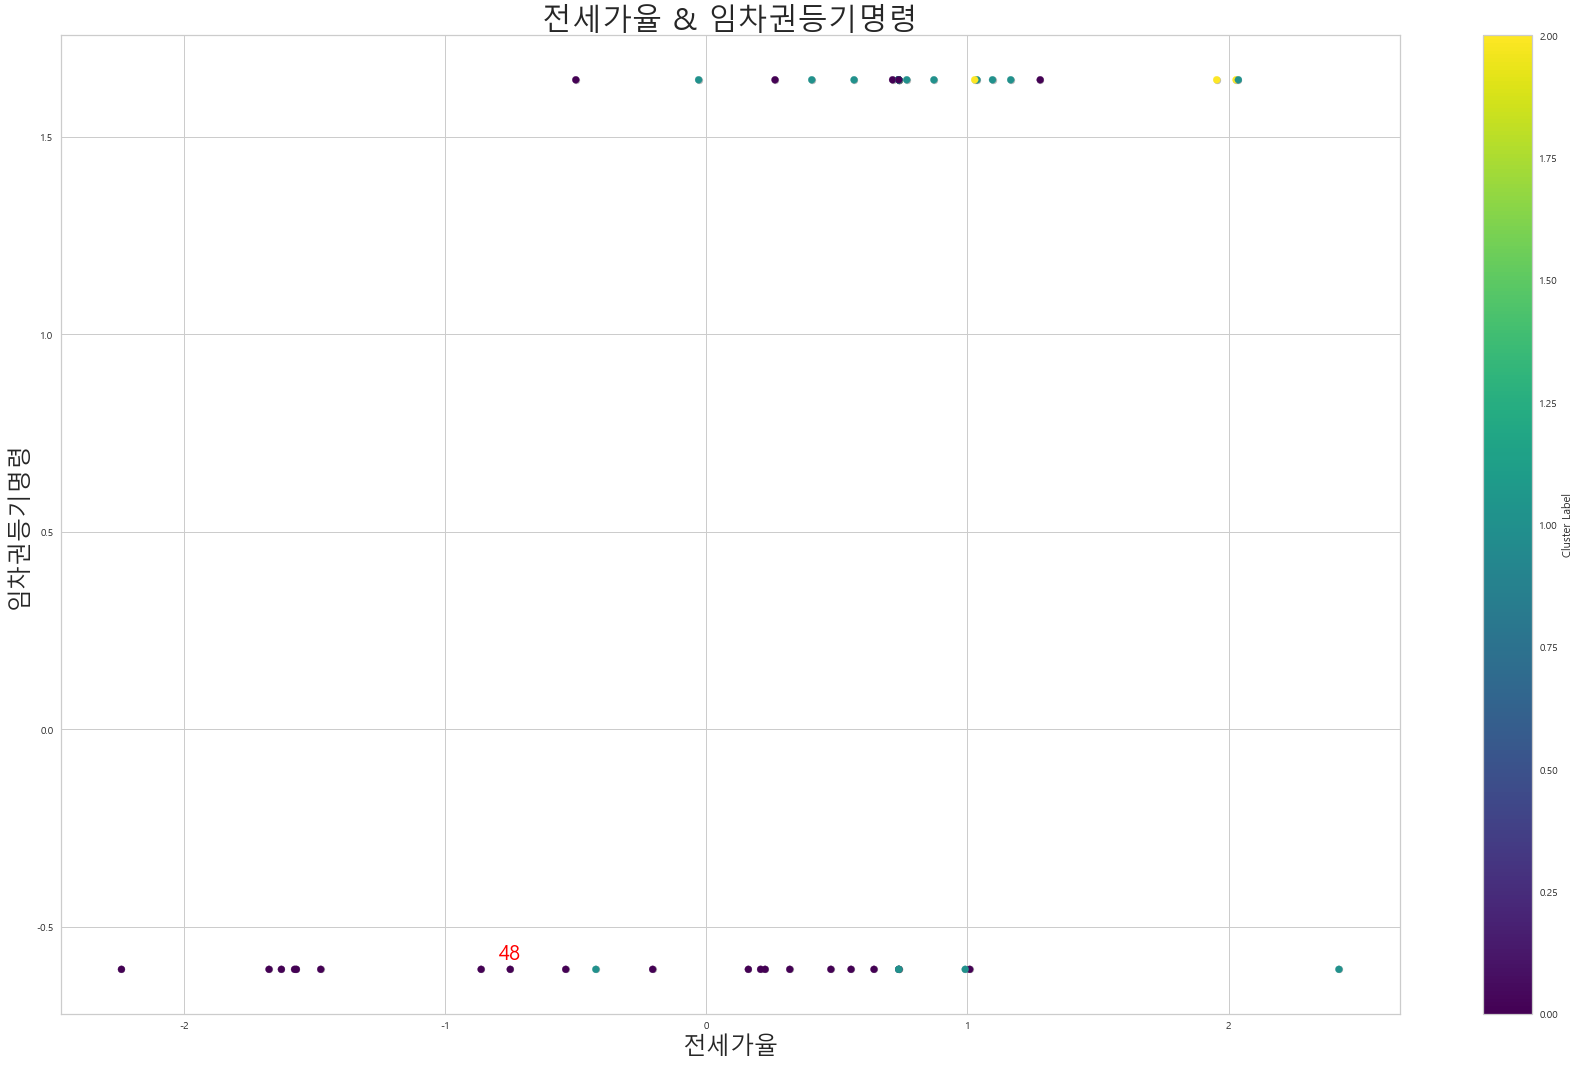

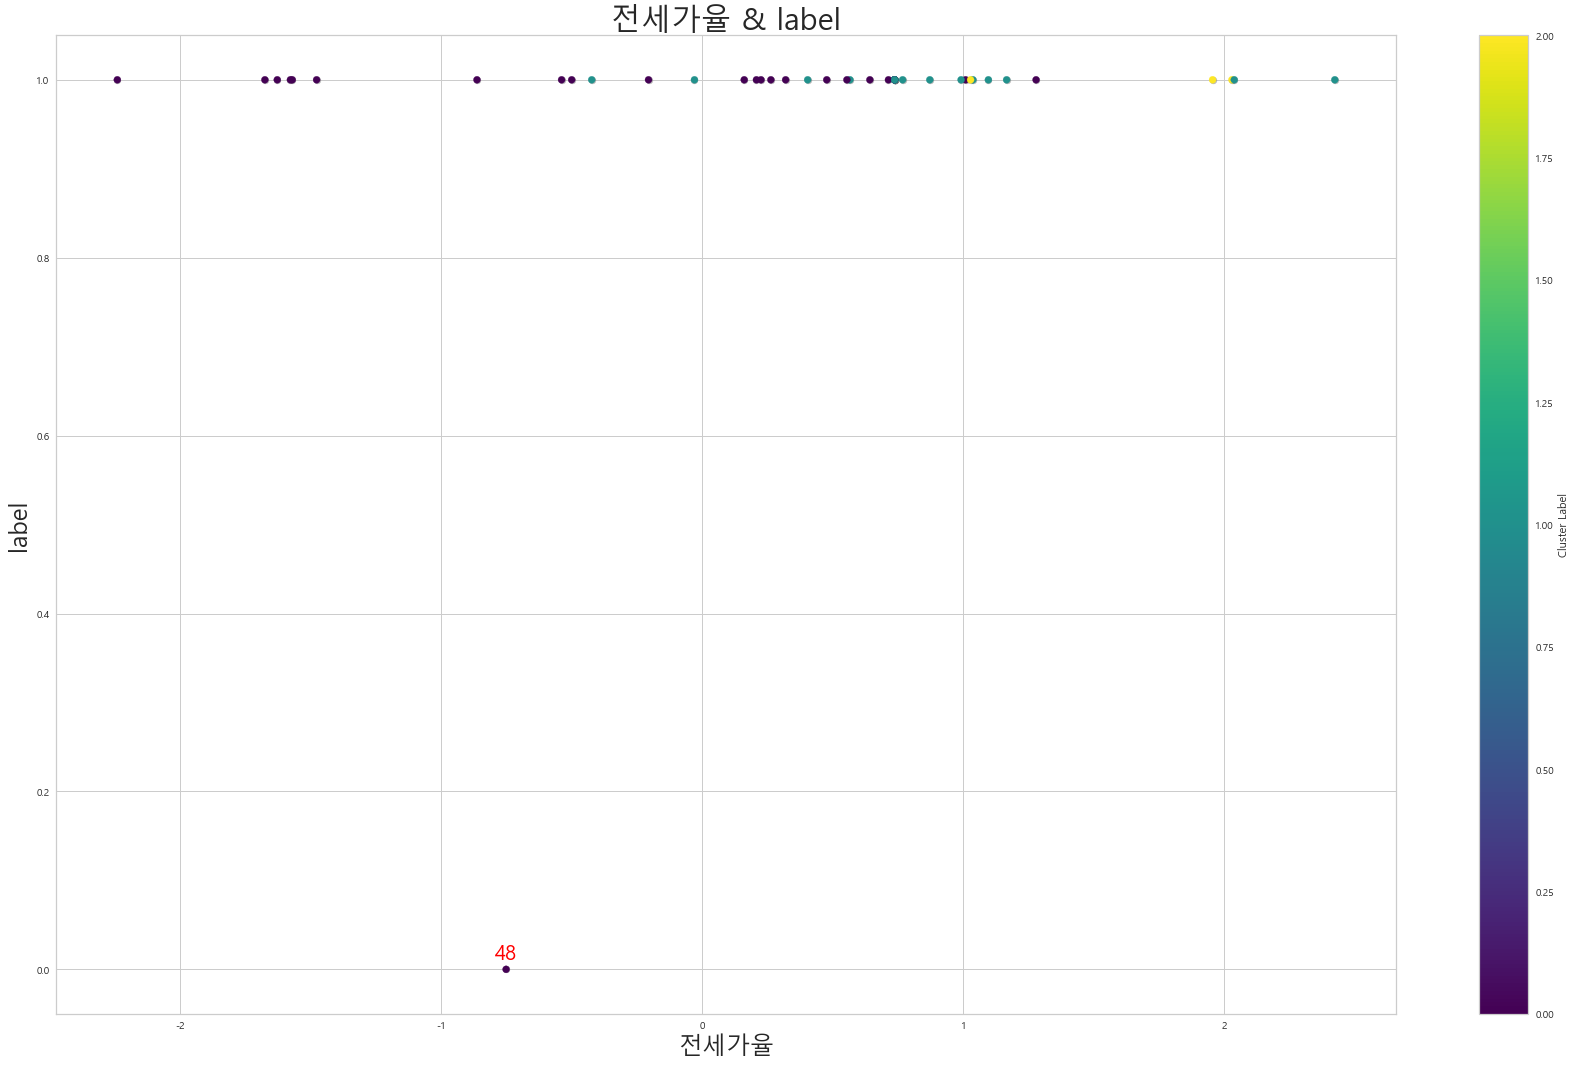

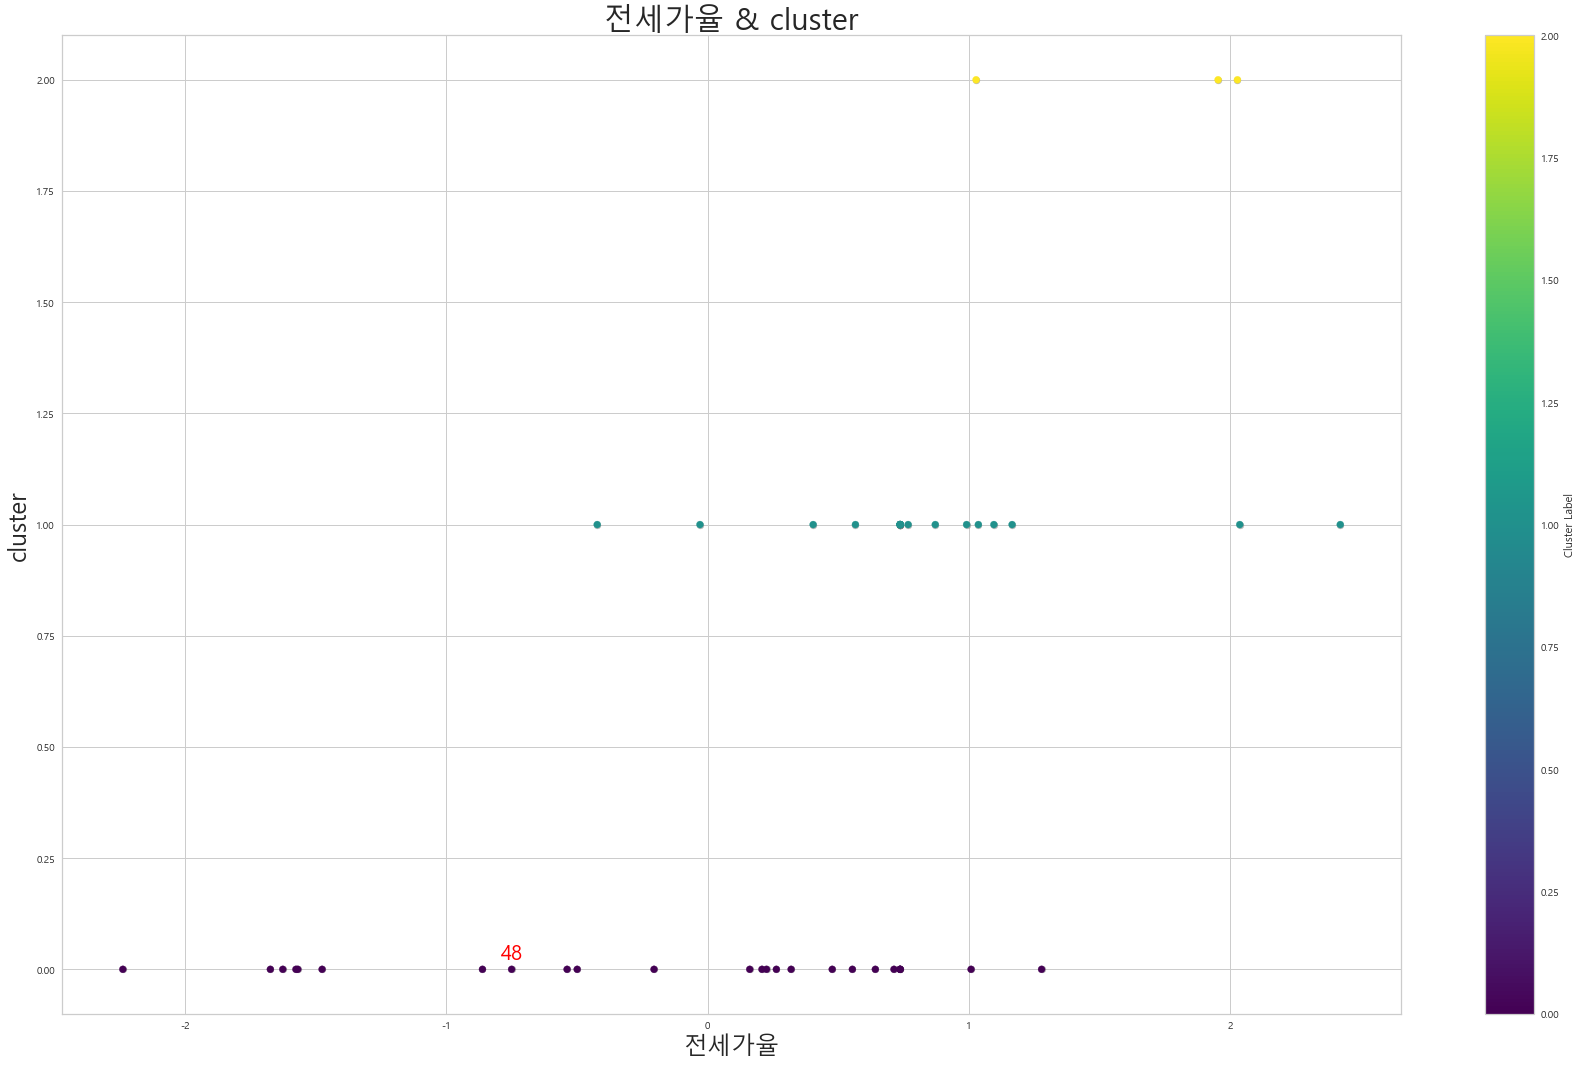

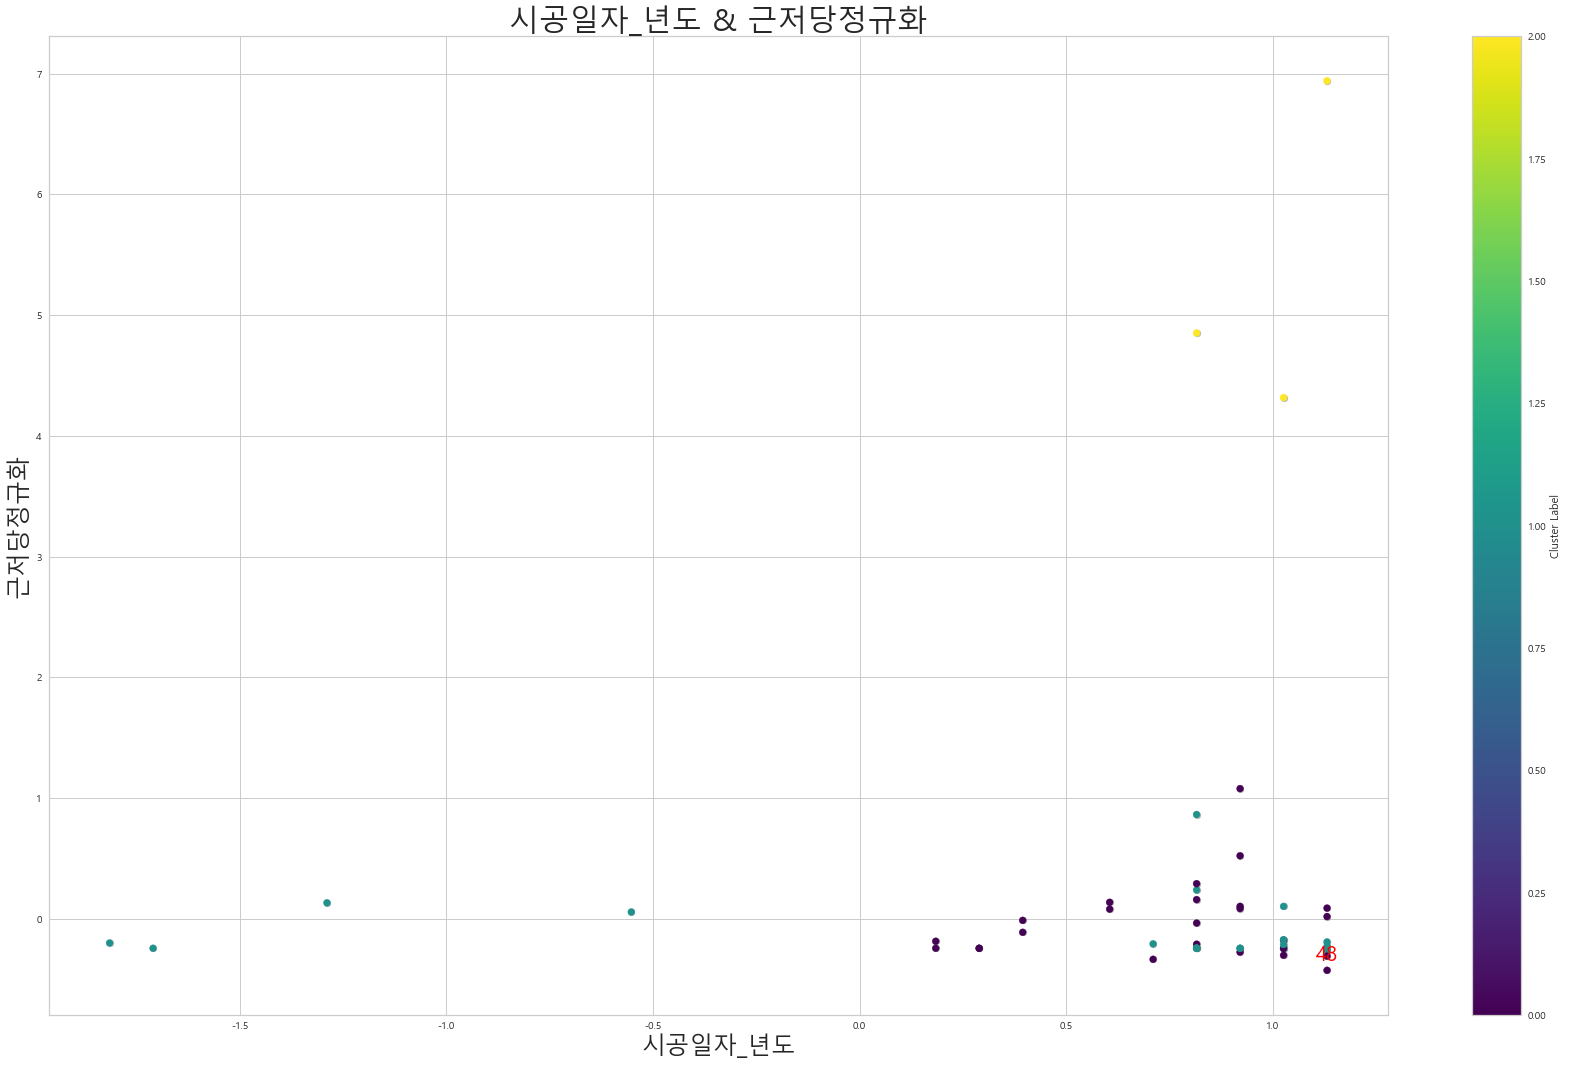

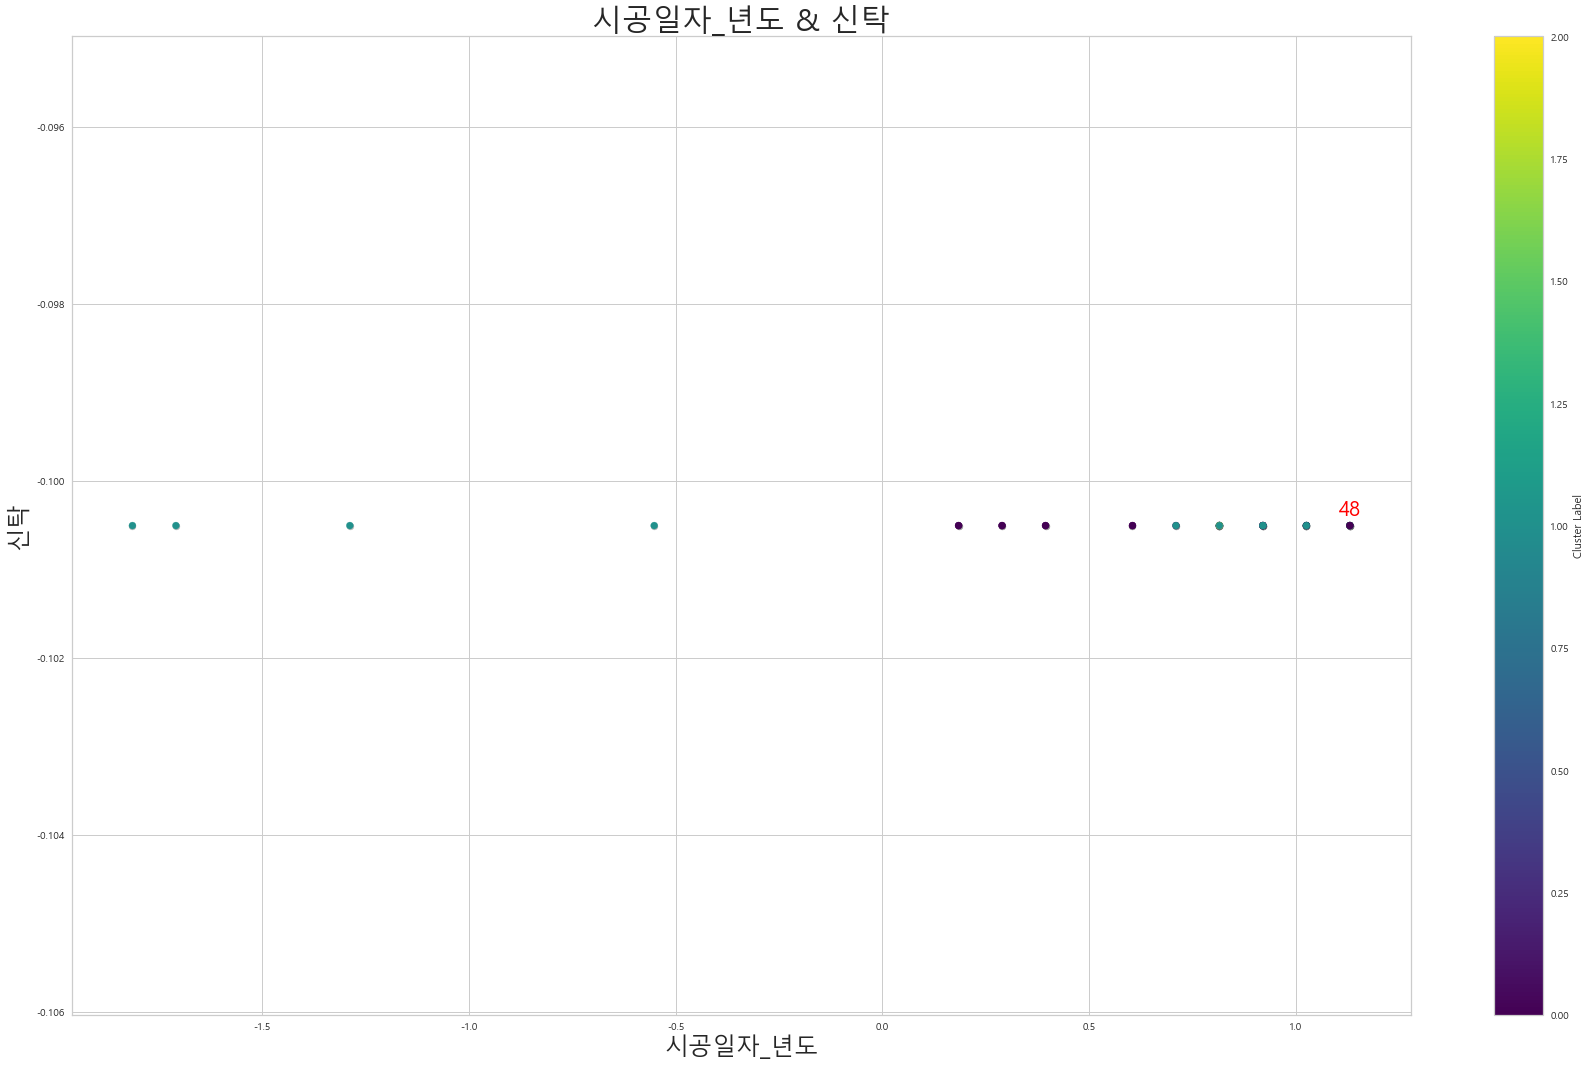

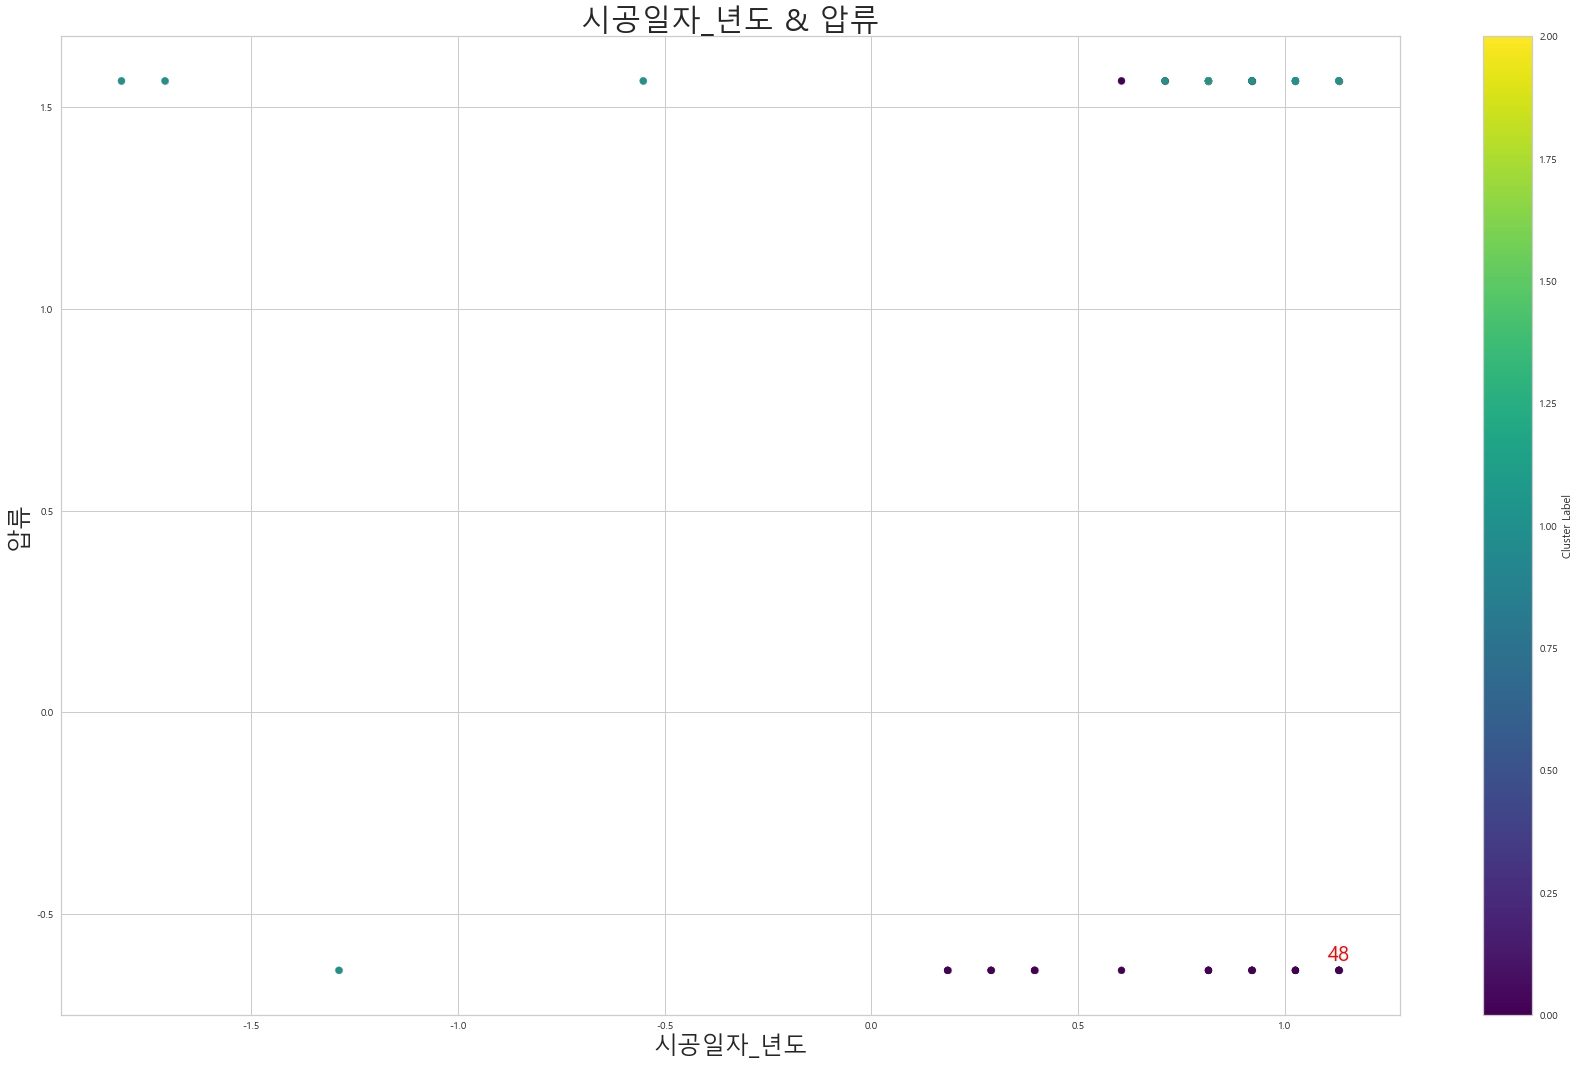

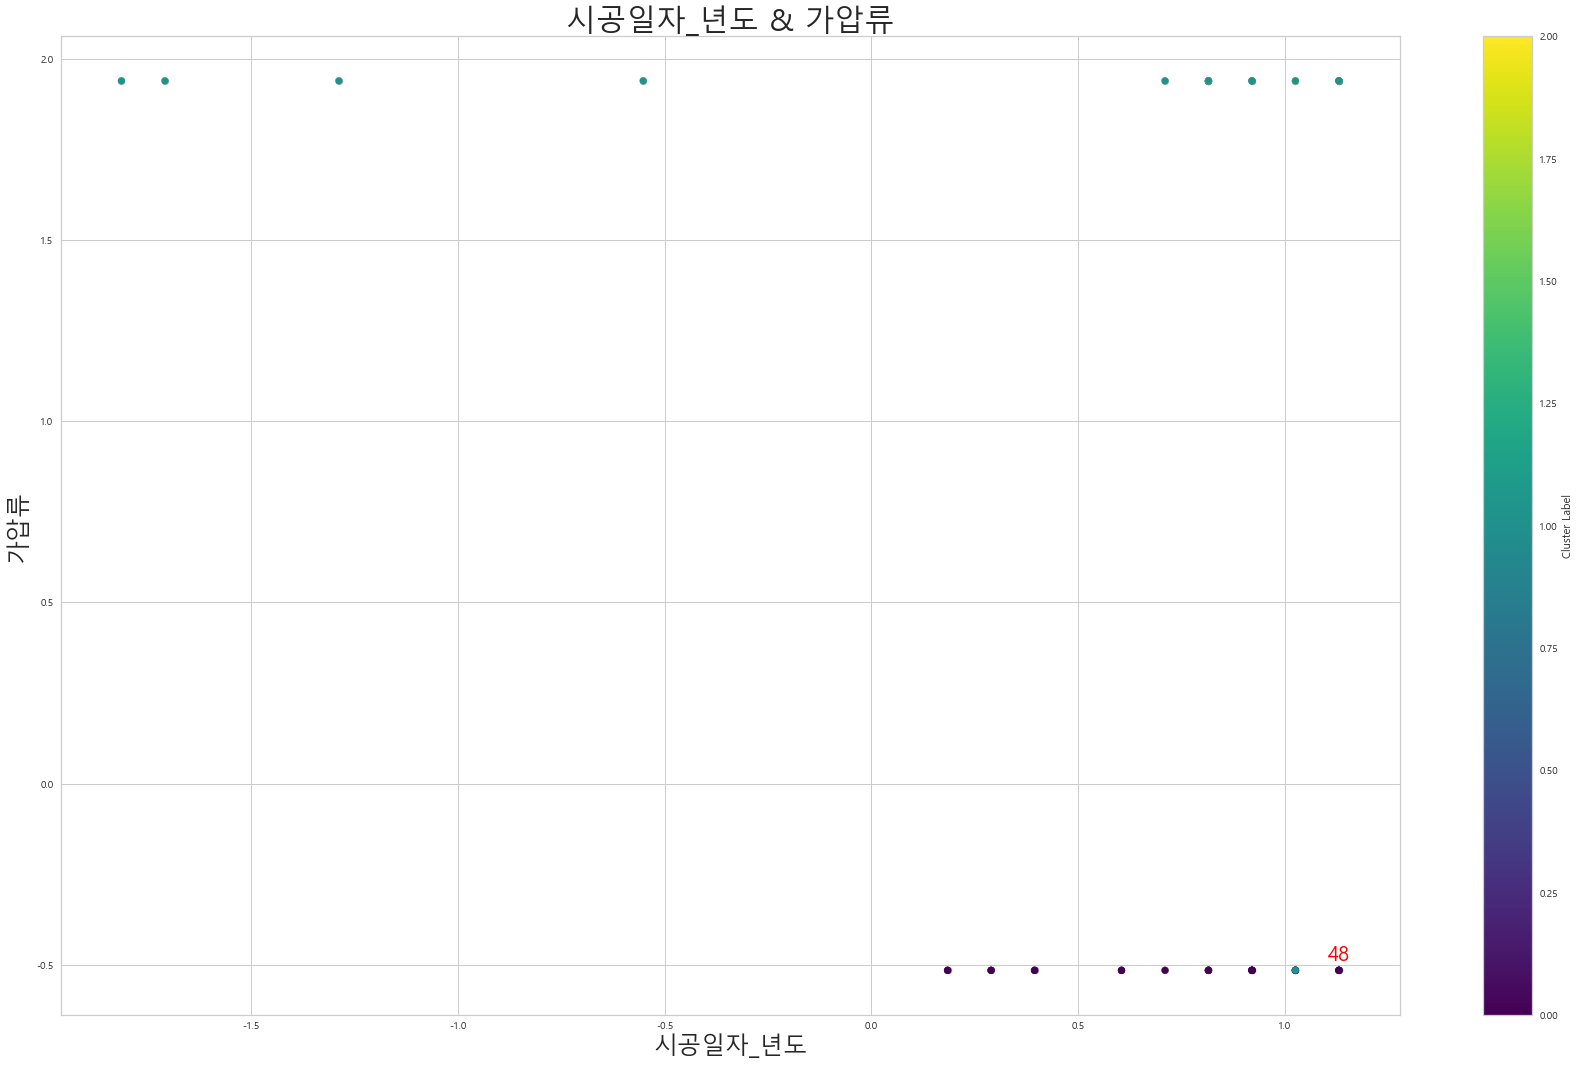

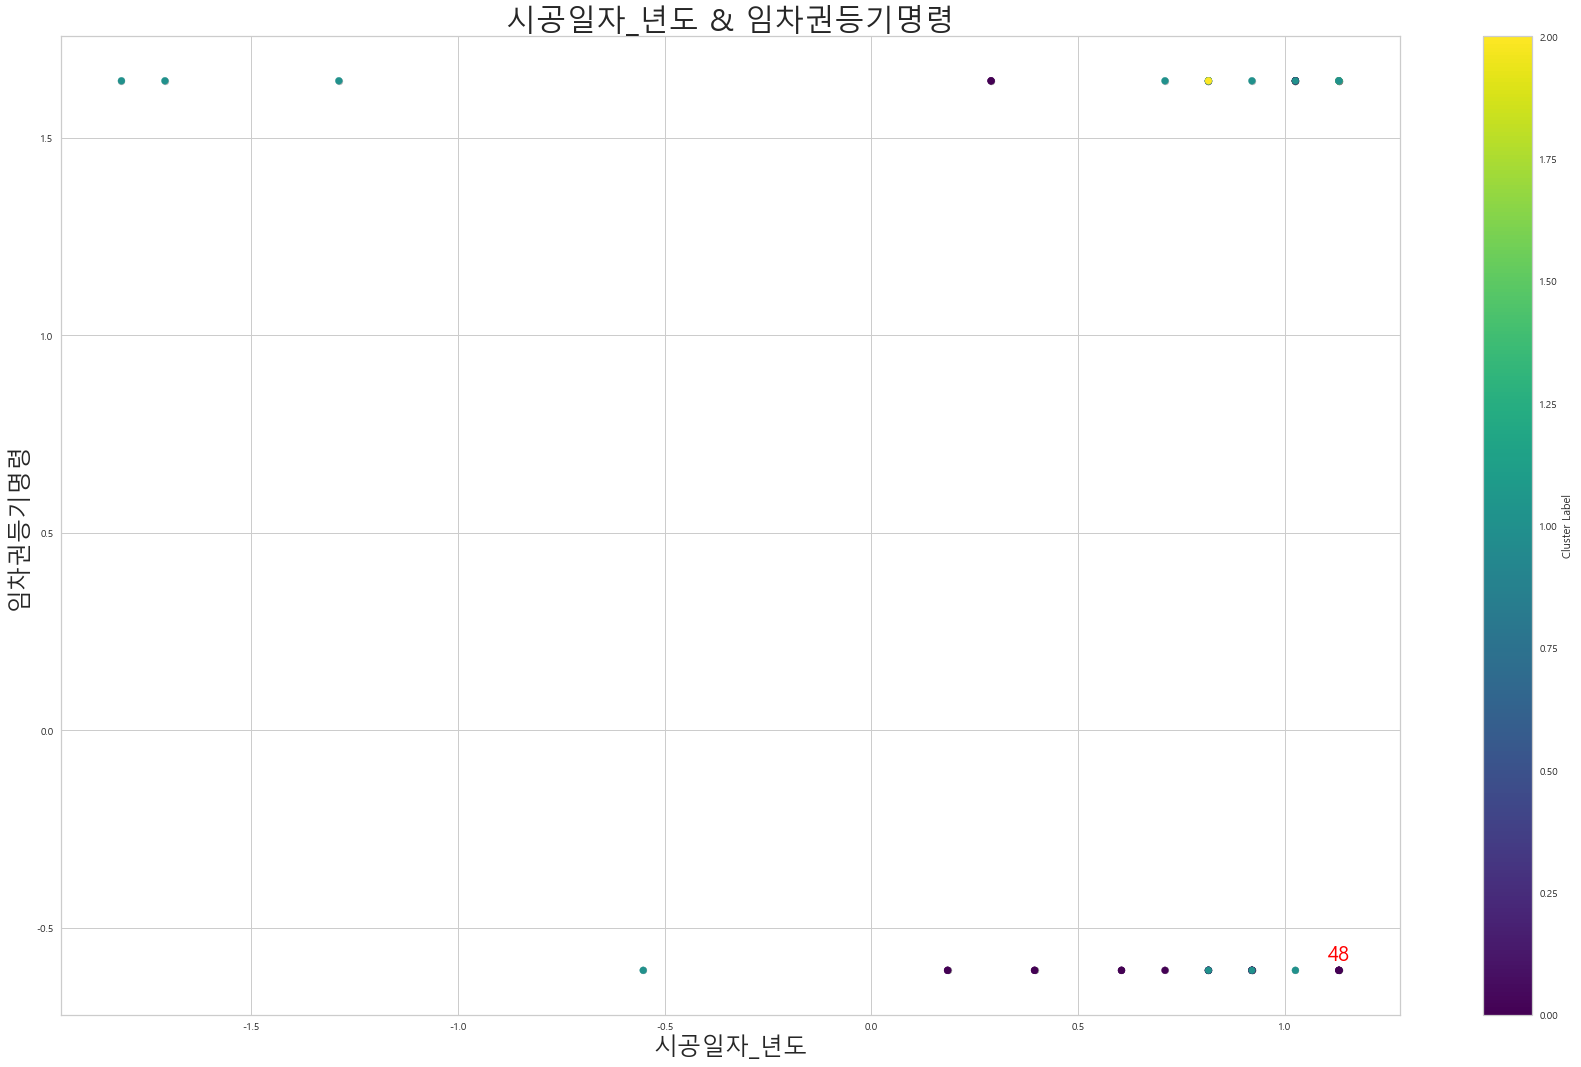

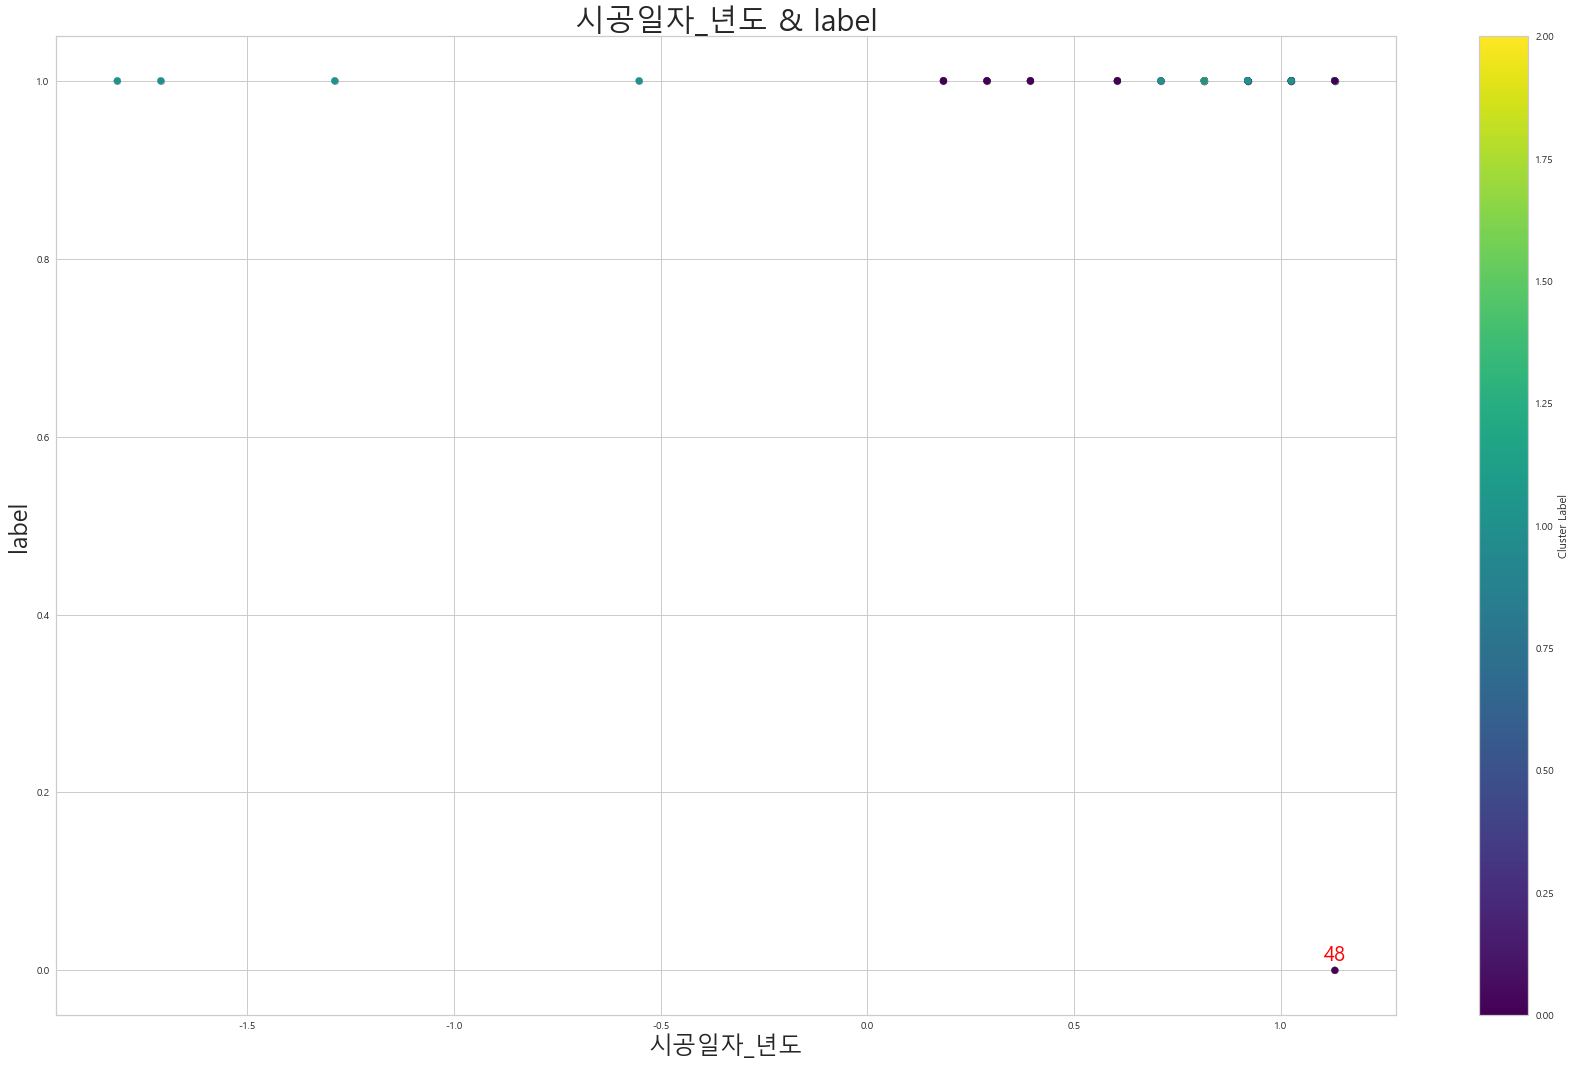

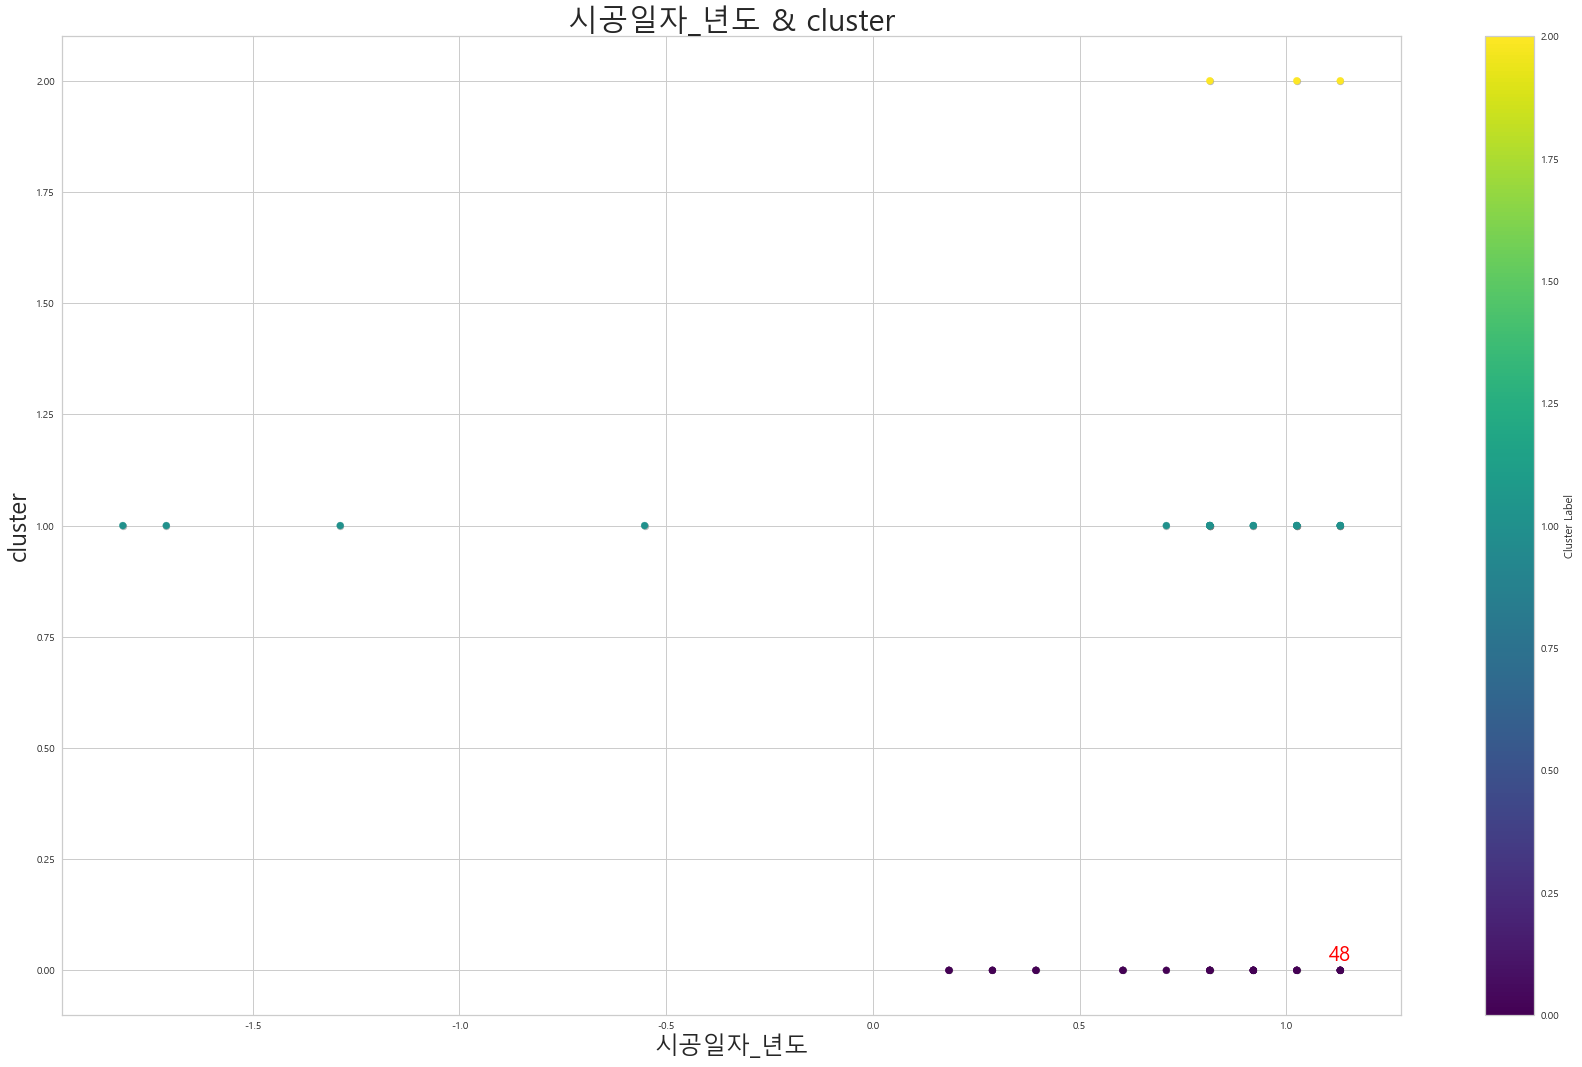

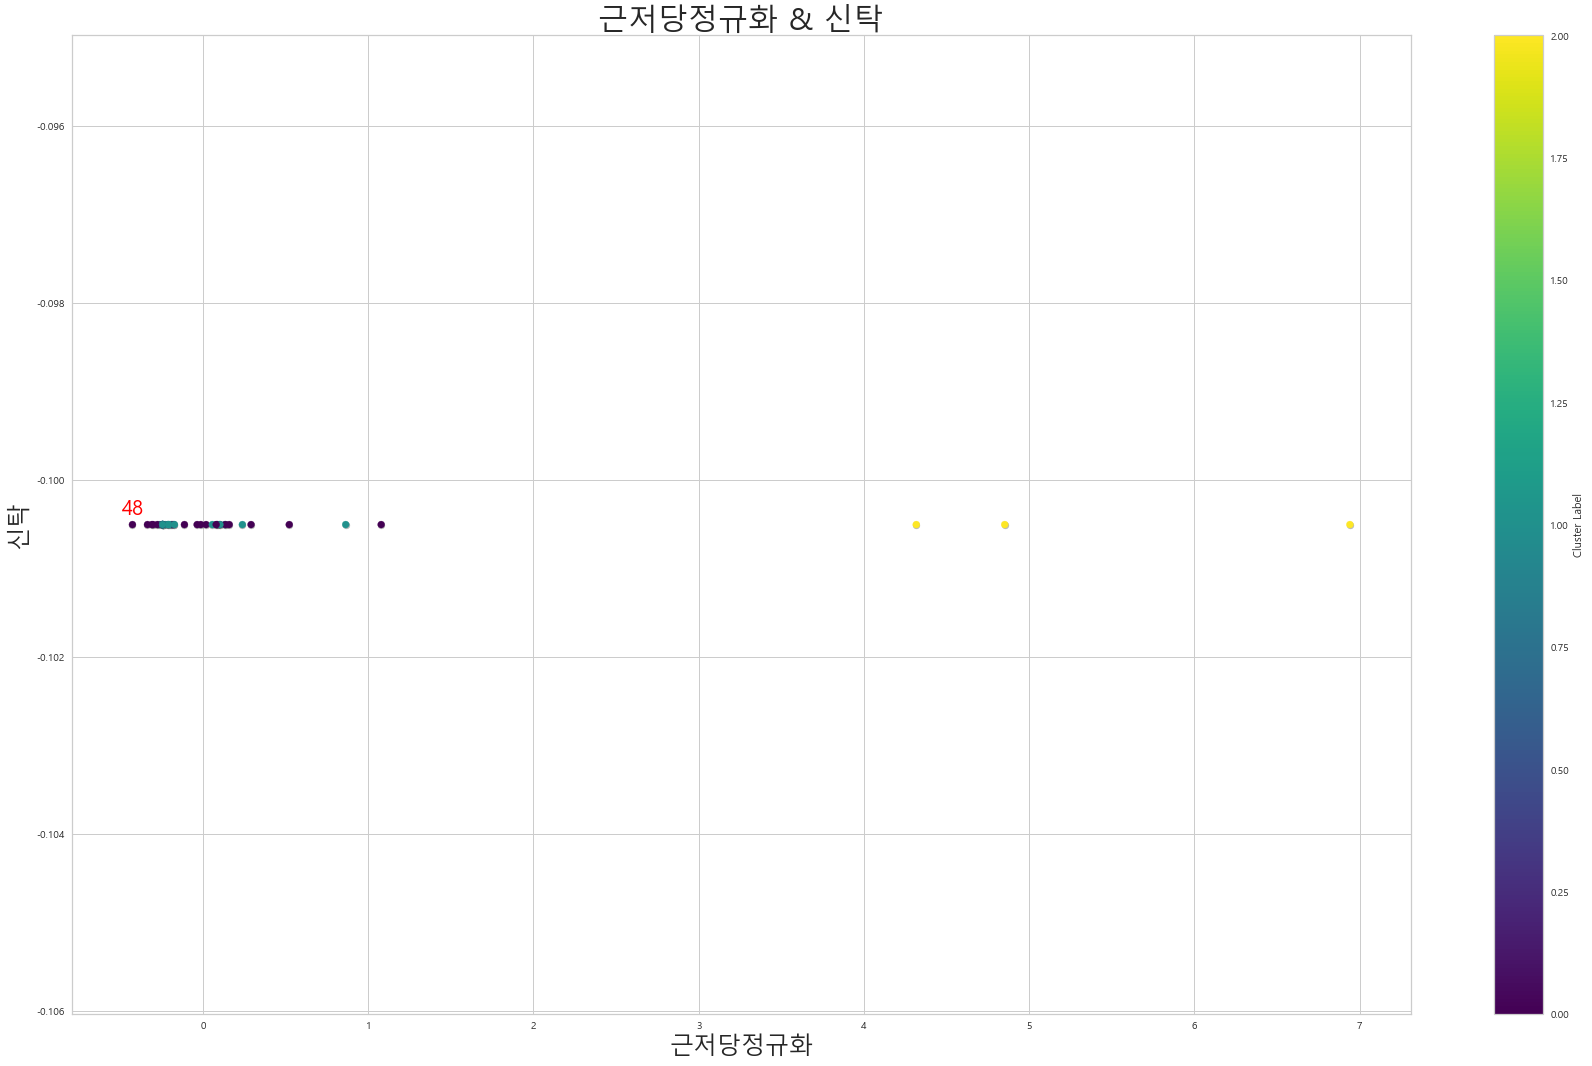

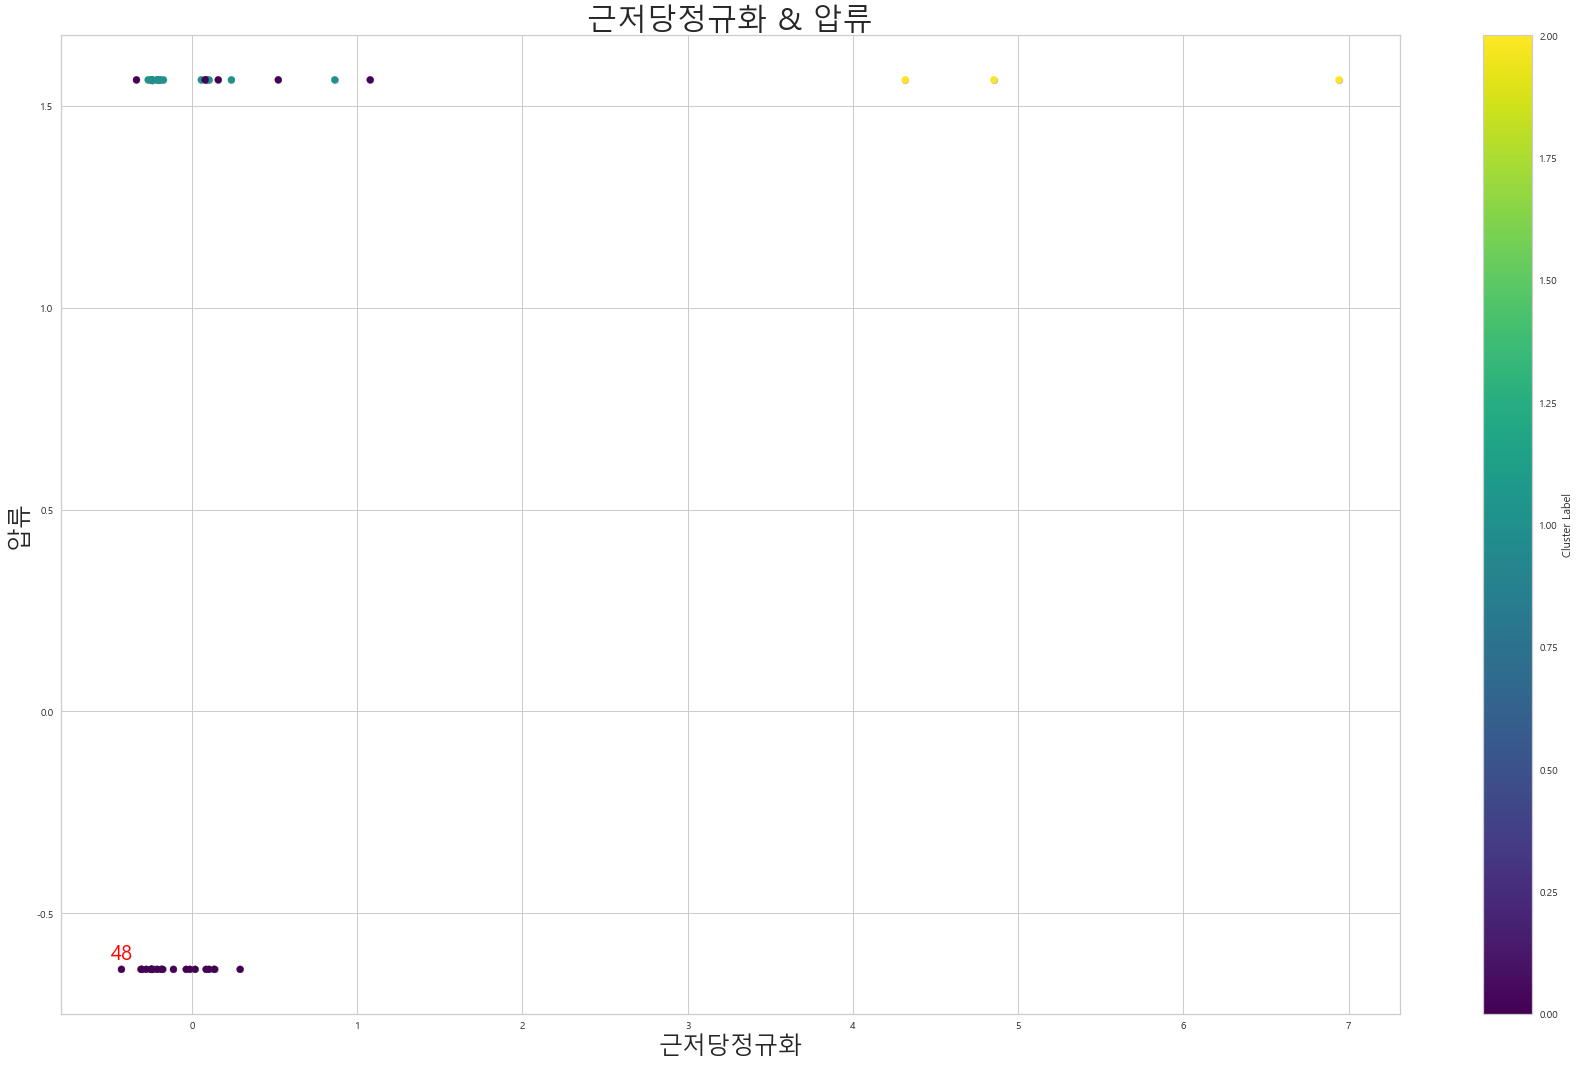

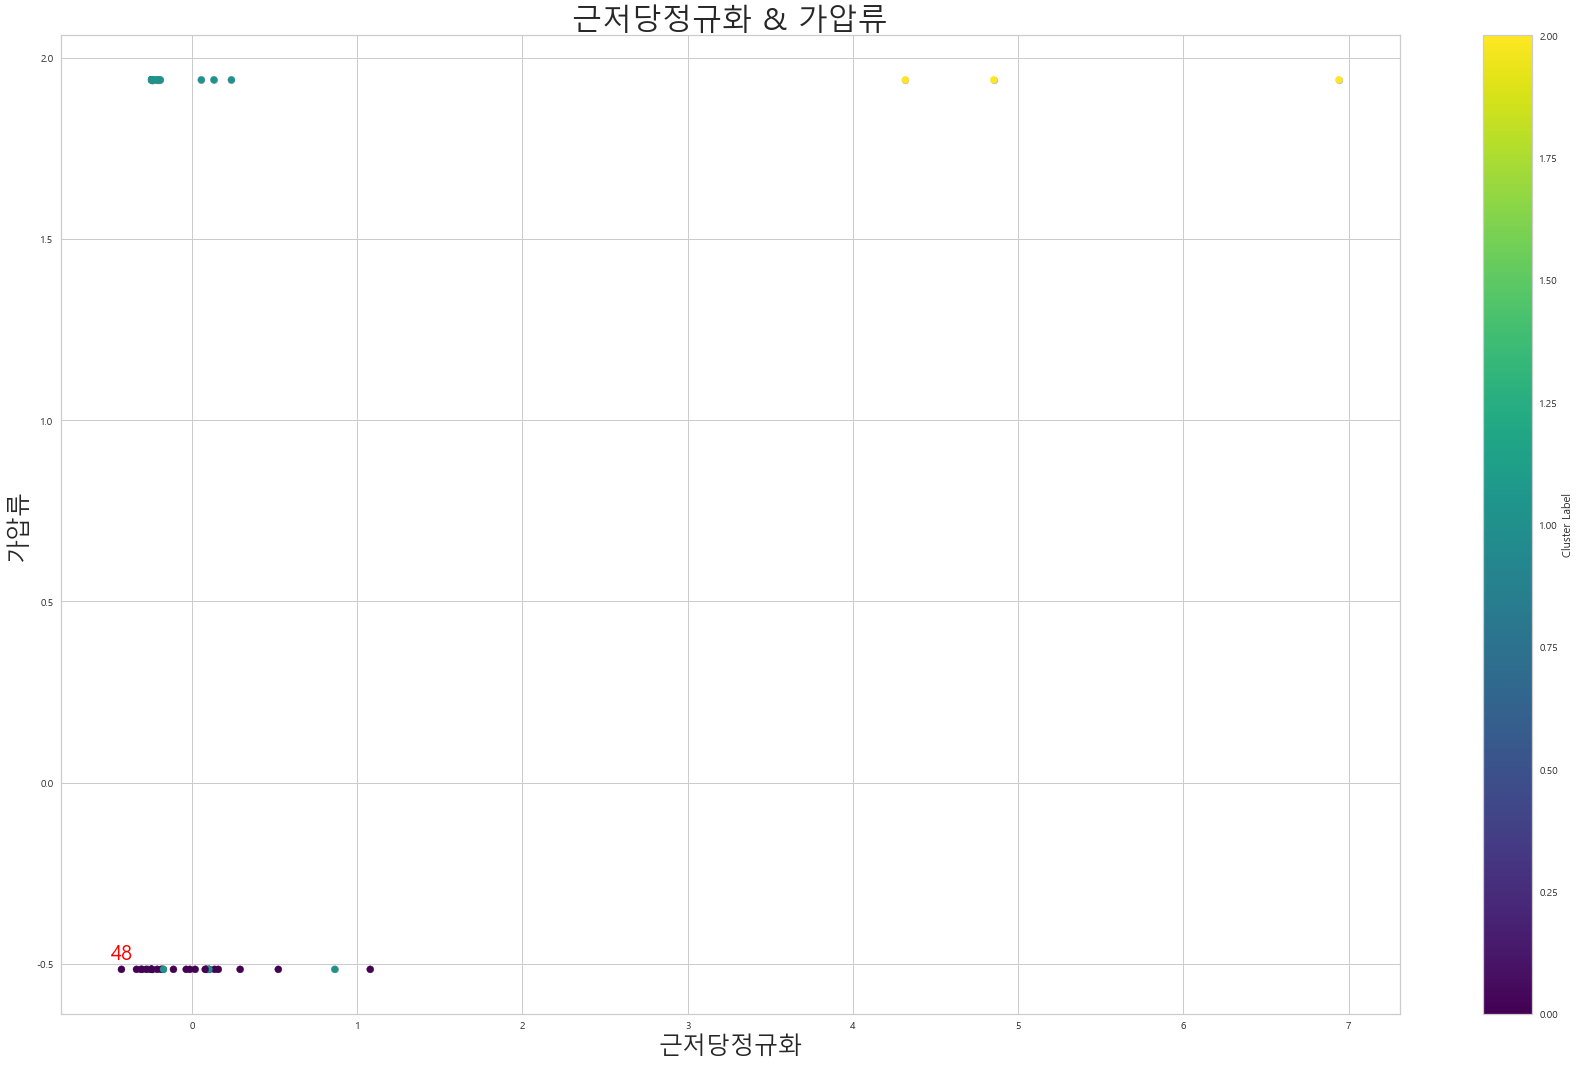

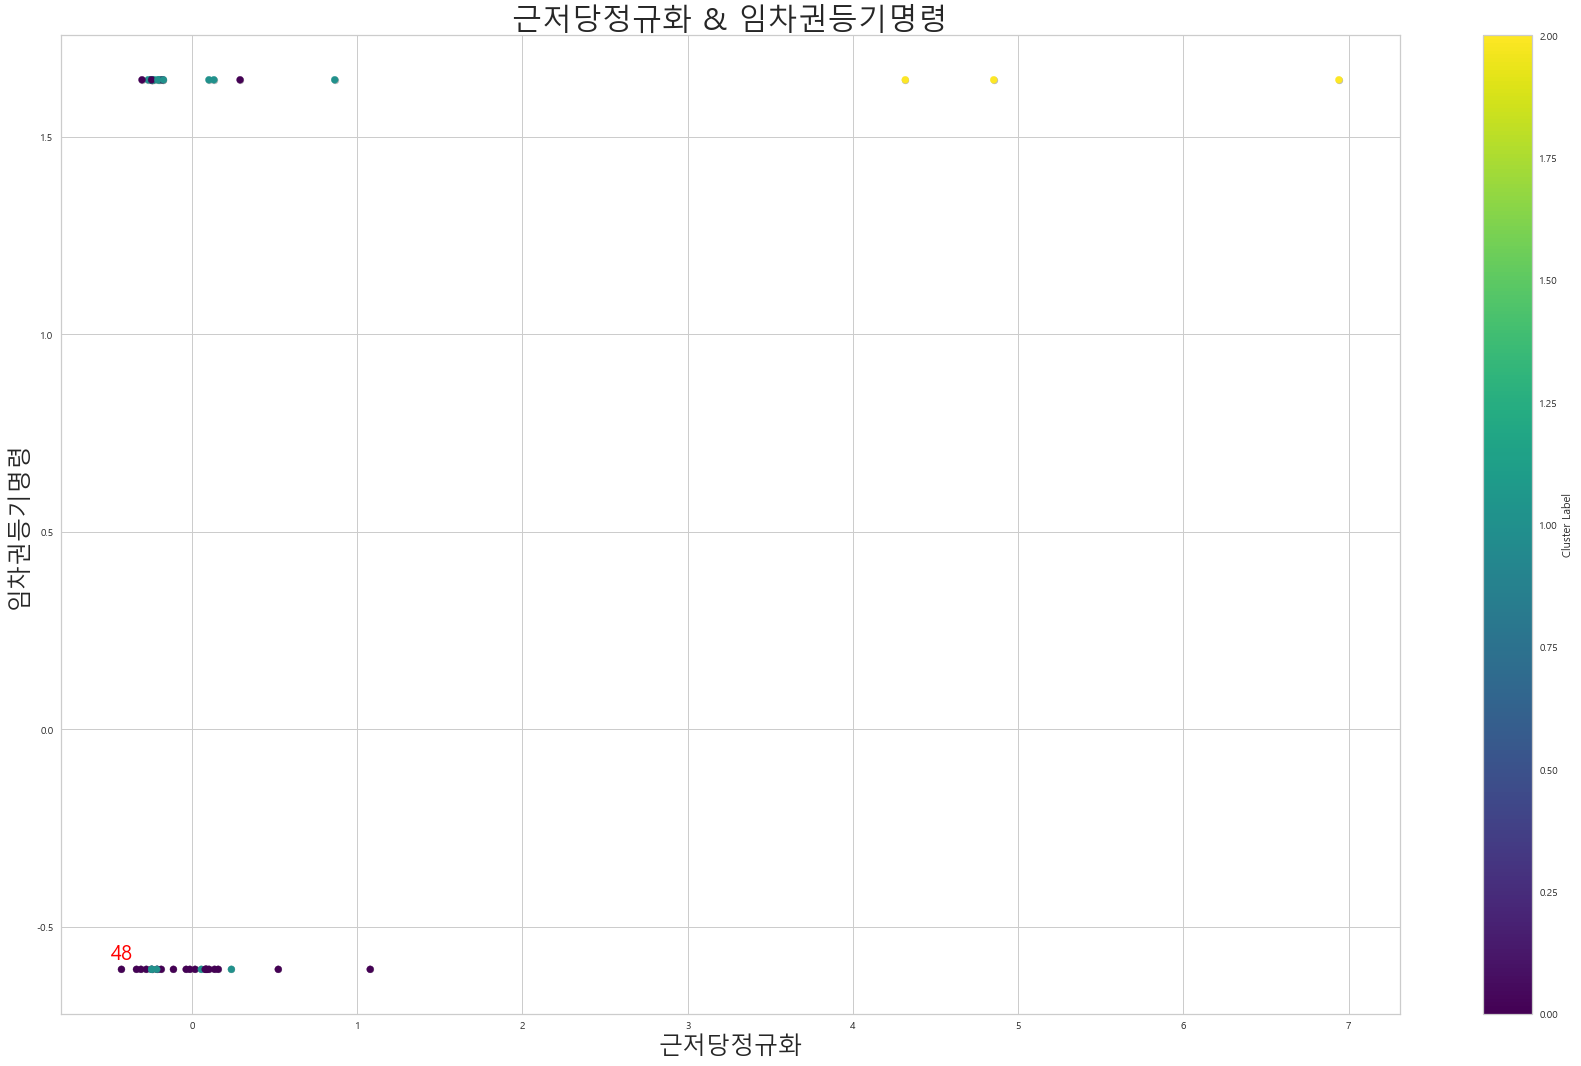

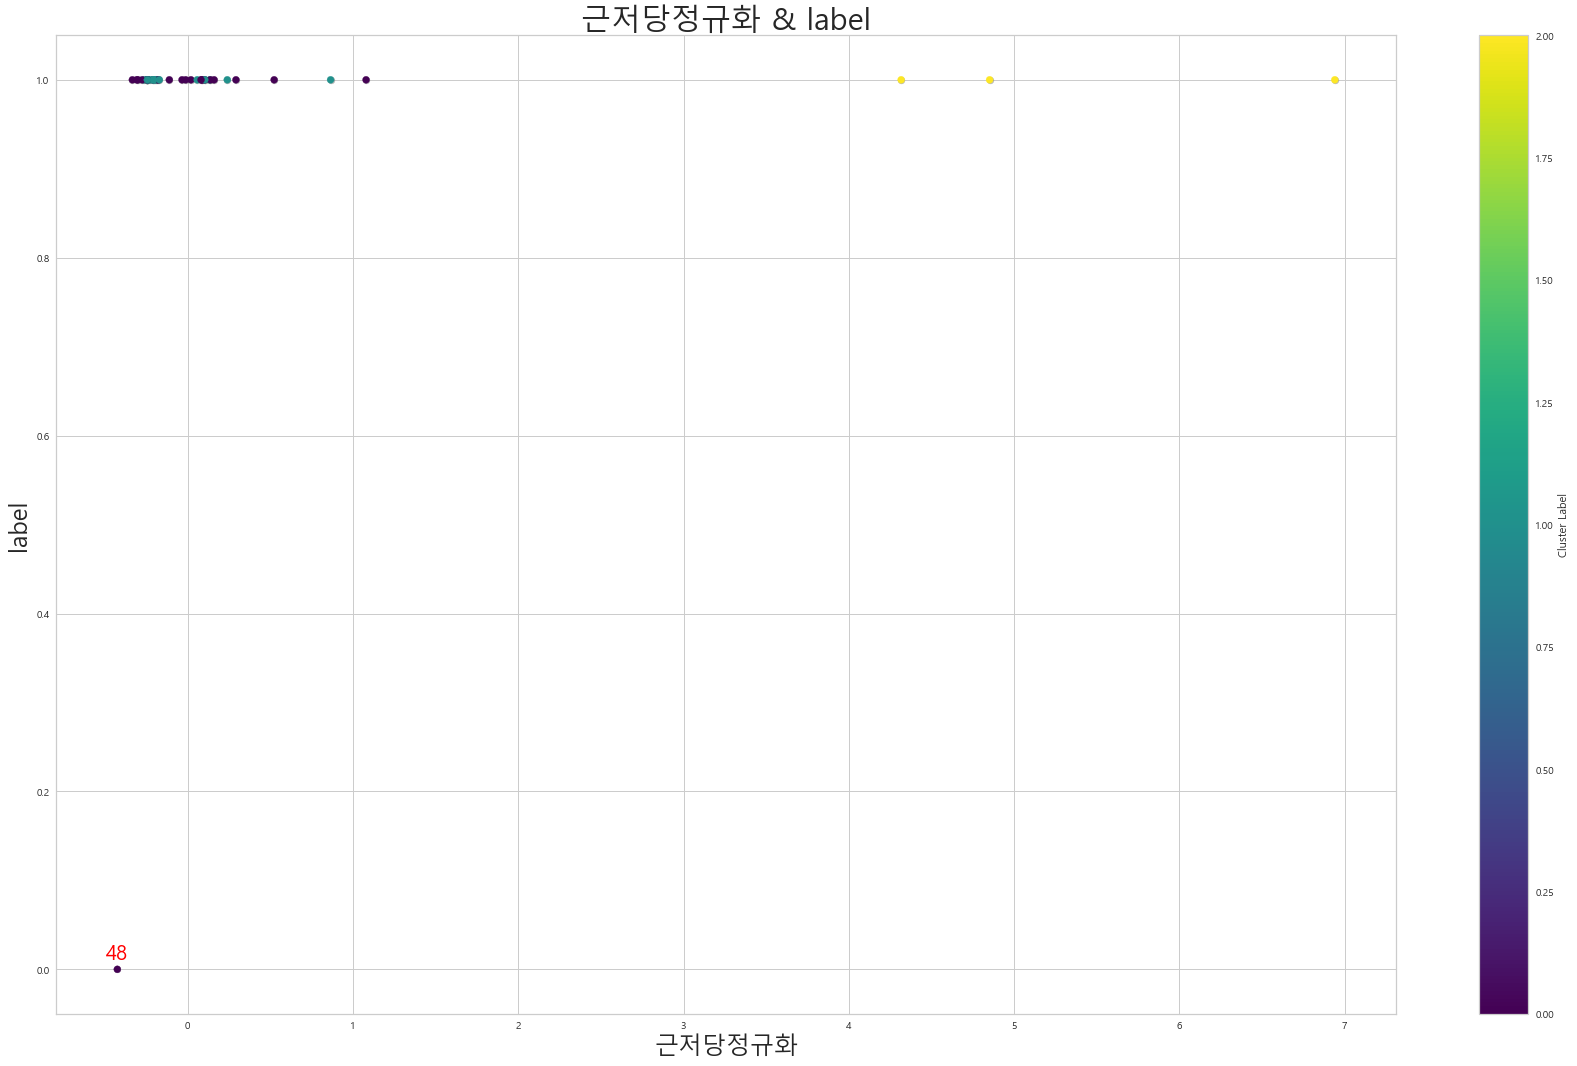

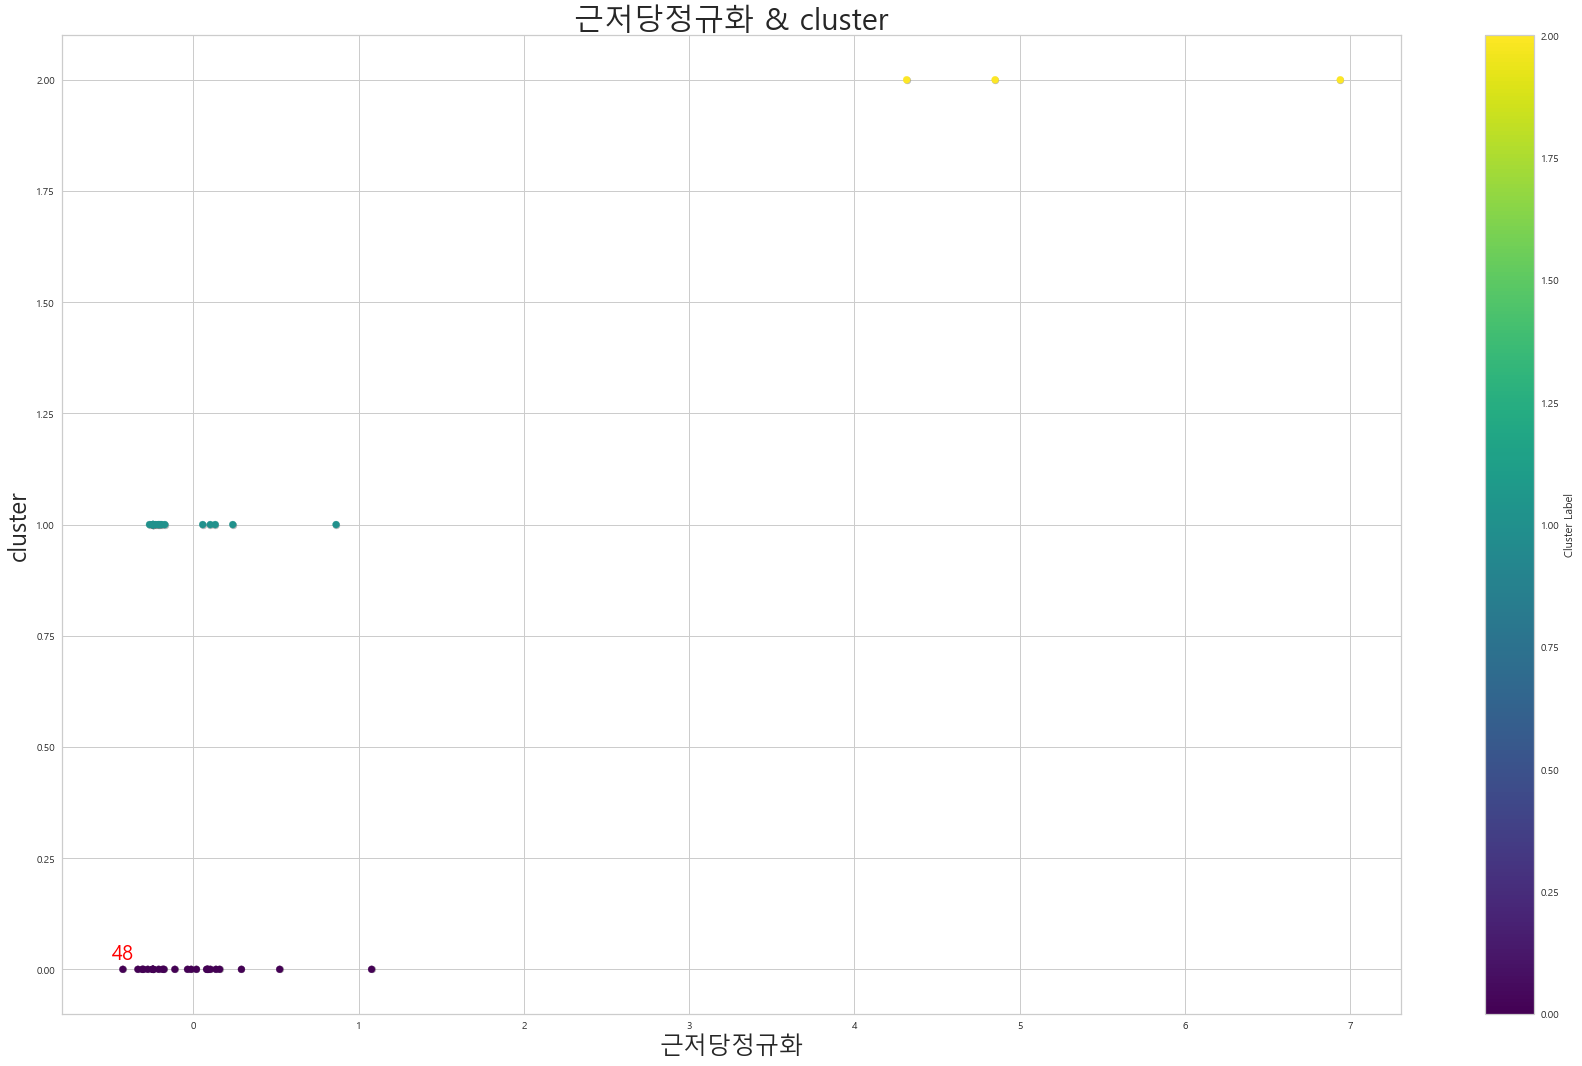

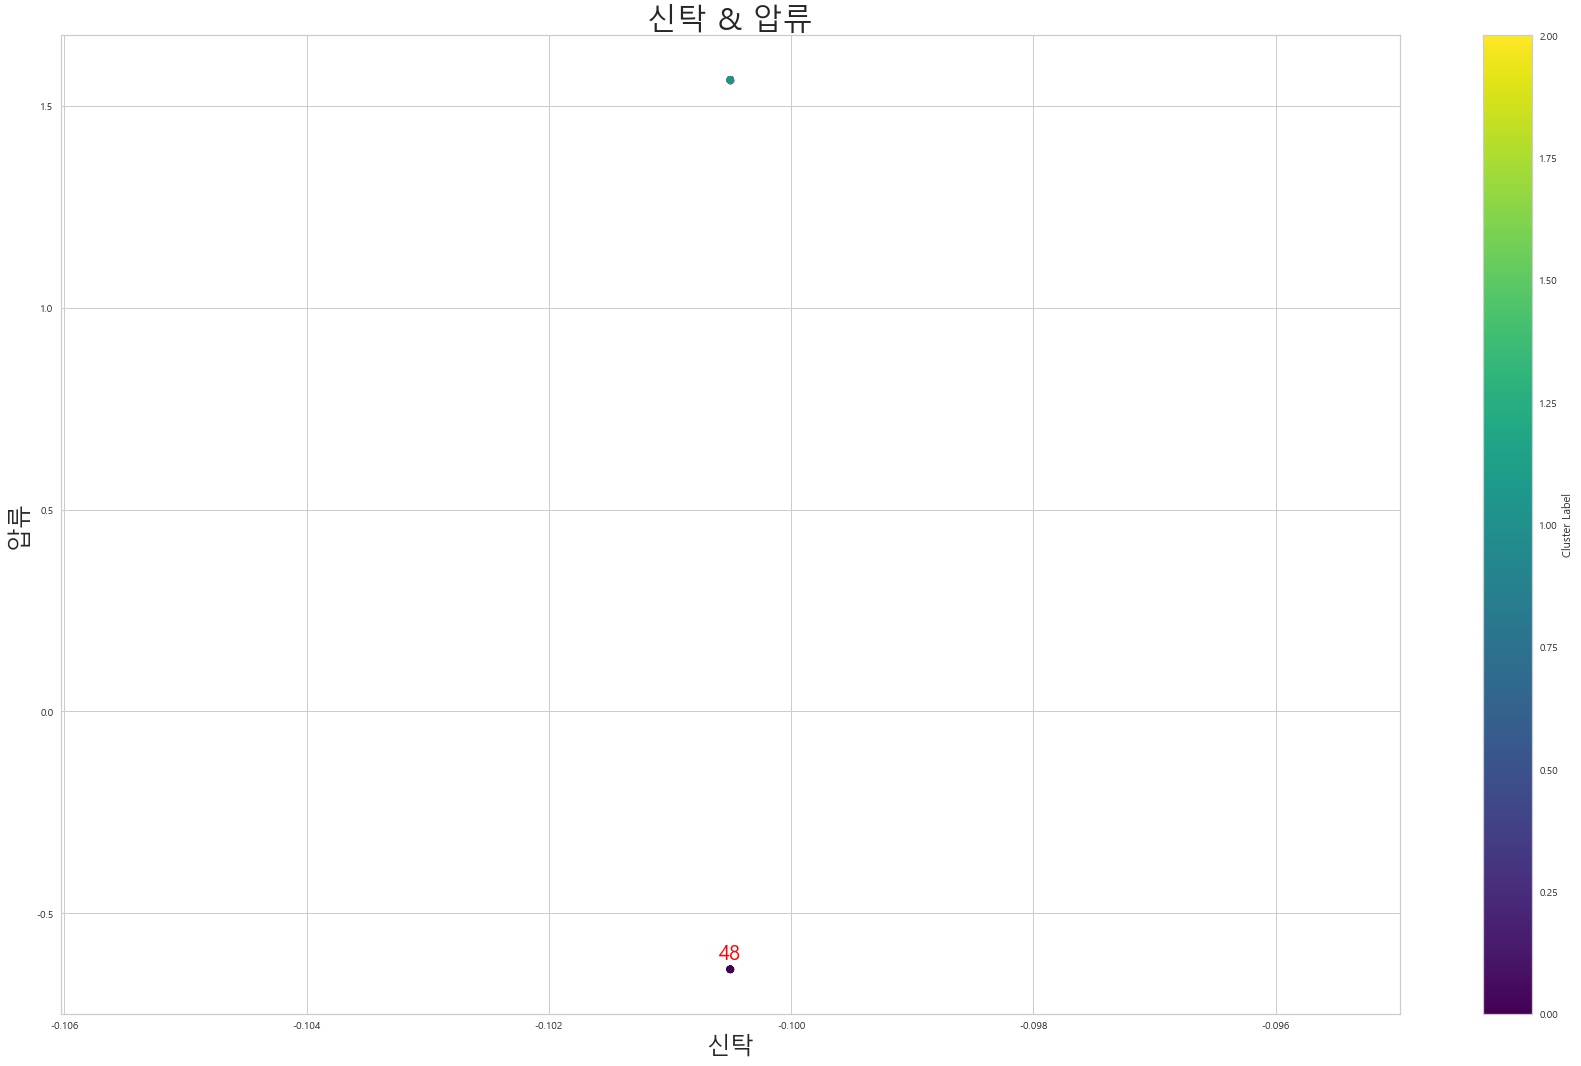

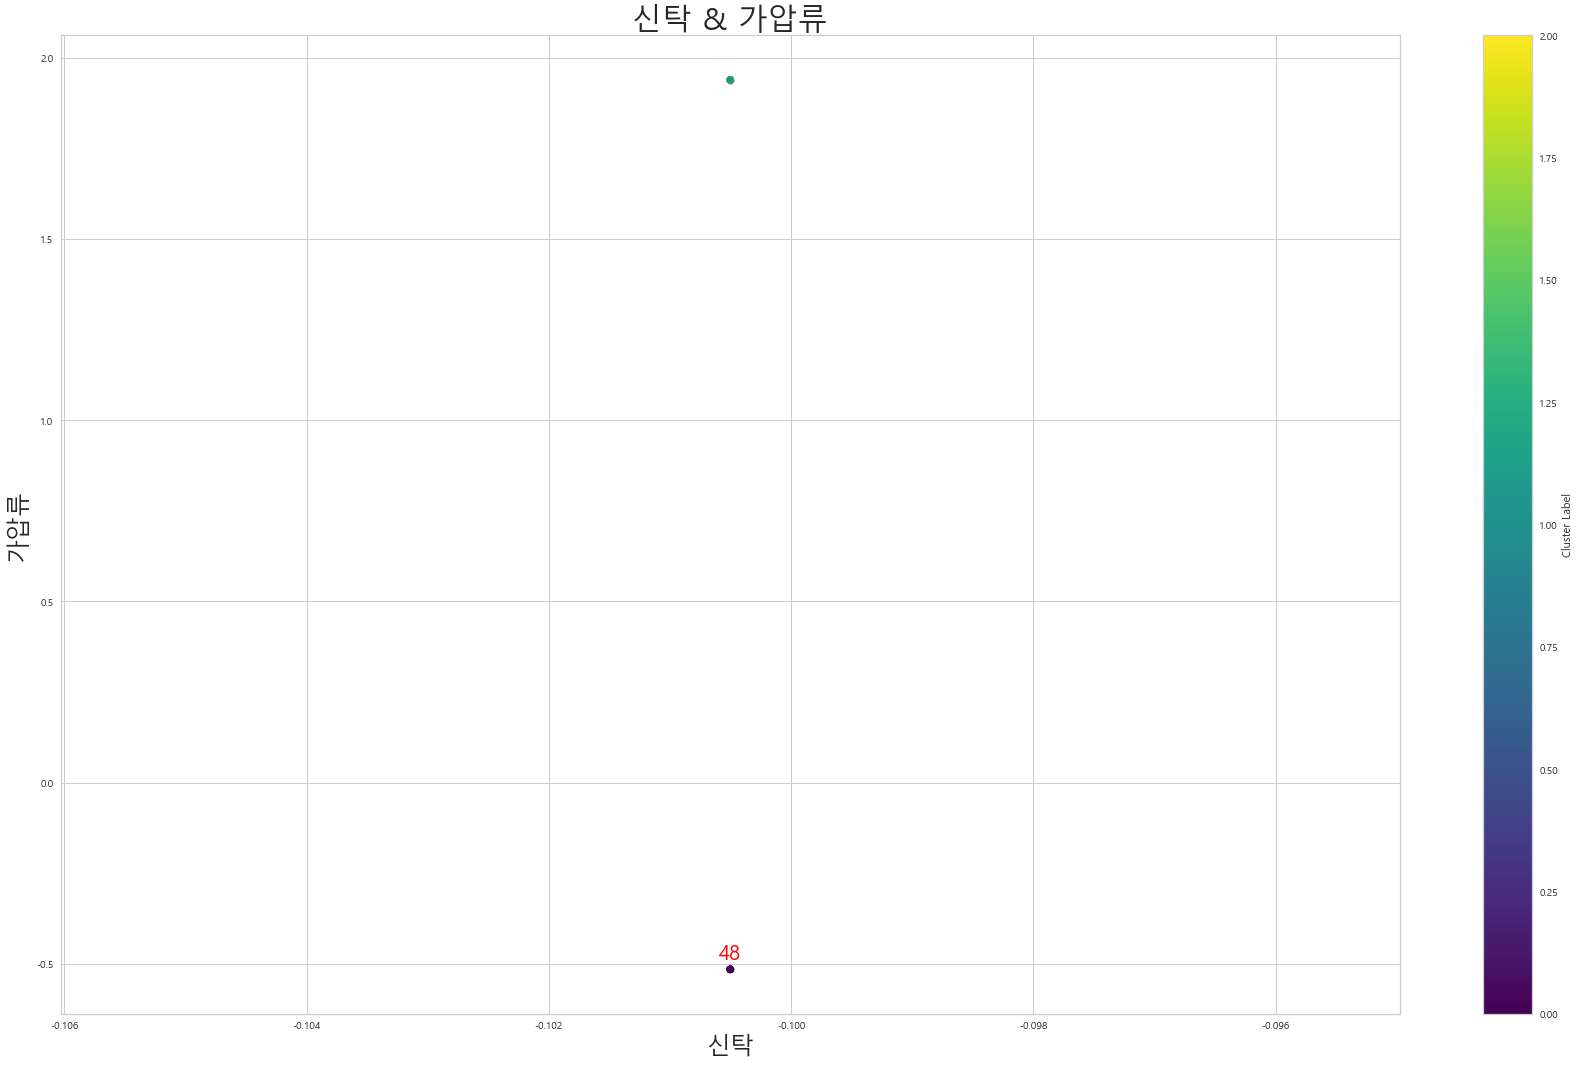

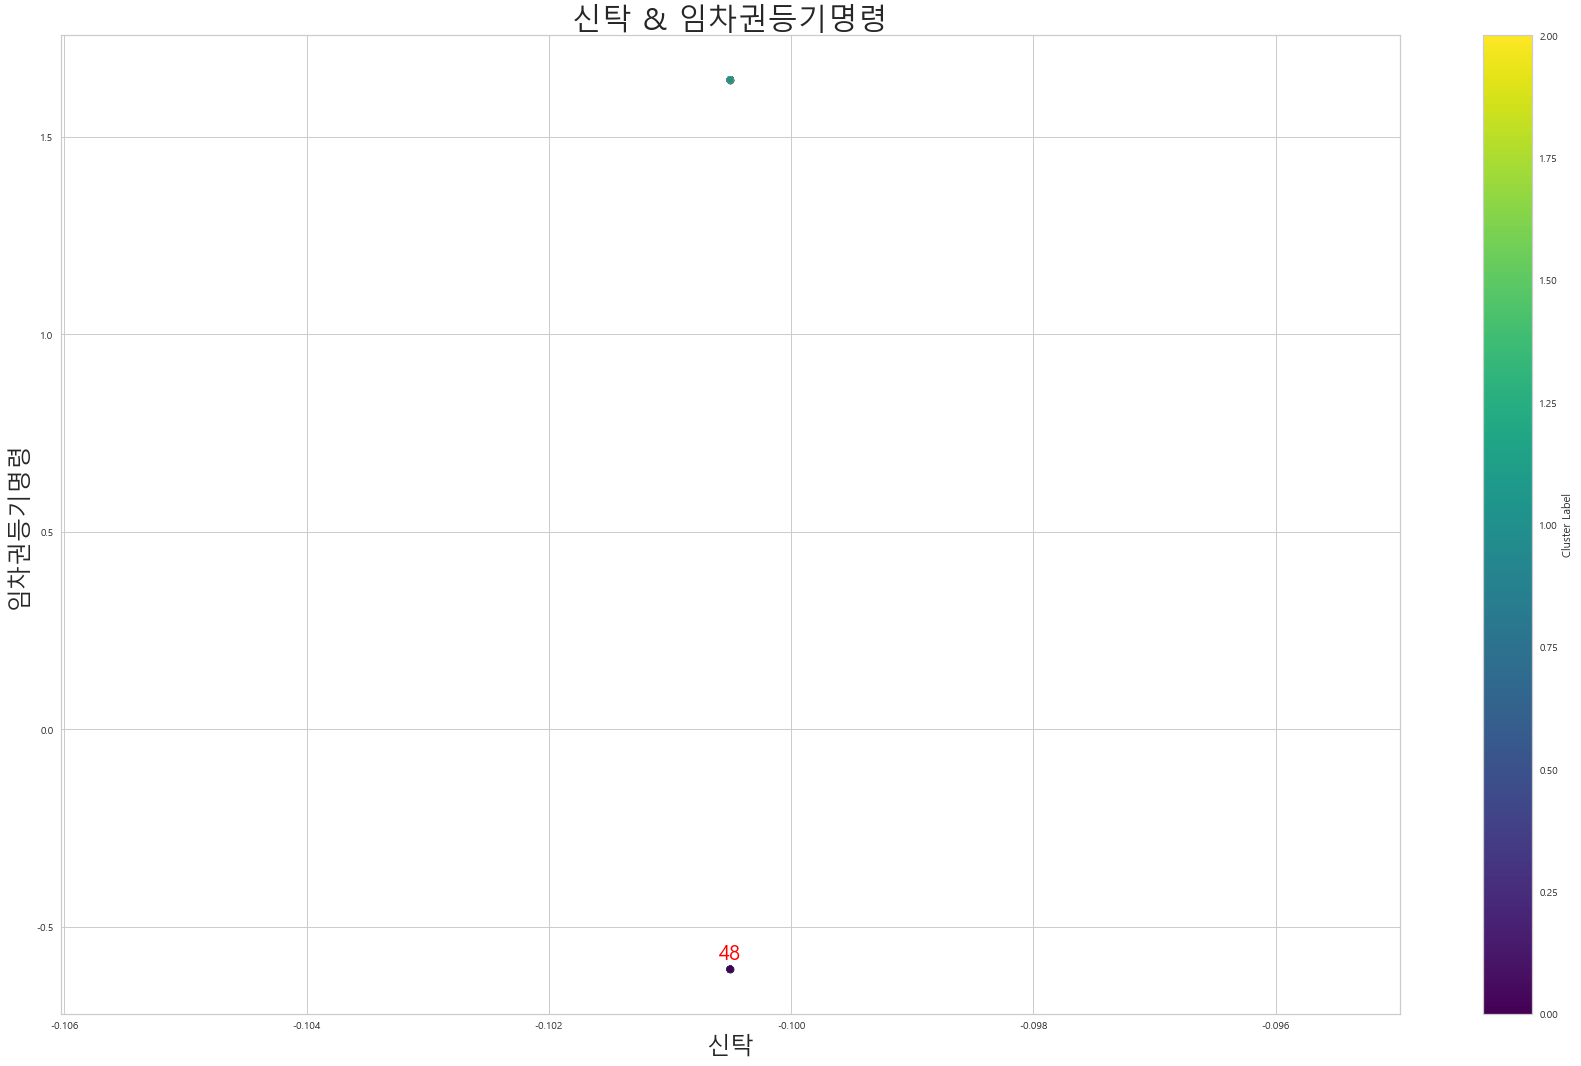

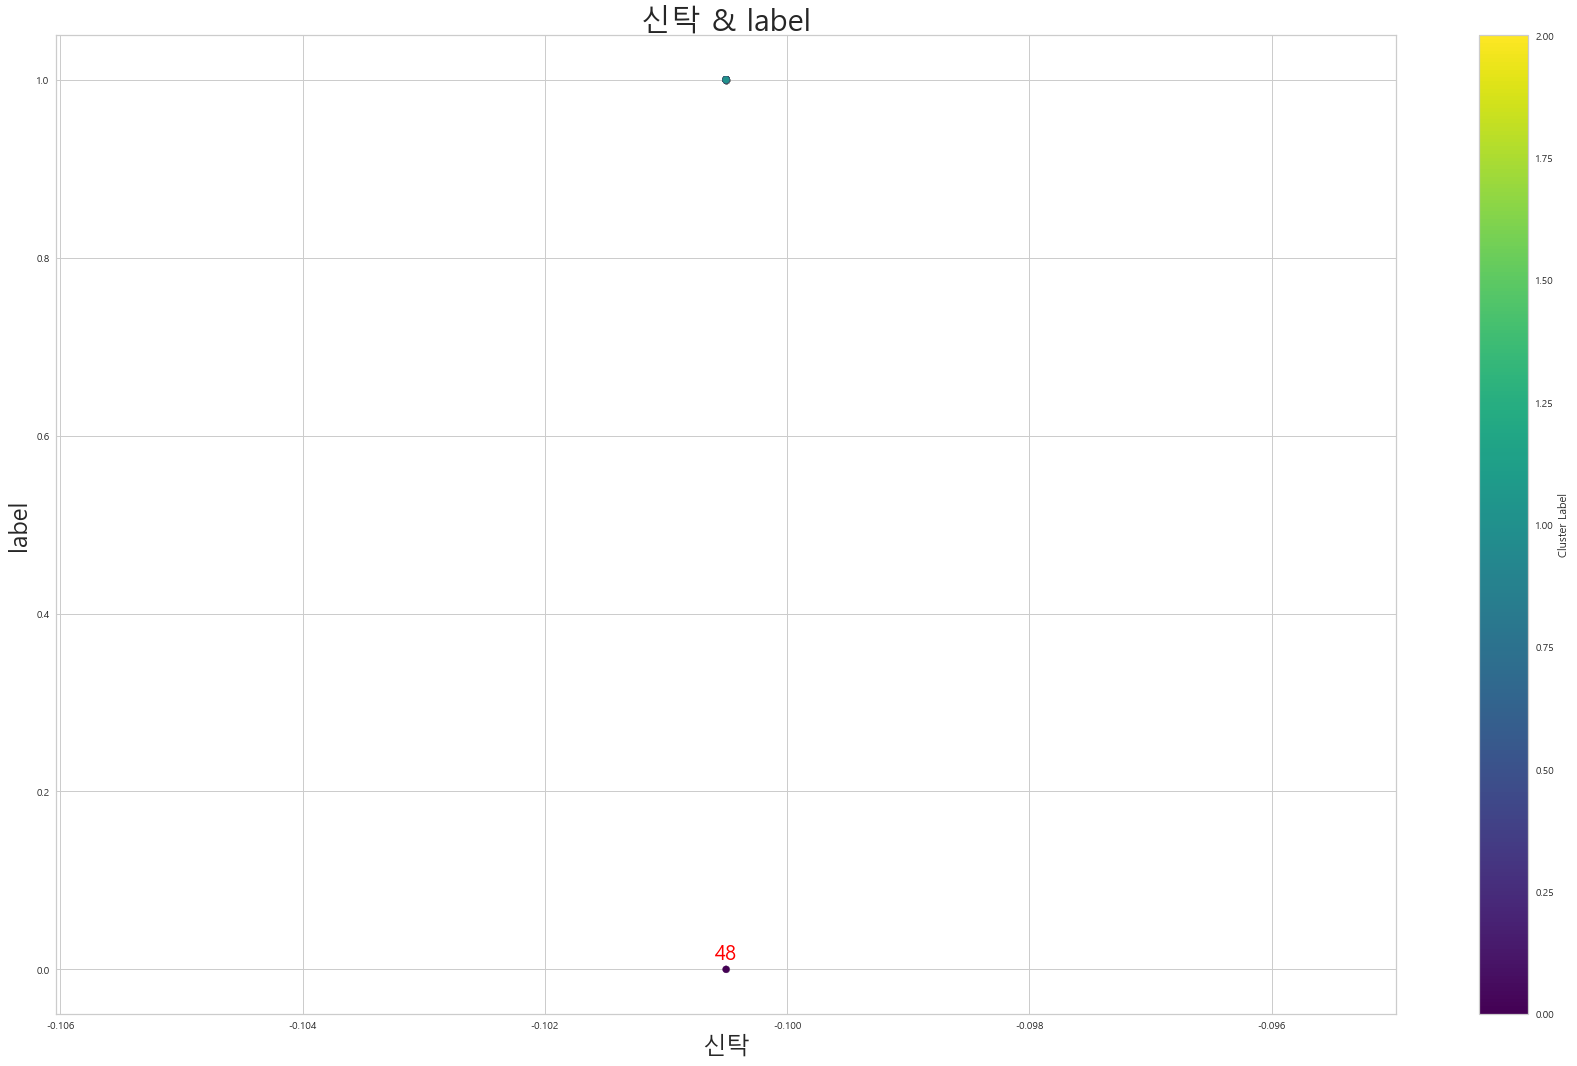

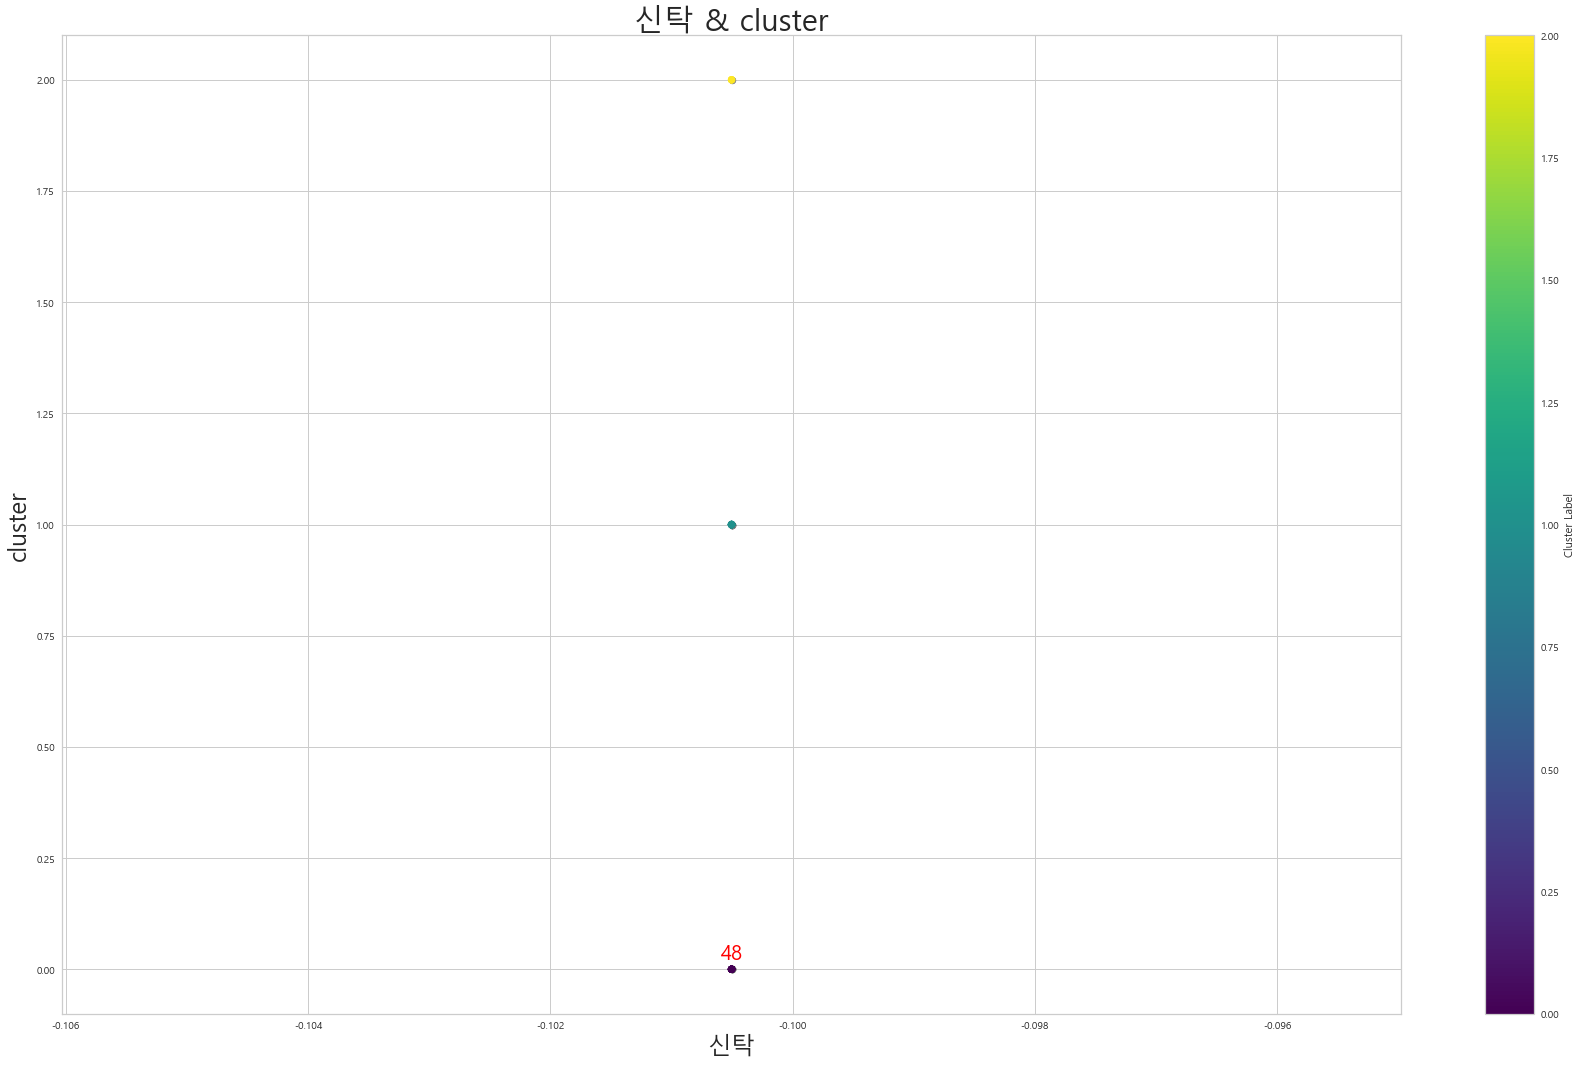

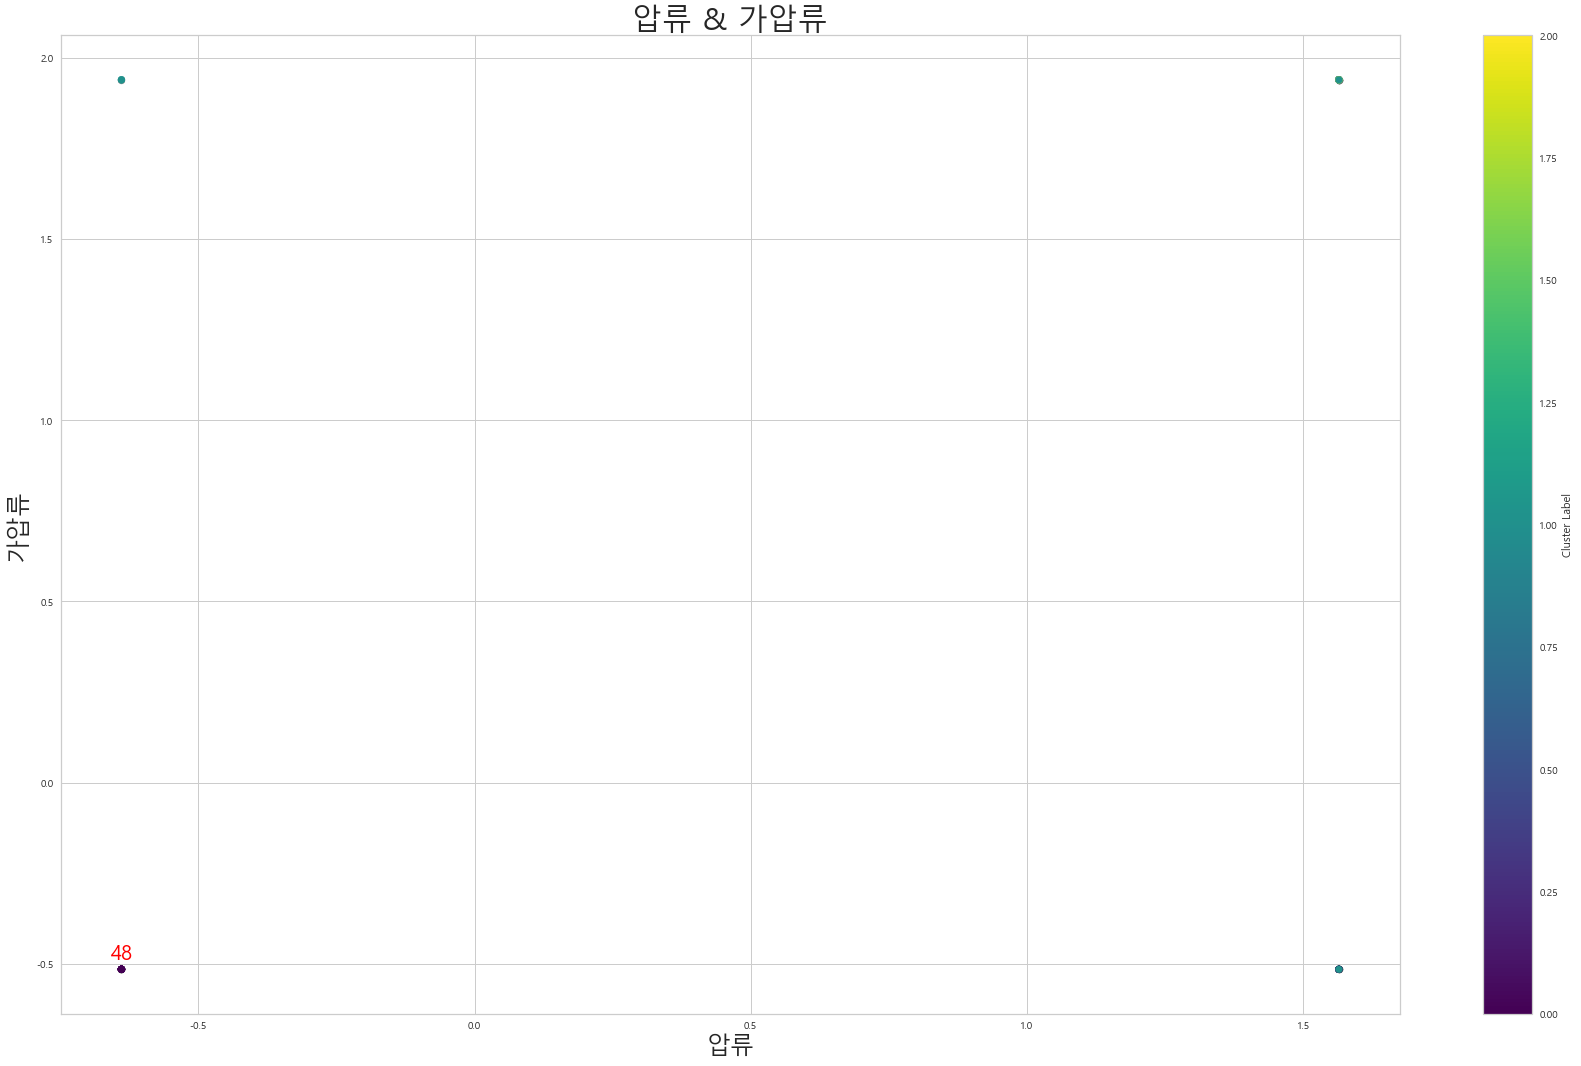

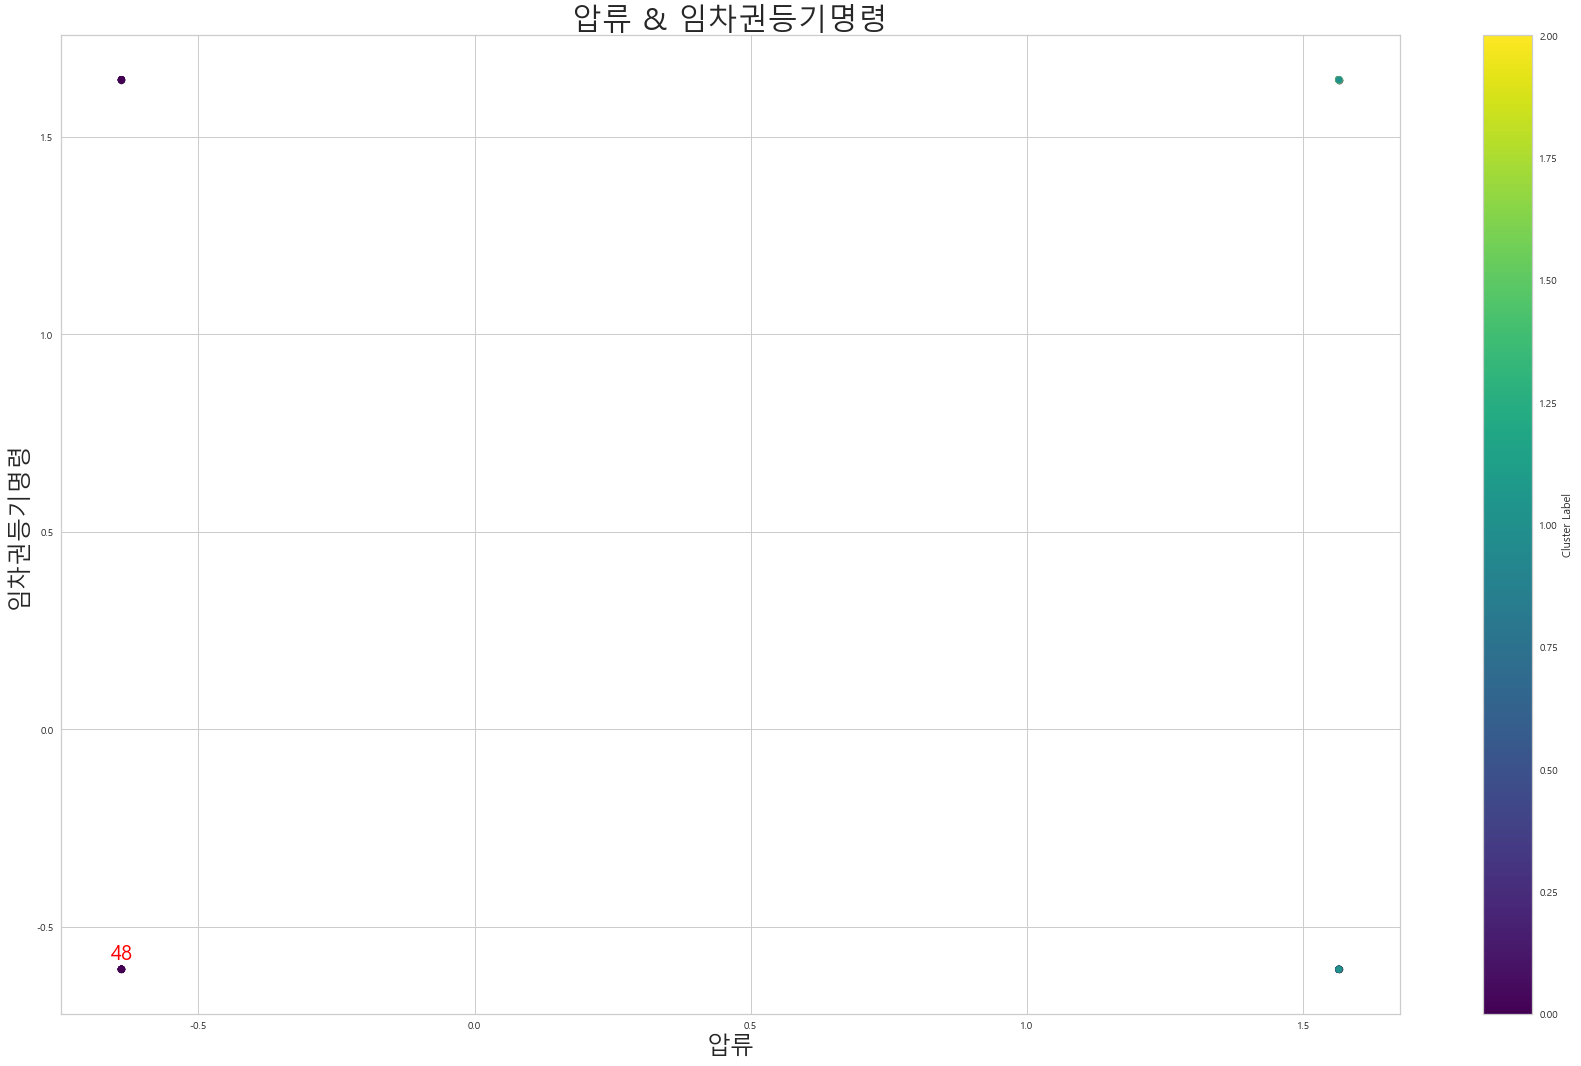

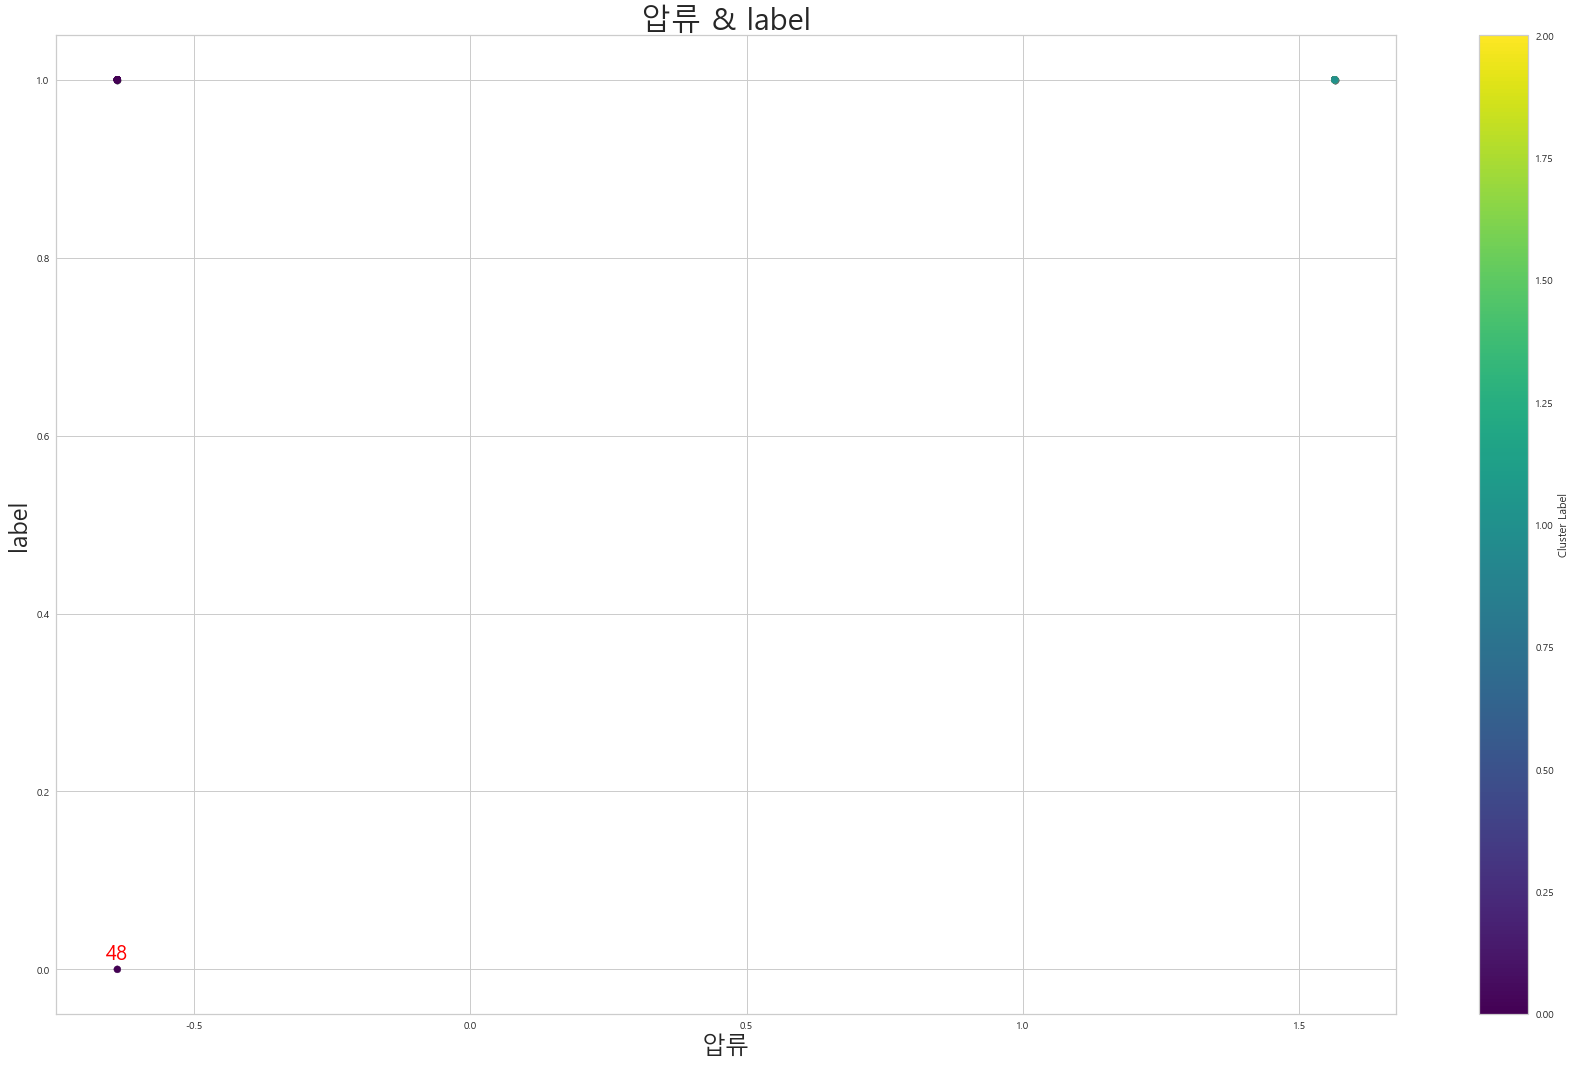

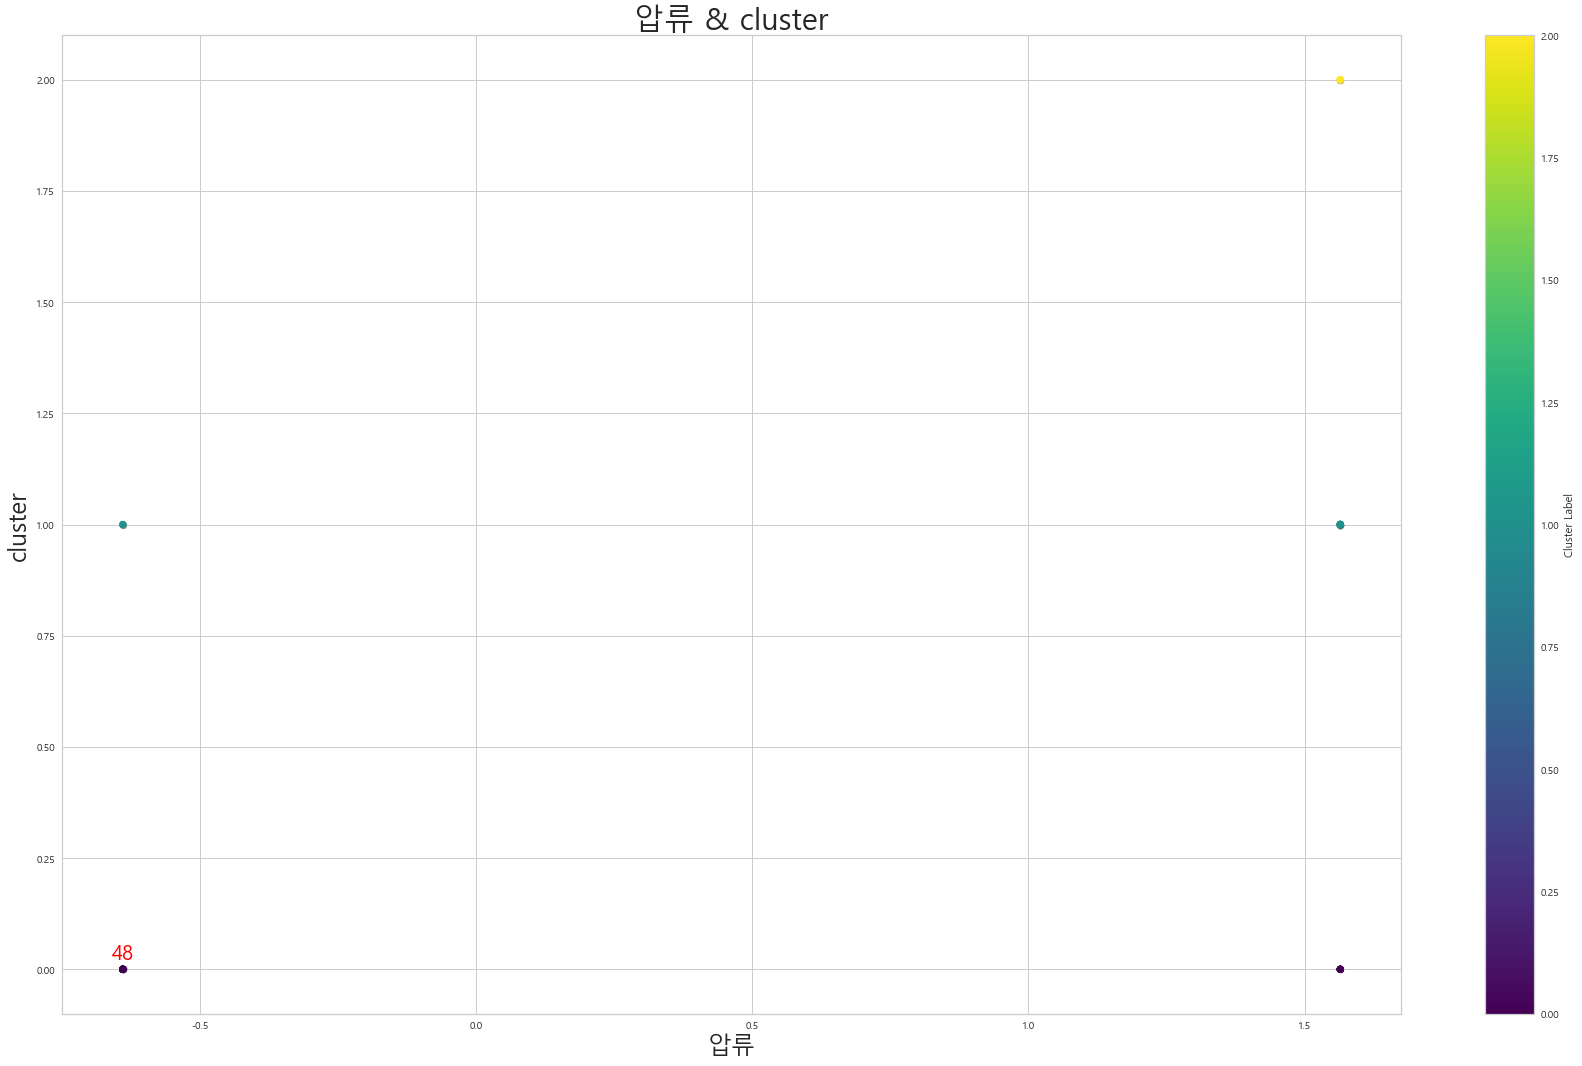

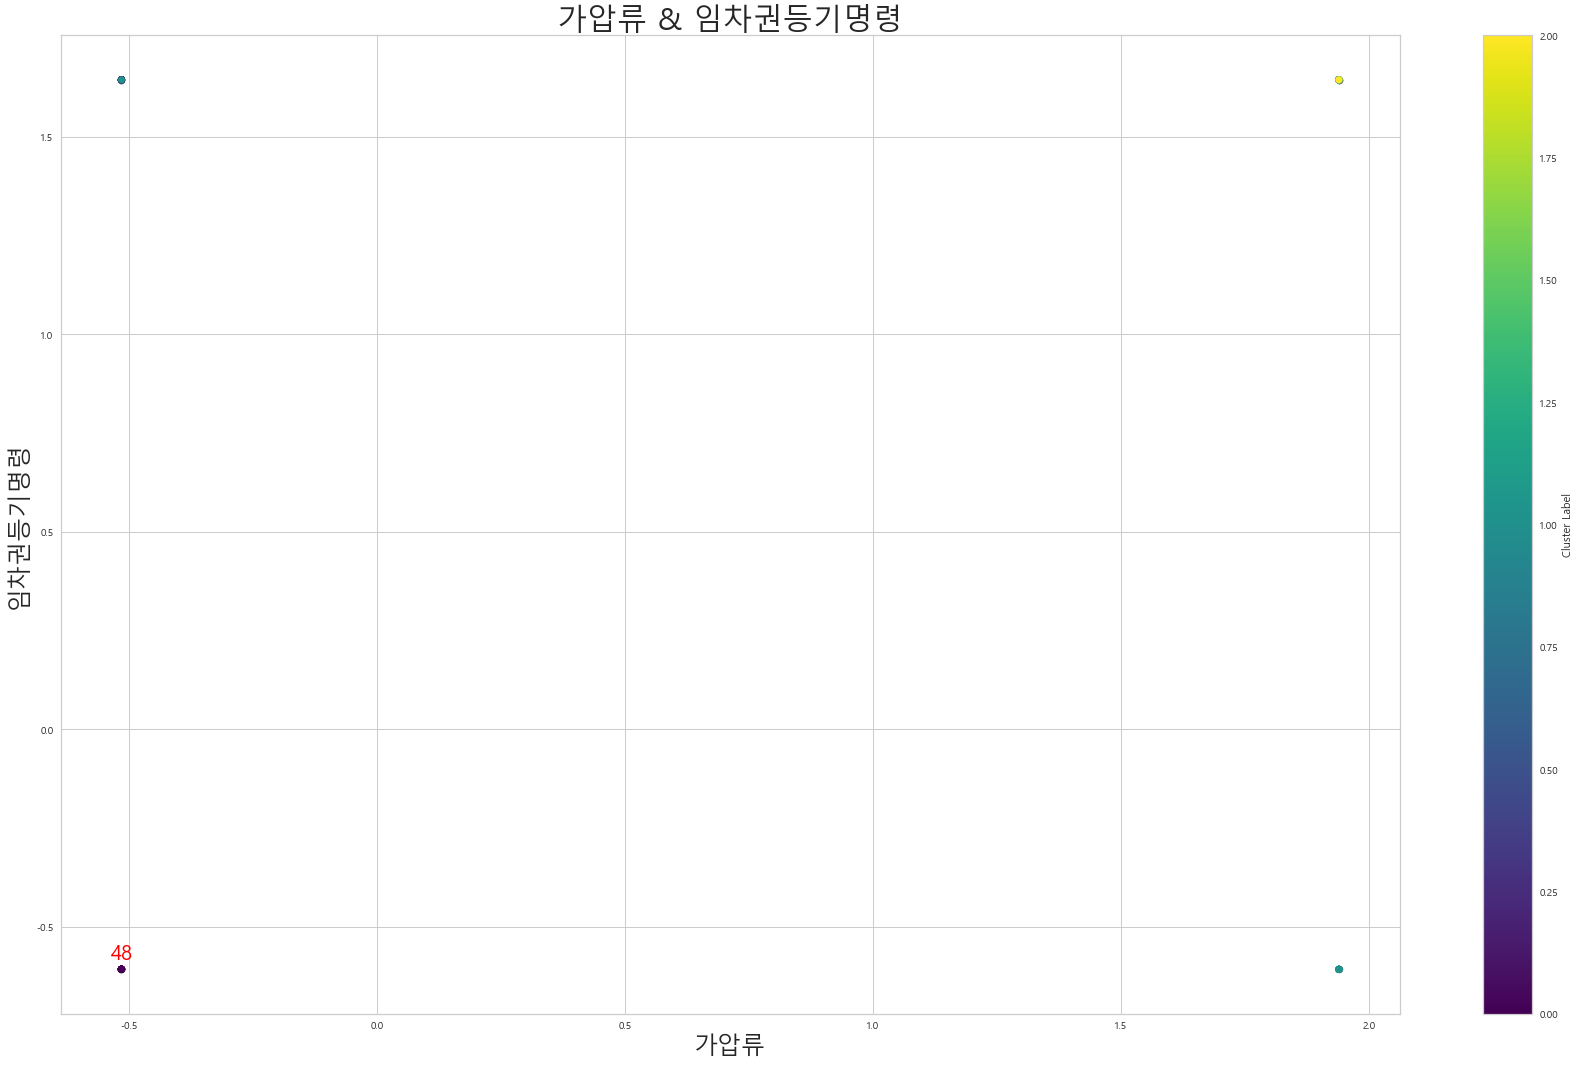

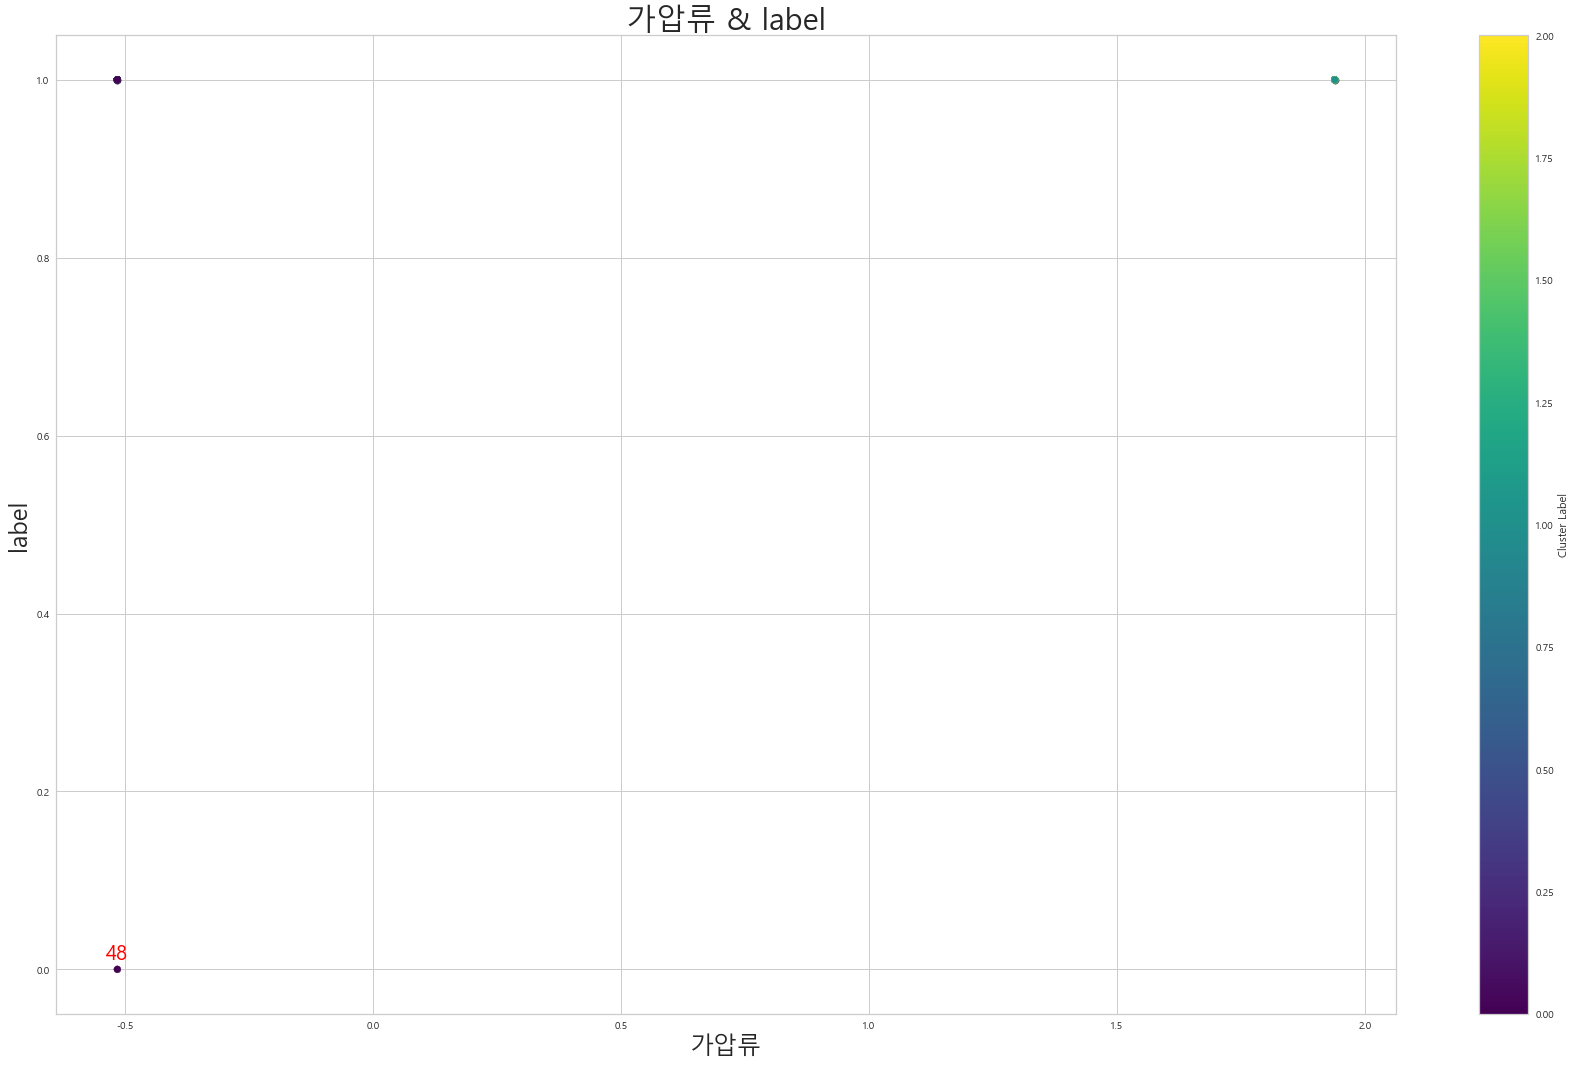

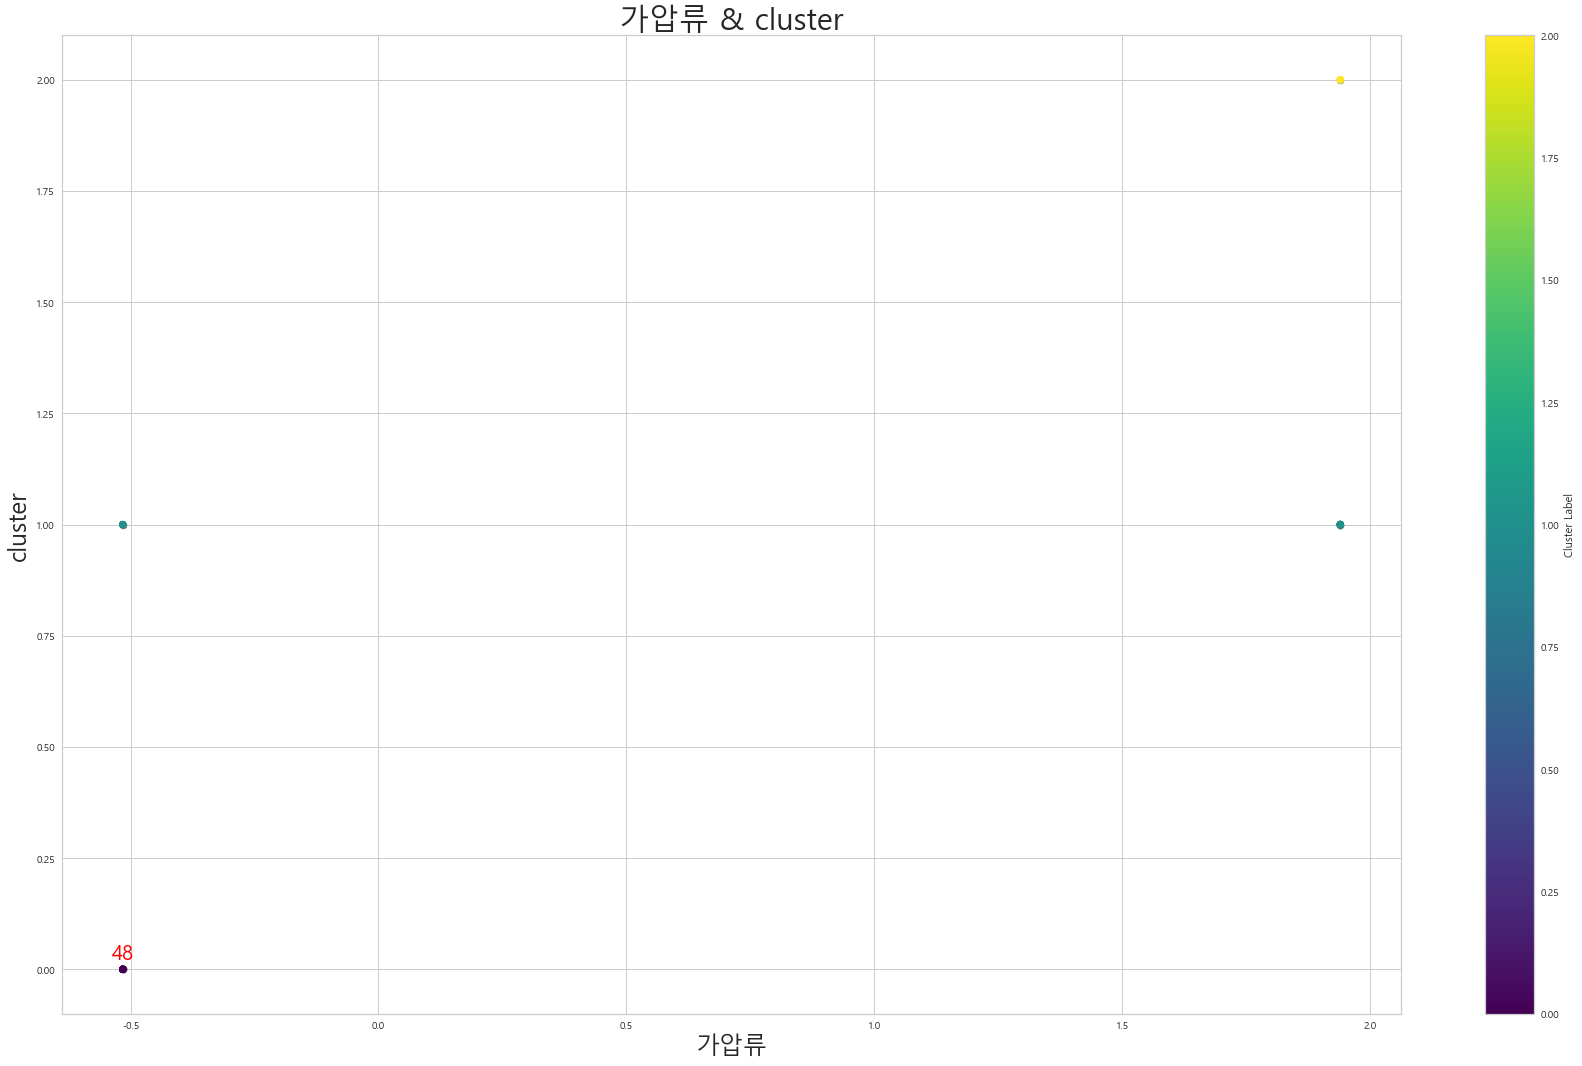

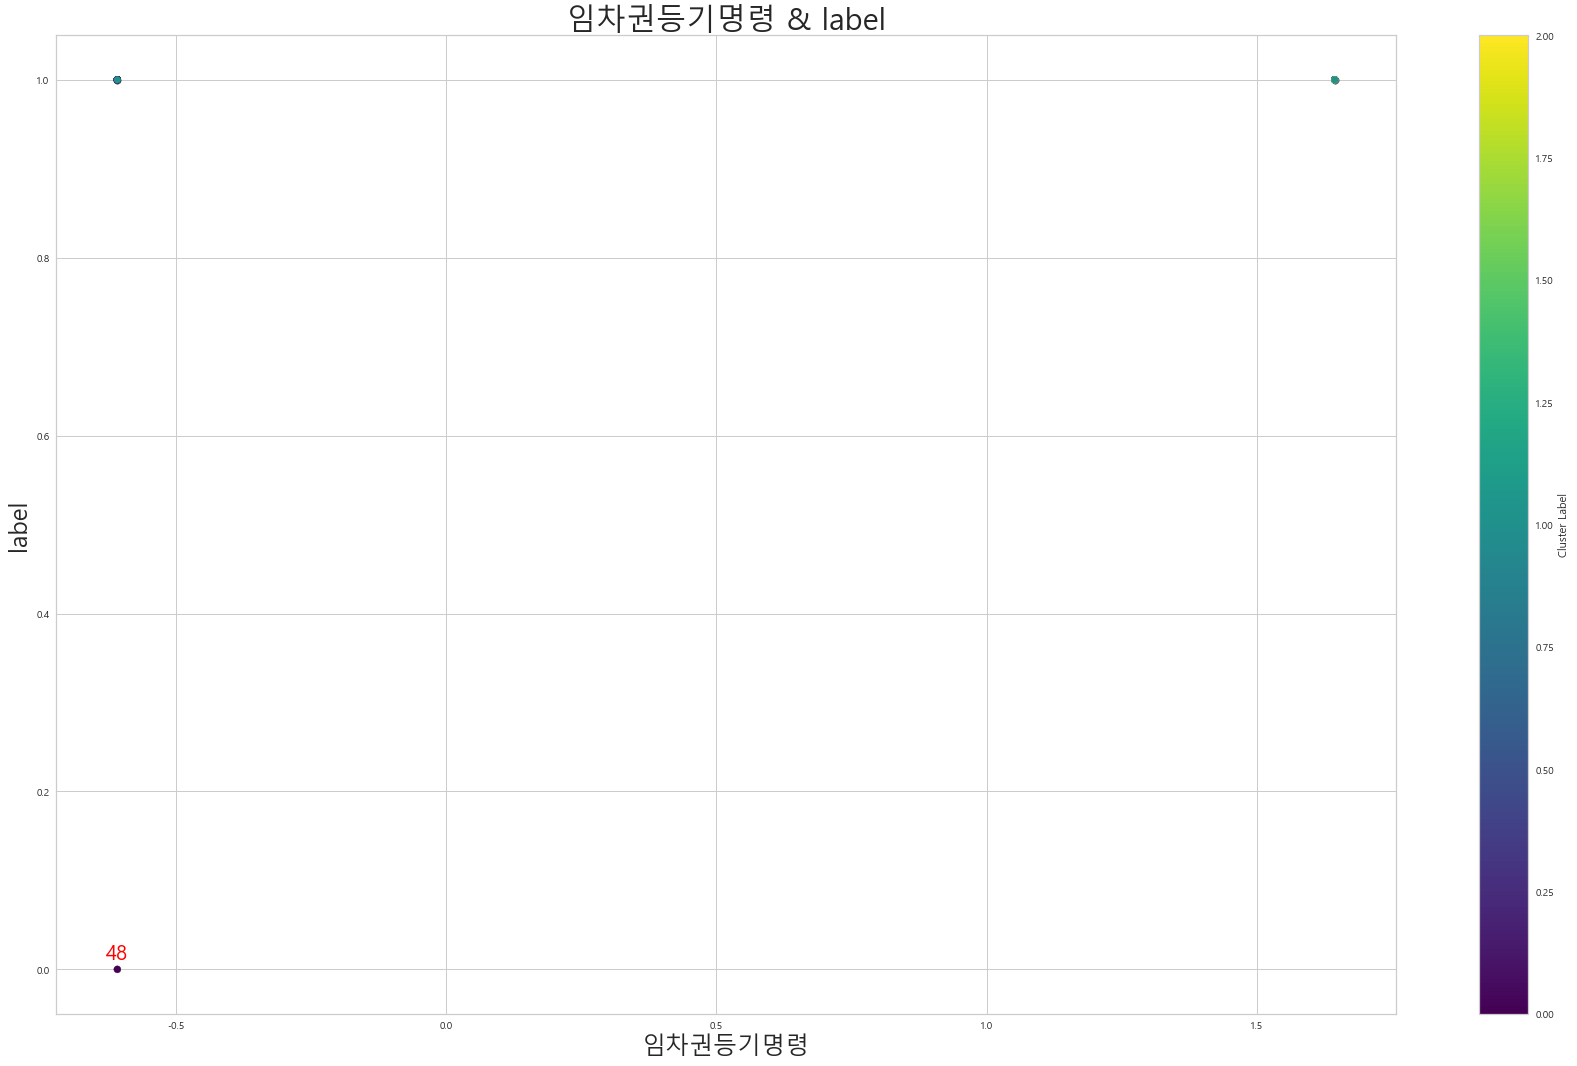

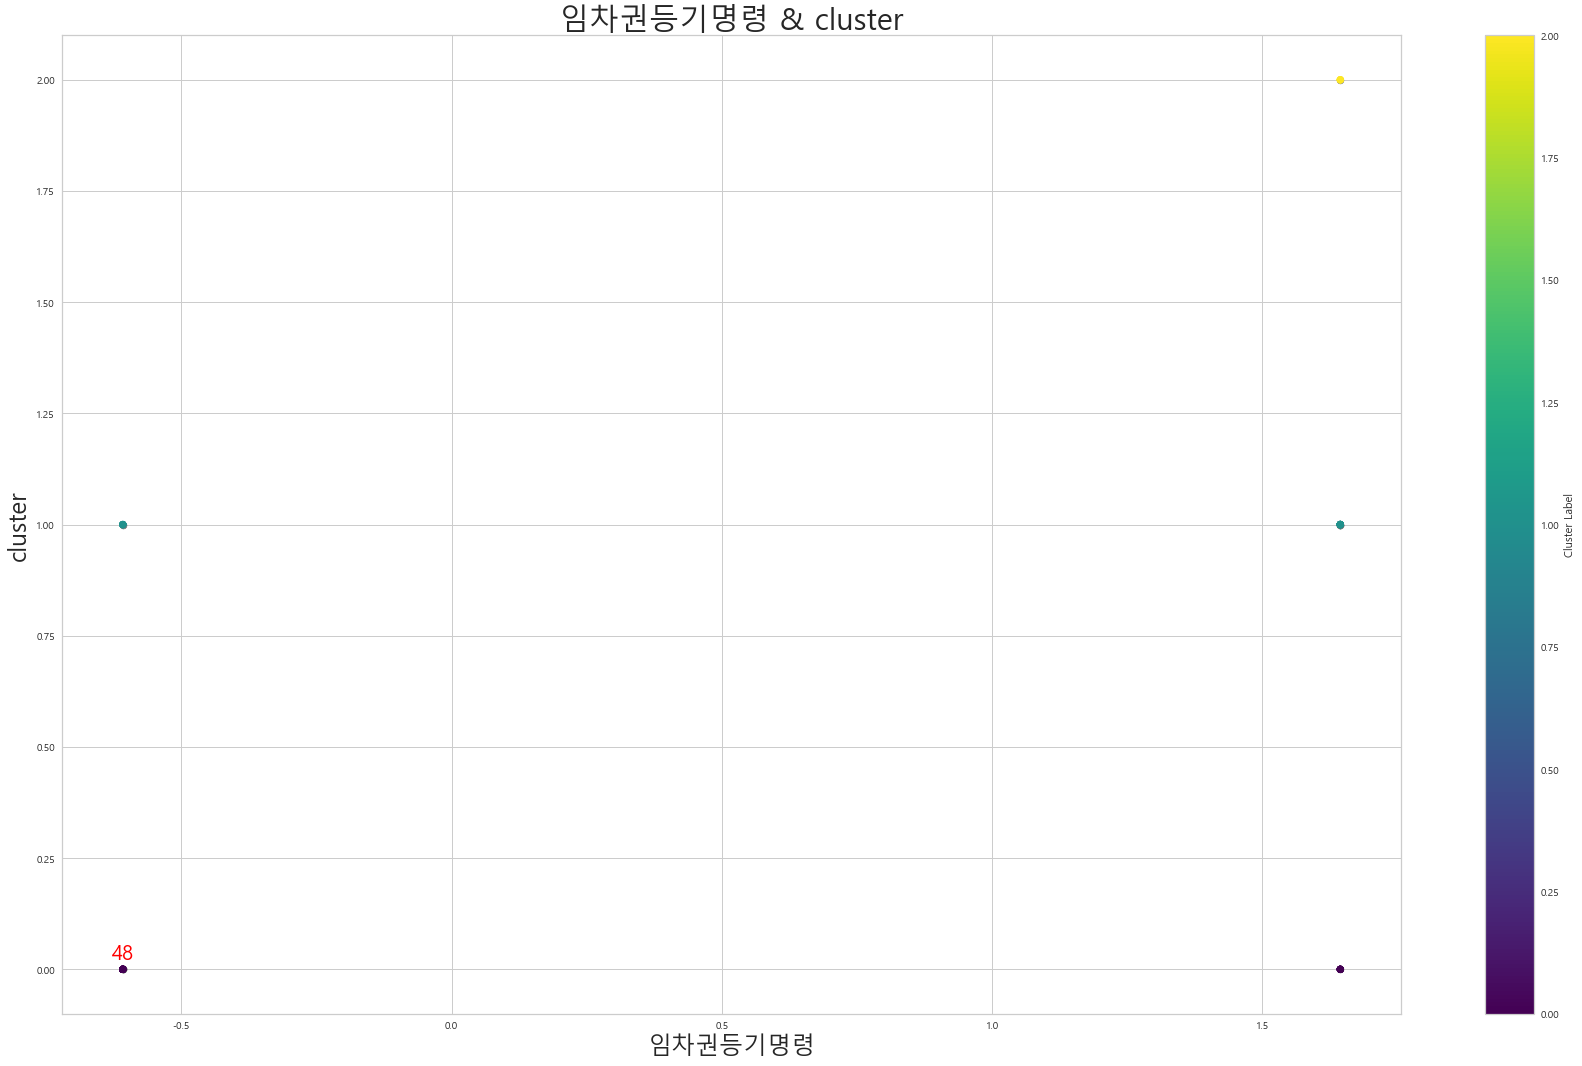

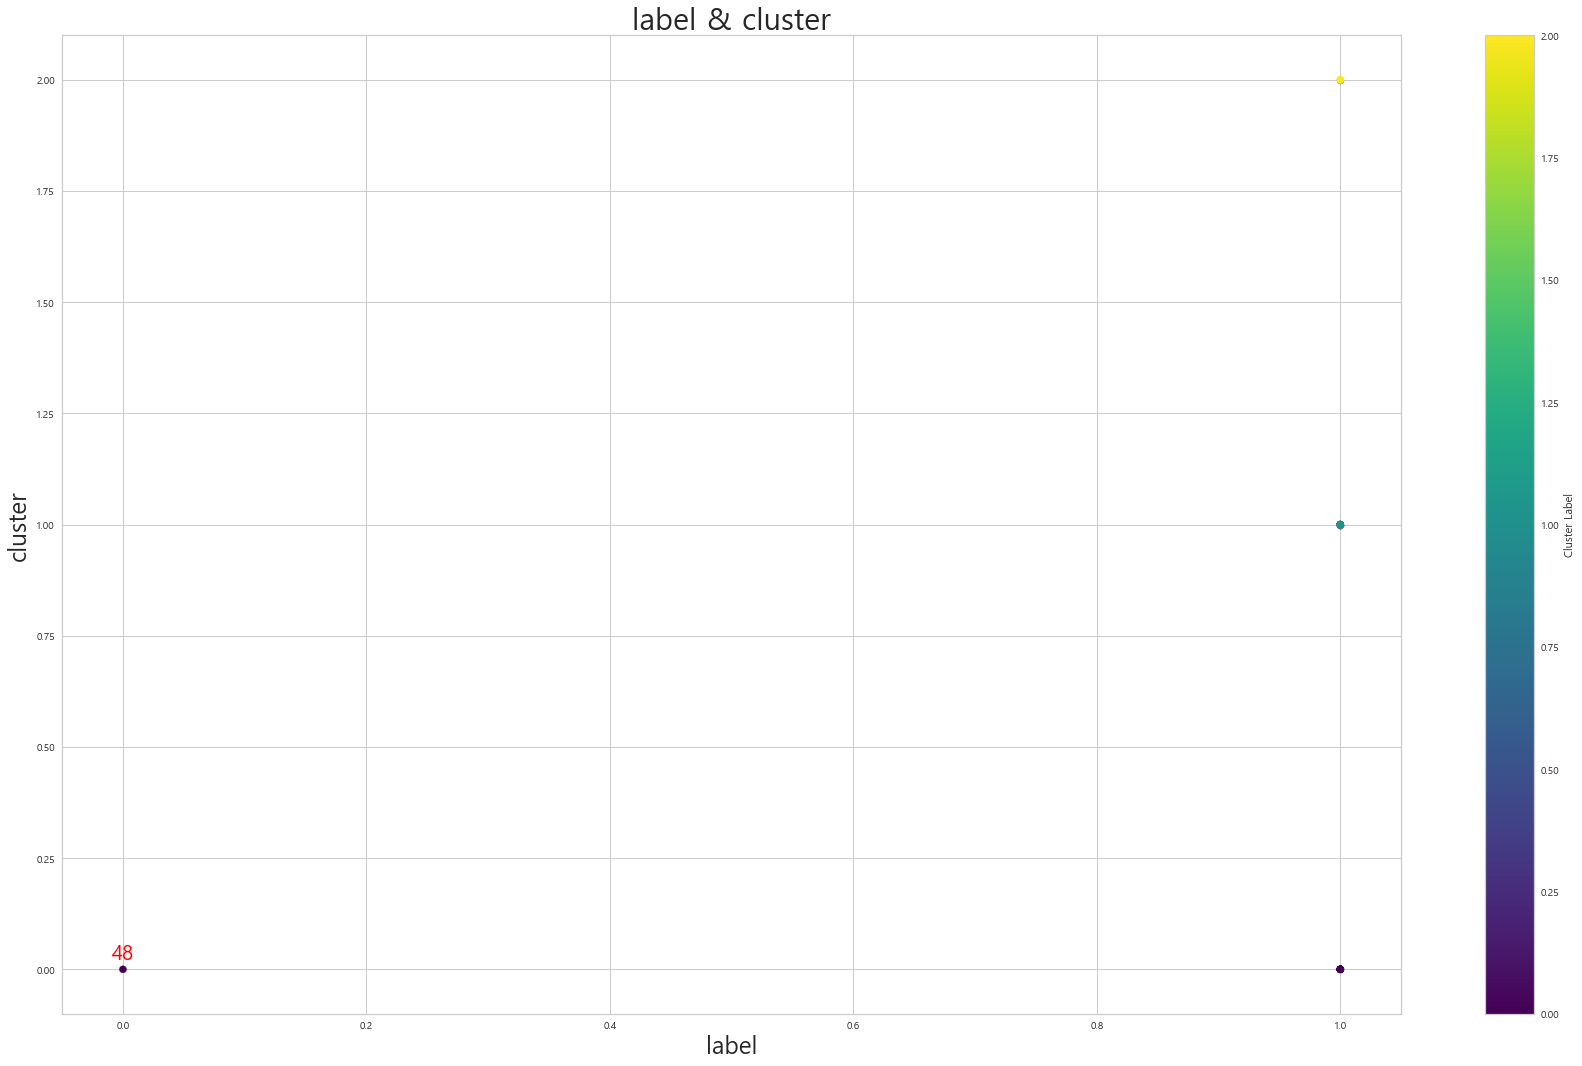

In [69]:
# 클러스터링 시각화 

variables = list(X_scaled_pred.columns)
index_to_highlight = len(X_scaled_pred) - 1

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.figure(figsize=(30, 18)) 
        plt.scatter(X_scaled_pred[variables[i]], X_scaled_pred[variables[j]], c='gray', alpha=0.5)
       
        # 축 설정 
        plt.xlabel(variables[i], fontsize=24) 
        plt.ylabel(variables[j], fontsize=24)  
        
        # 제목 설정
        plt.title(f'{variables[i]} & {variables[j]}', fontsize=30)  
        
        # 각 데이터포인트의 인덱스 표시
        for idx, (x, y) in enumerate(zip(X_scaled_pred[variables[i]], X_scaled_pred[variables[j]])):
            if idx == index_to_highlight:  # 지정한 인덱스(새로운 데이터 (from 크롤링, ocr ))만 표시
                plt.annotate(str(idx), (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color='red')
        
        
        # K-means 클러스터링 결과 그래프로 보여주기 
        plt.scatter(X_scaled_pred[variables[i]], X_scaled_pred[variables[j]], c = X_scaled_pred['cluster'], cmap='viridis', marker='o')
        plt.colorbar(label='Cluster Label')
        plt.rc("font", family = "Malgun Gothic")
        plt.show()

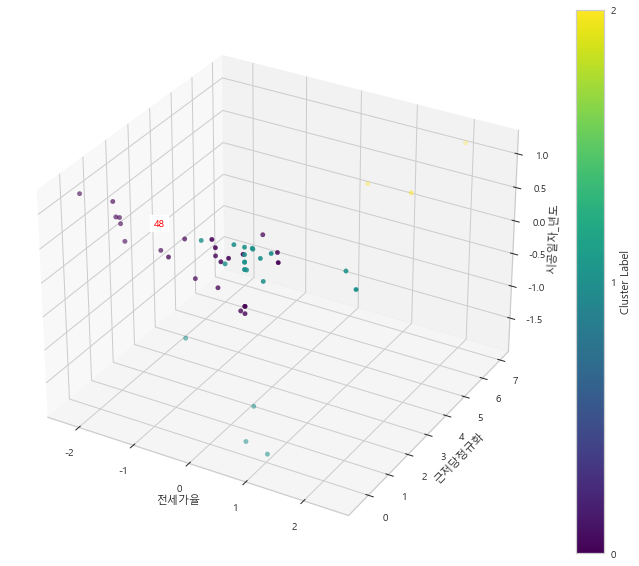

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 변수 설정
x_variable = '전세가율'
y_variable = '근저당정규화'
z_variable = '시공일자_년도'

# 3D 클러스터링 시각화
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
index_to_highlight = len(X_scaled_pred) - 1
# 데이터 포인트 그리기
scatter = ax.scatter(X_scaled_pred[x_variable], X_scaled_pred[y_variable], X_scaled_pred[z_variable],
                     c=X_scaled_pred['cluster'], cmap='viridis', marker='o')

# 각 데이터포인트의 인덱스 표시
for idx, (x, y, z) in enumerate(zip(X_scaled_pred[x_variable], X_scaled_pred[y_variable], X_scaled_pred[z_variable])):
    if idx == index_to_highlight:
        ax.text(x, y, z, str(idx), color='red', fontsize=10, backgroundcolor='white')

# 축 레이블 설정
ax.set_xlabel(x_variable)
ax.set_ylabel(y_variable)
ax.set_zlabel(z_variable)

# 컬러바 추가
cb = plt.colorbar(scatter, ax=ax, label='Cluster Label')
cb.set_ticks(range(len(set(X_scaled_pred['cluster']))))
cb.set_ticklabels(range(len(set(X_scaled_pred['cluster']))))

plt.show()